In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/train.csv')

print(data.head())


   id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitm

# Now lets try to plot the data using histograms

In [3]:
import matplotlib.pyplot as plt

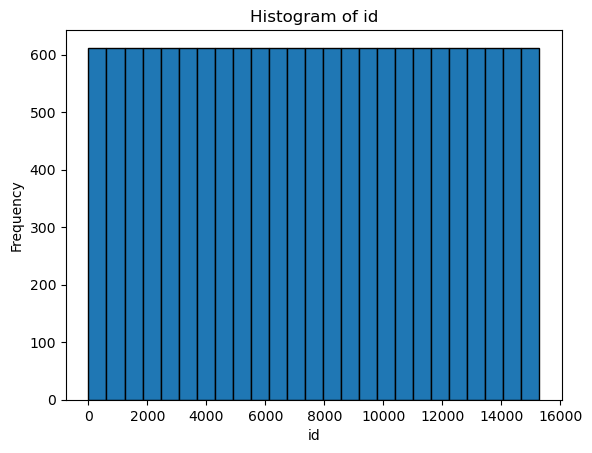

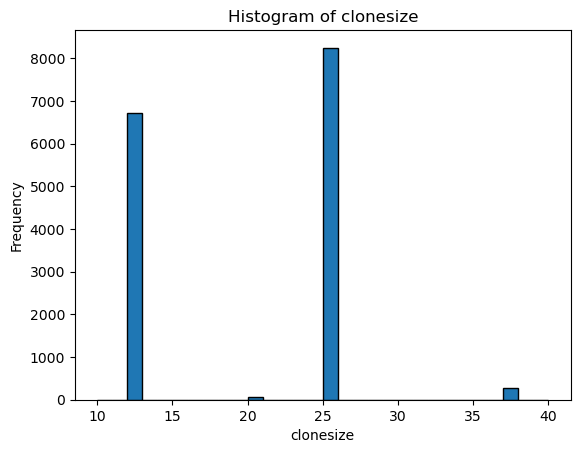

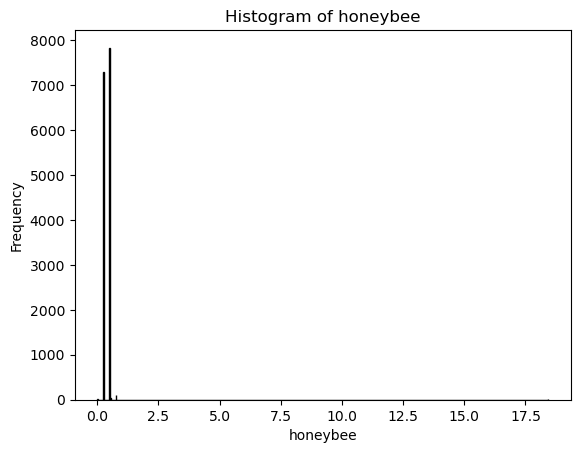

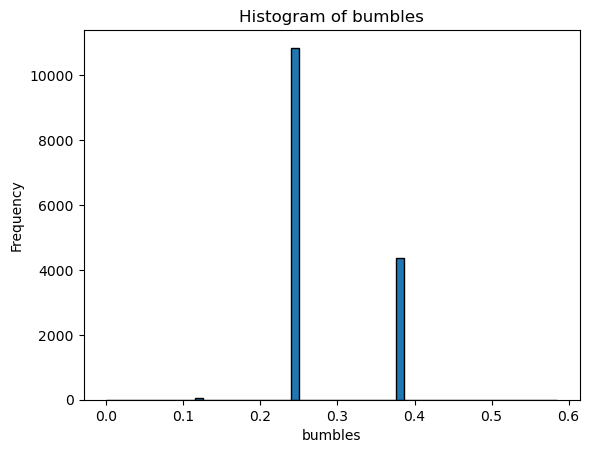

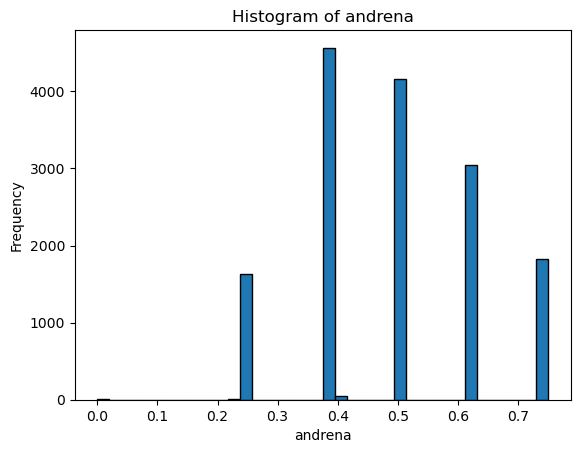

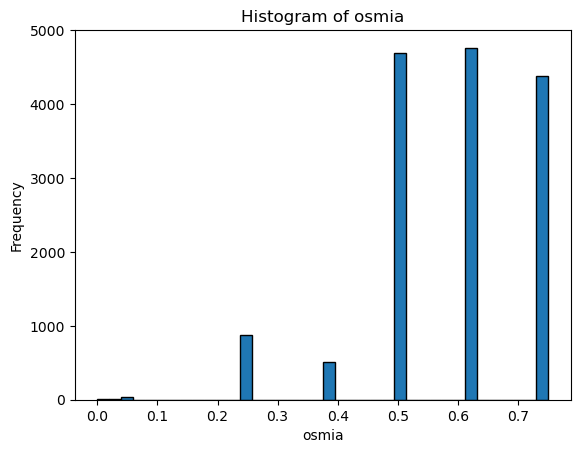

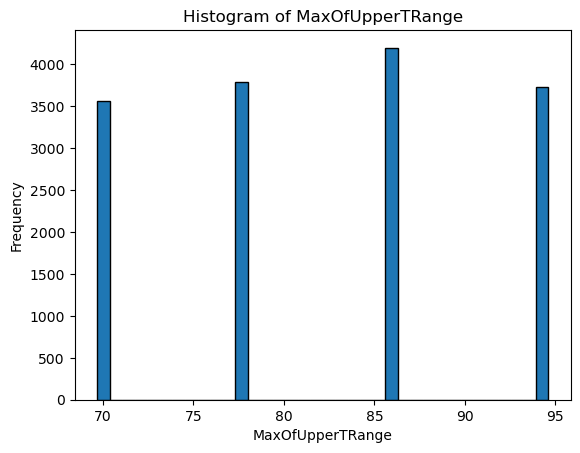

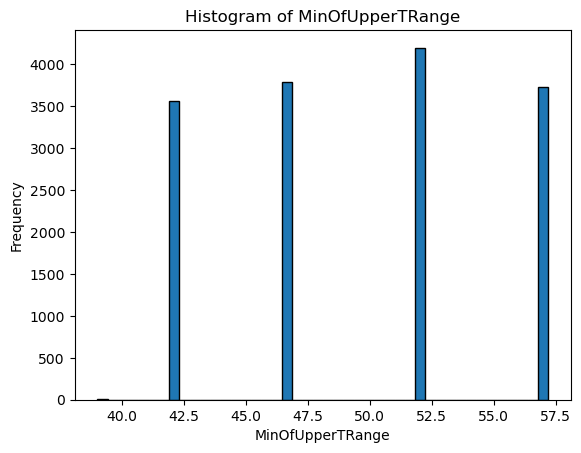

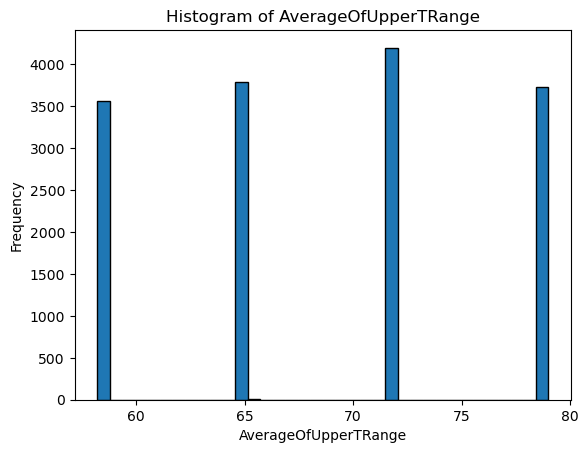

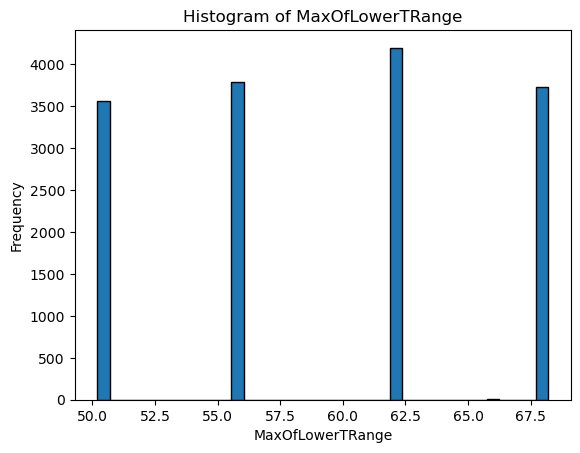

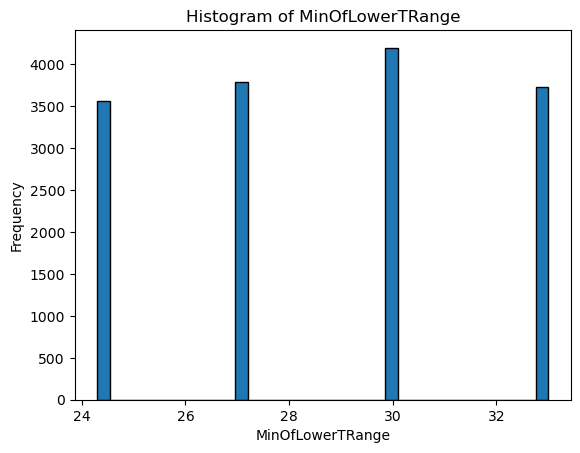

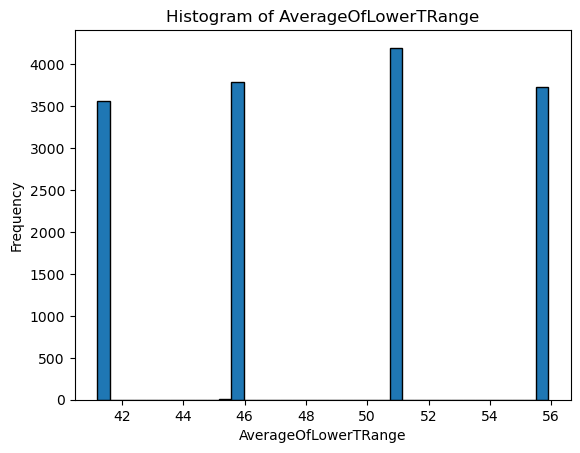

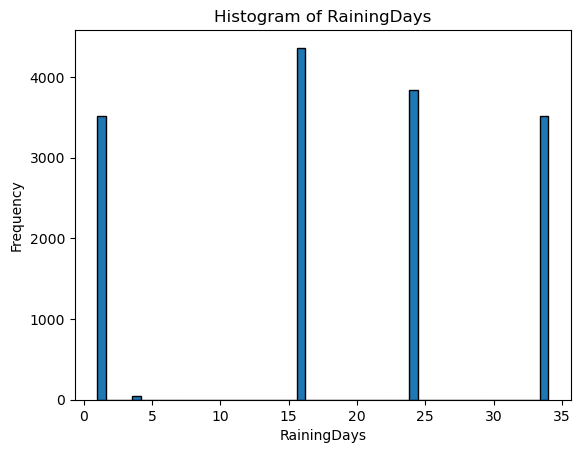

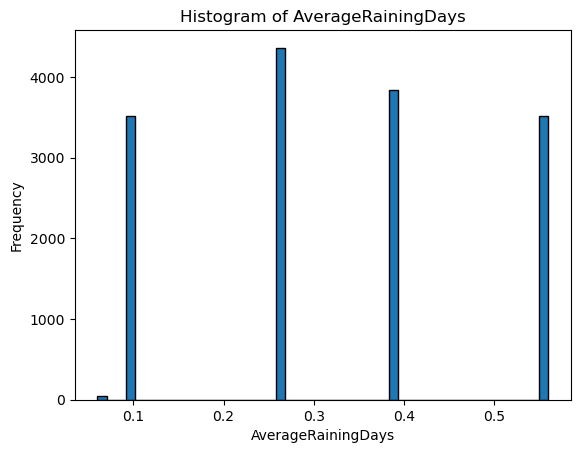

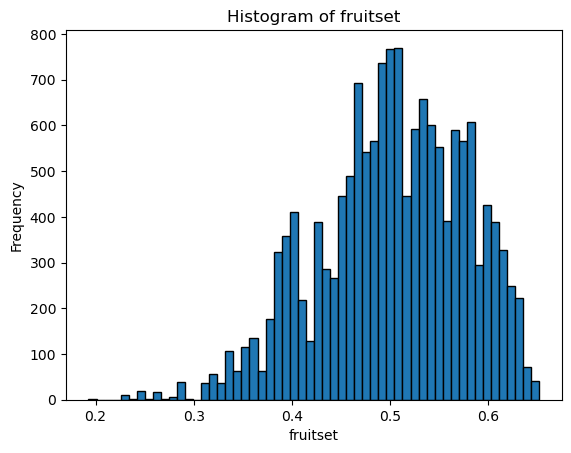

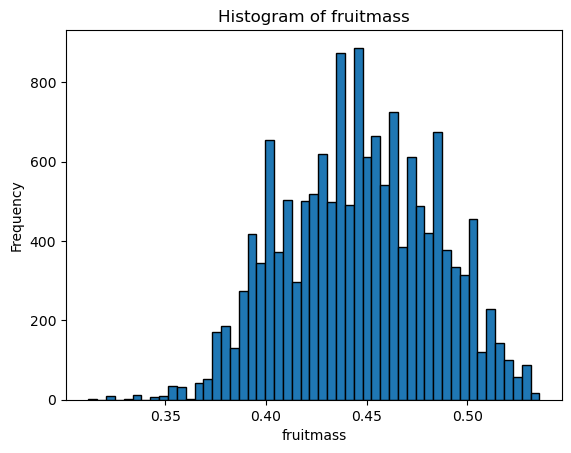

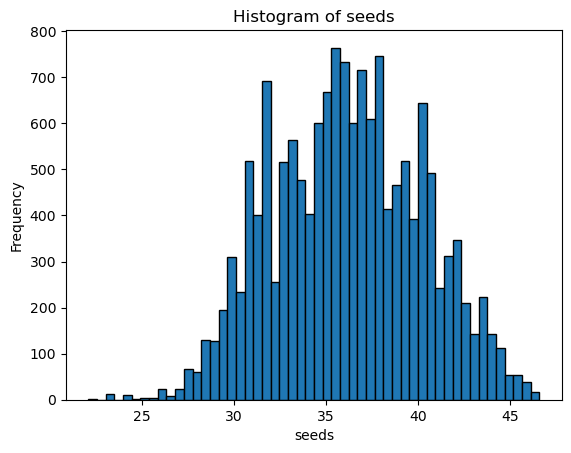

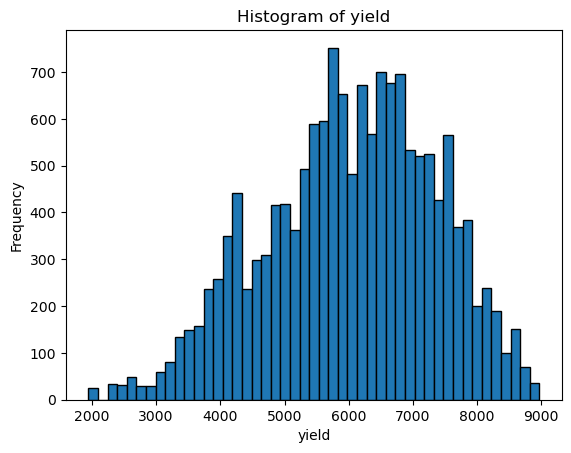

In [4]:
columns = data.columns
for column in columns:
    plt.hist(data[column], bins='auto', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Now lets see if there are any missing values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


No missing values found, so we do not need to fill in the gaps :)

# Lets detect the outliers, if the are any

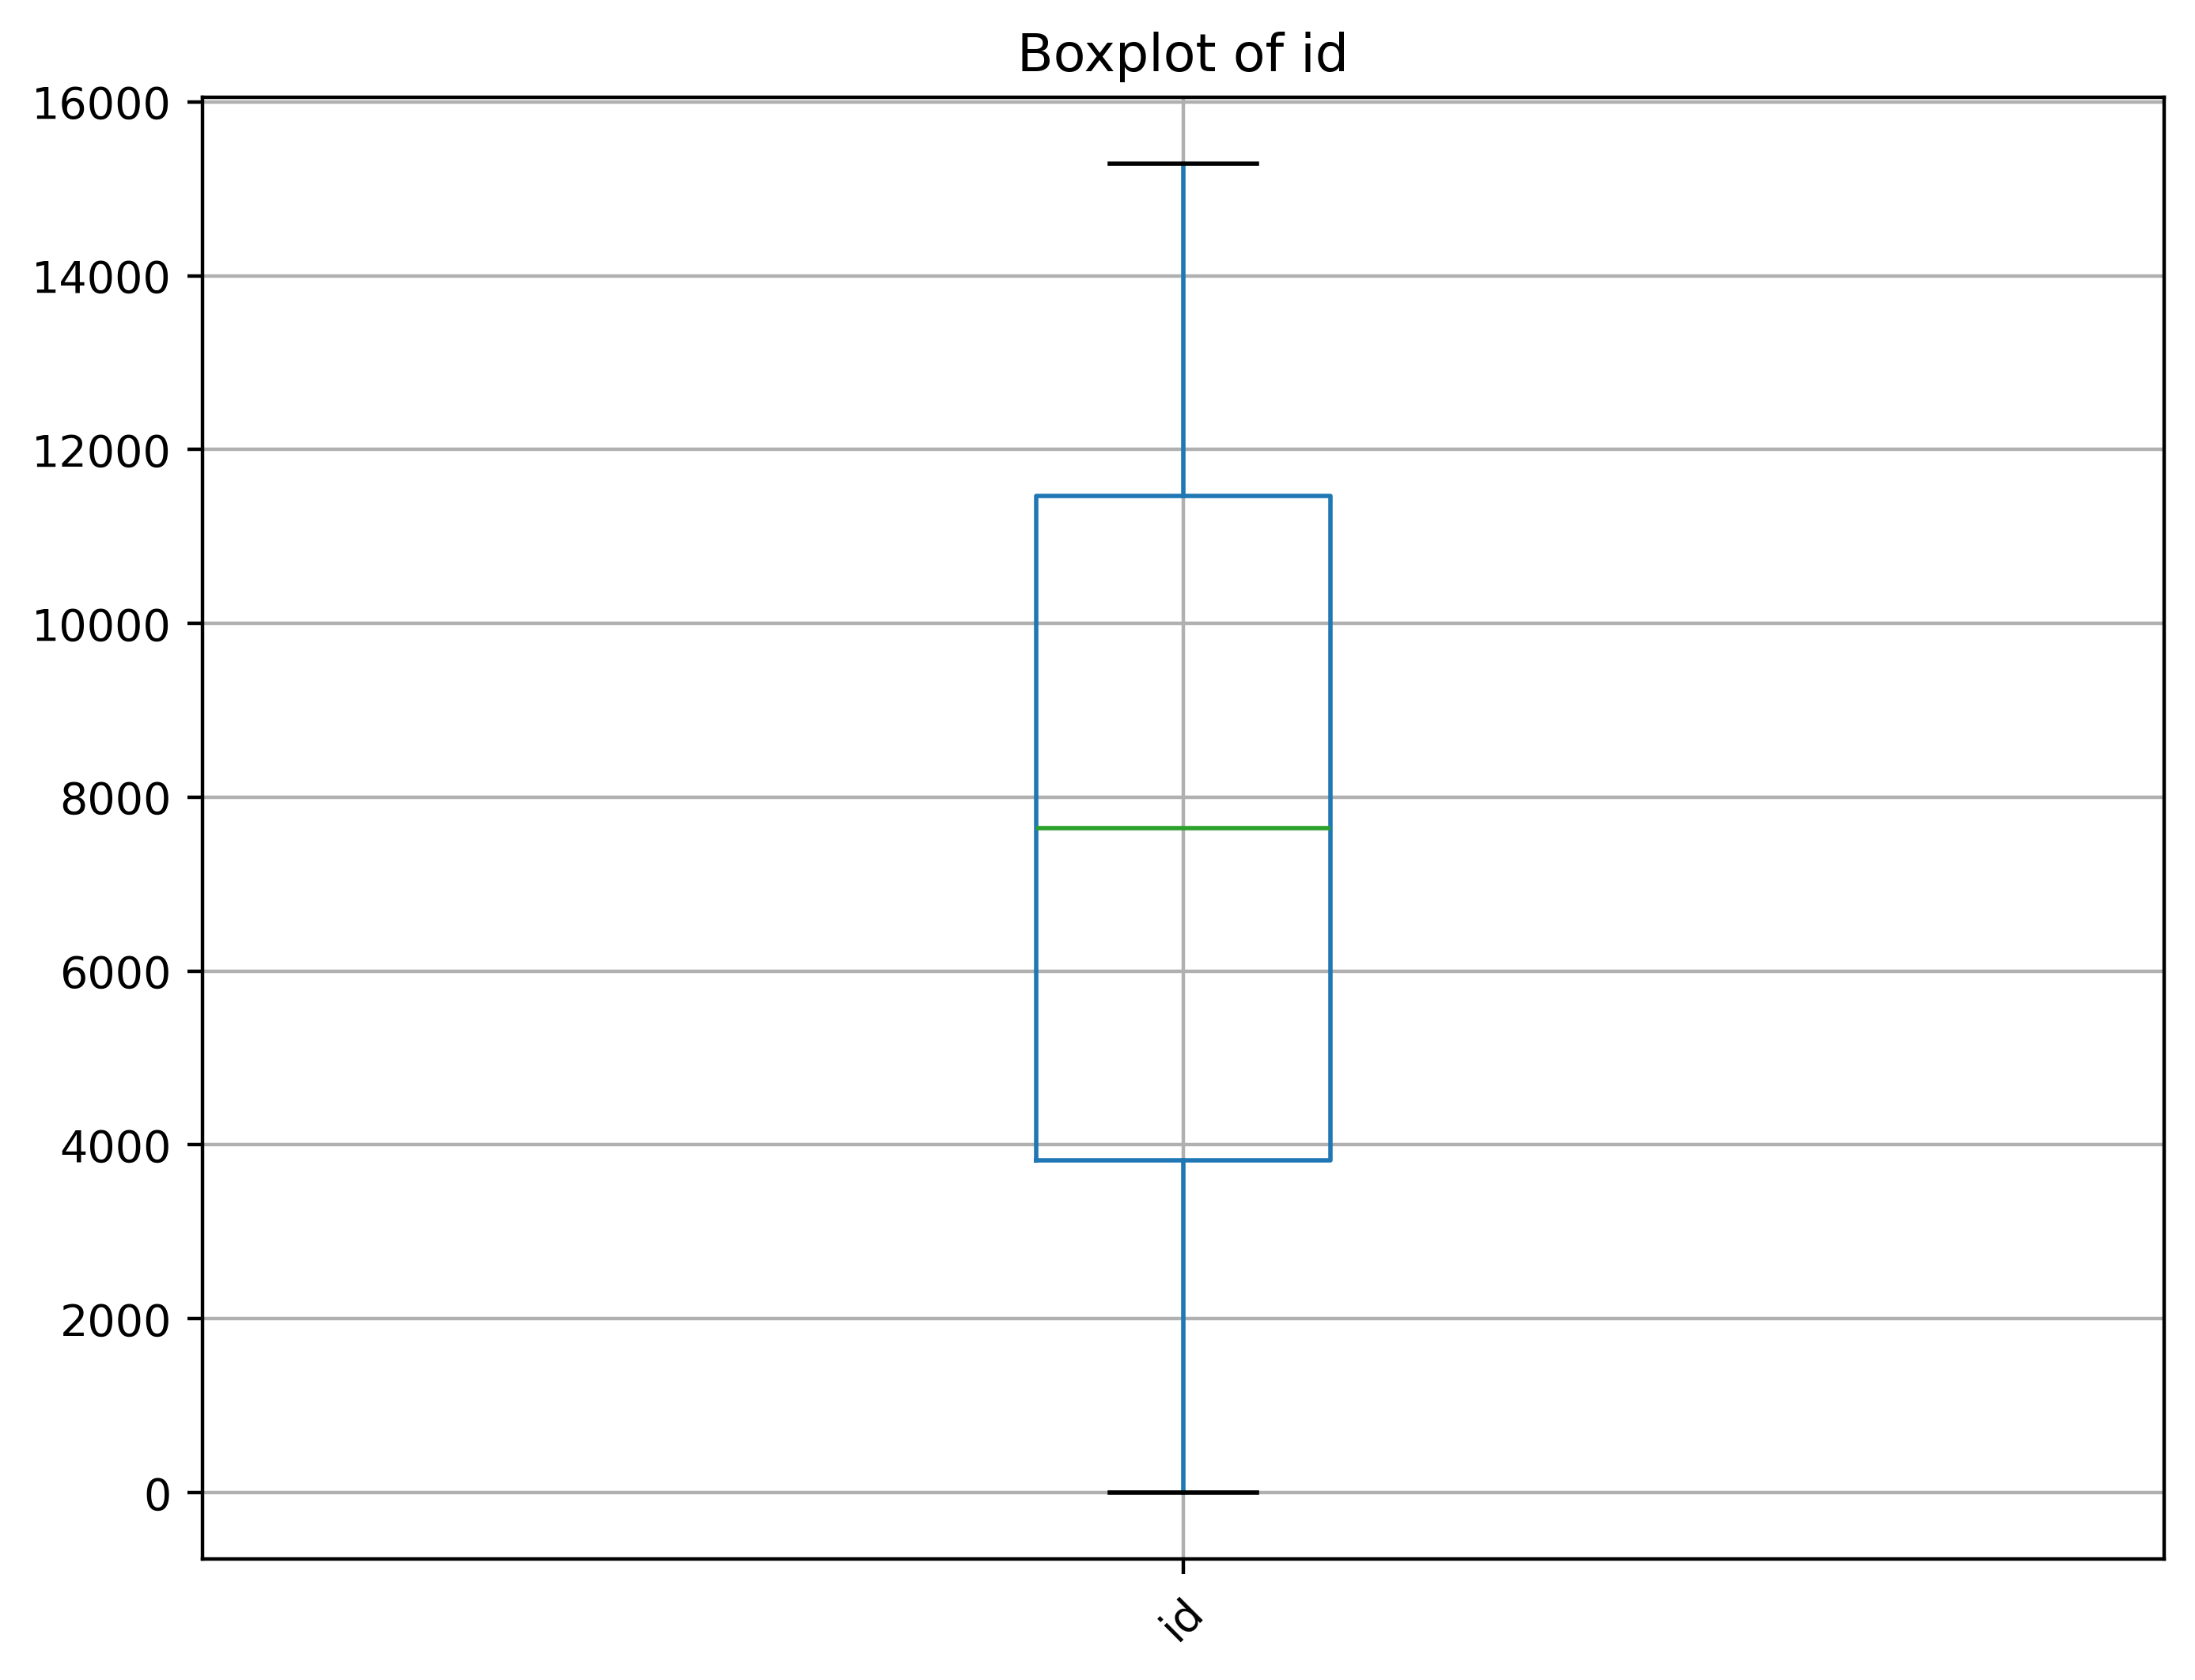

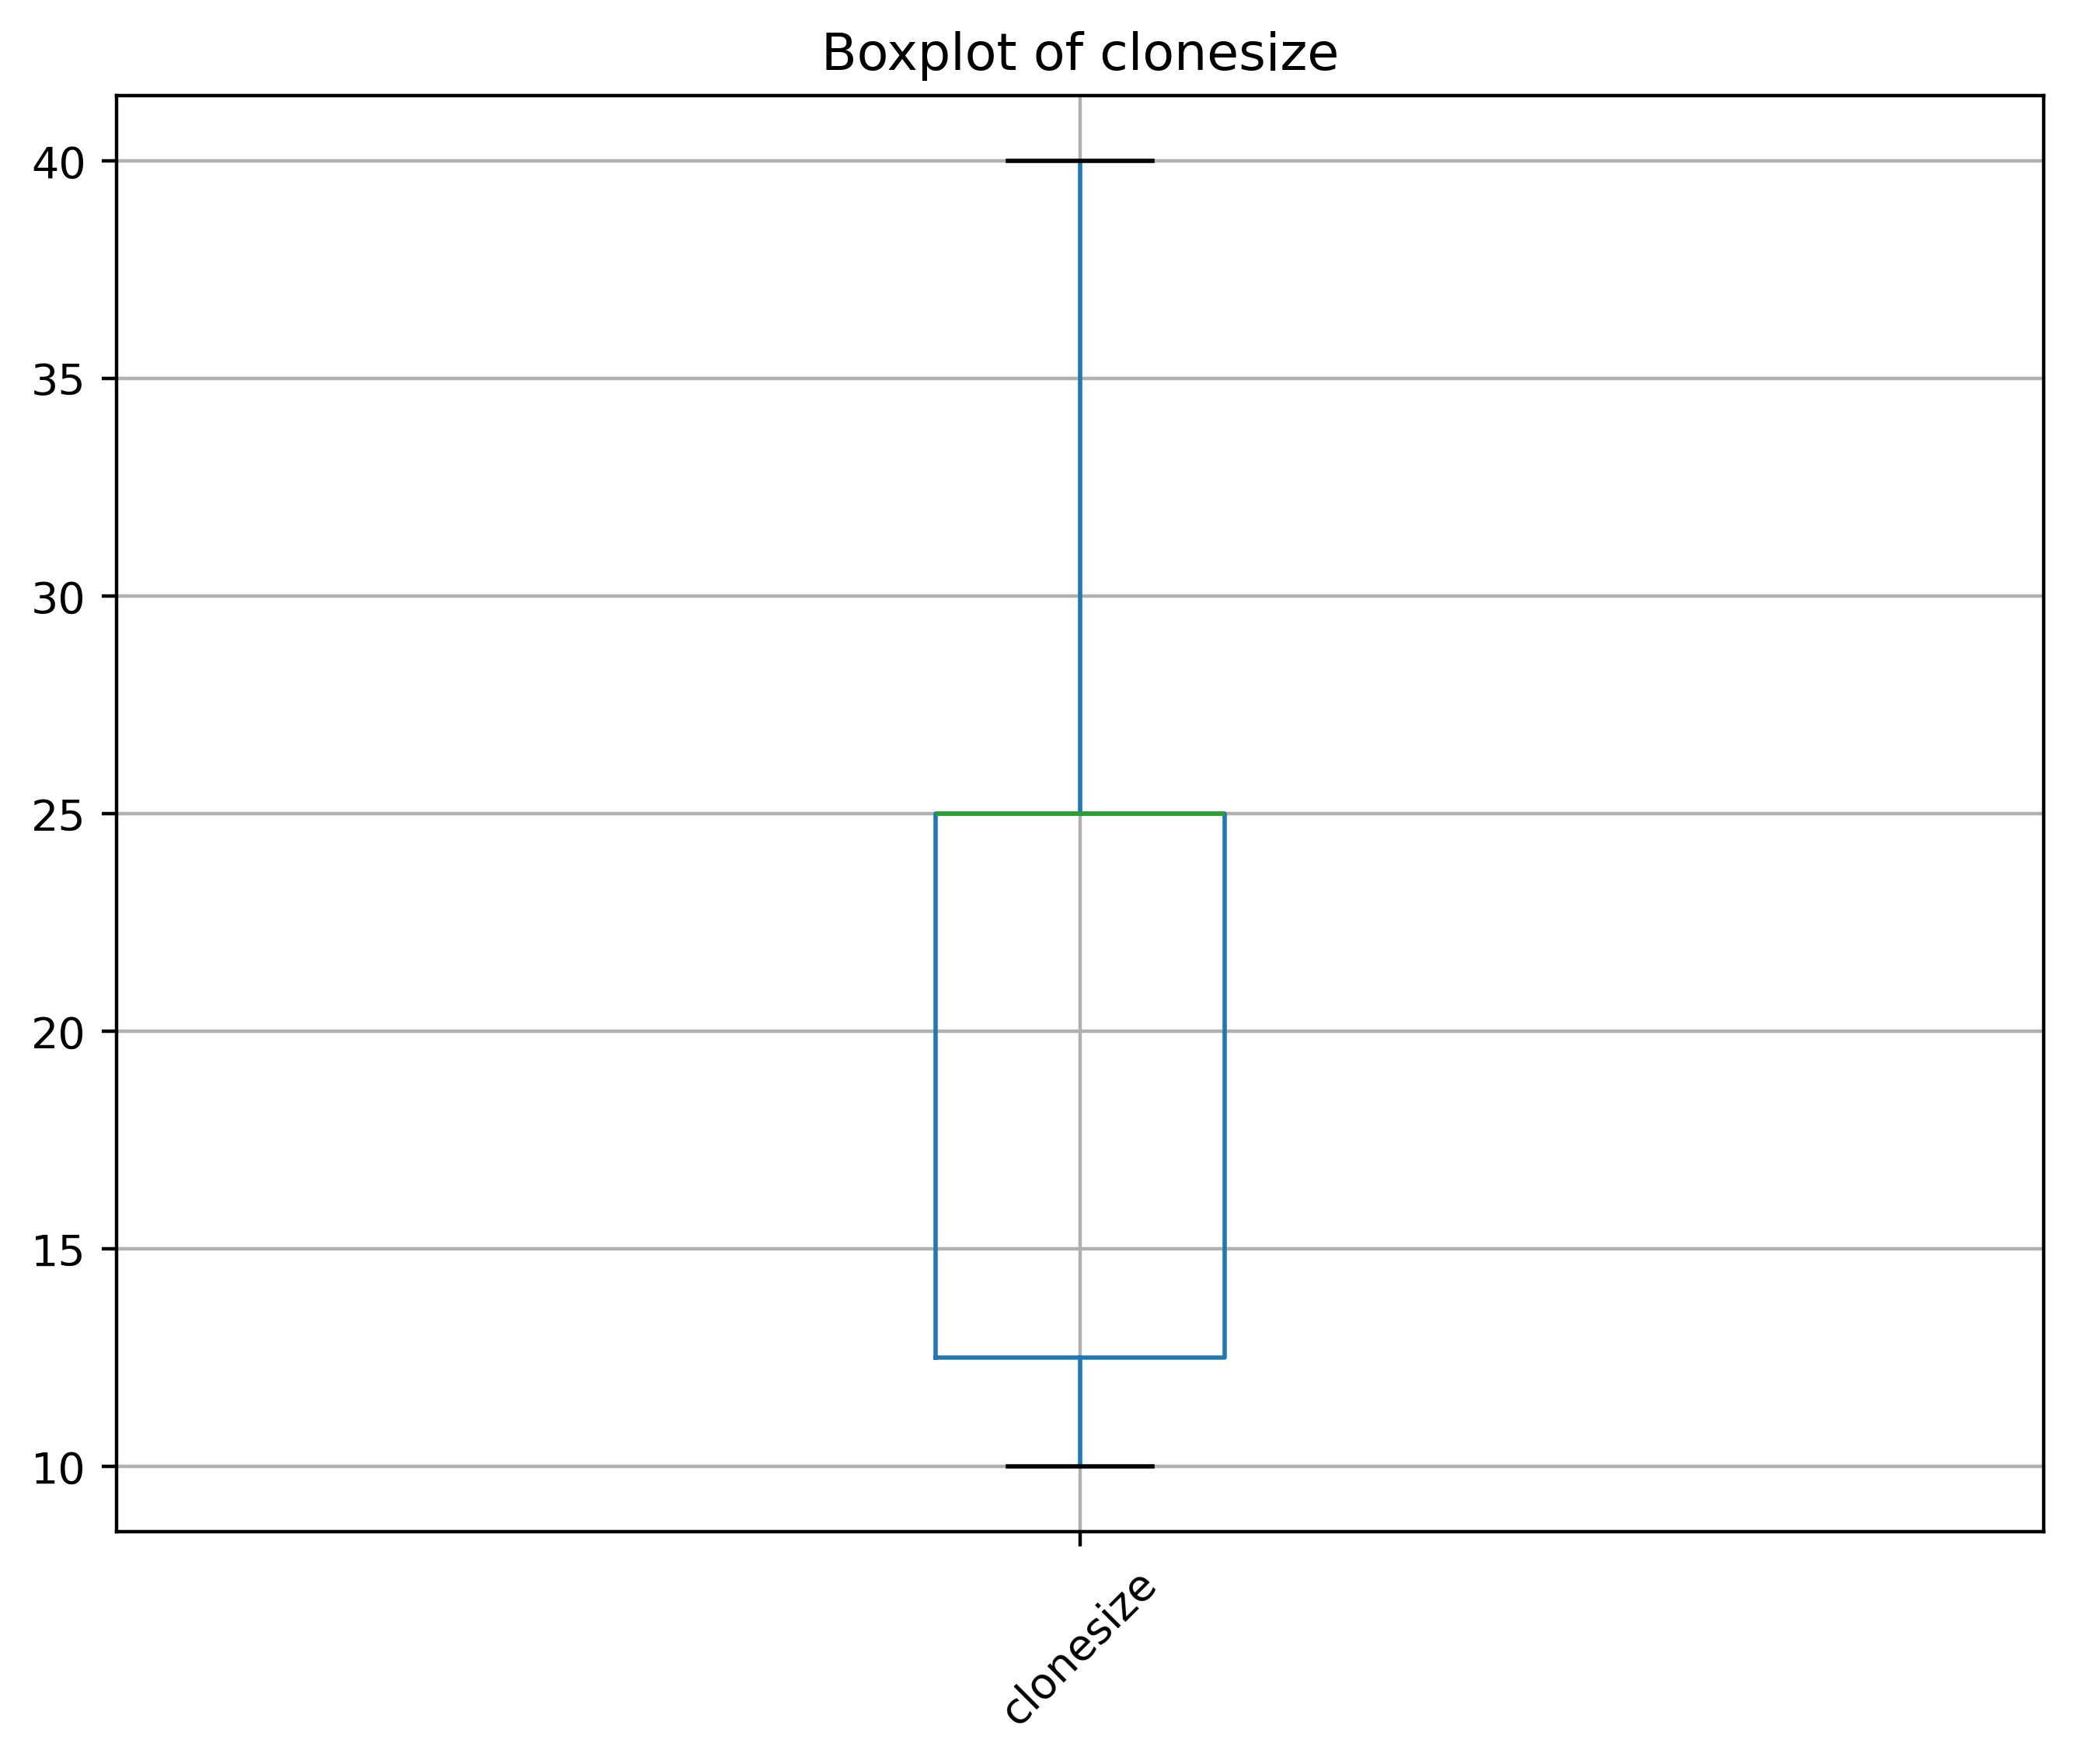

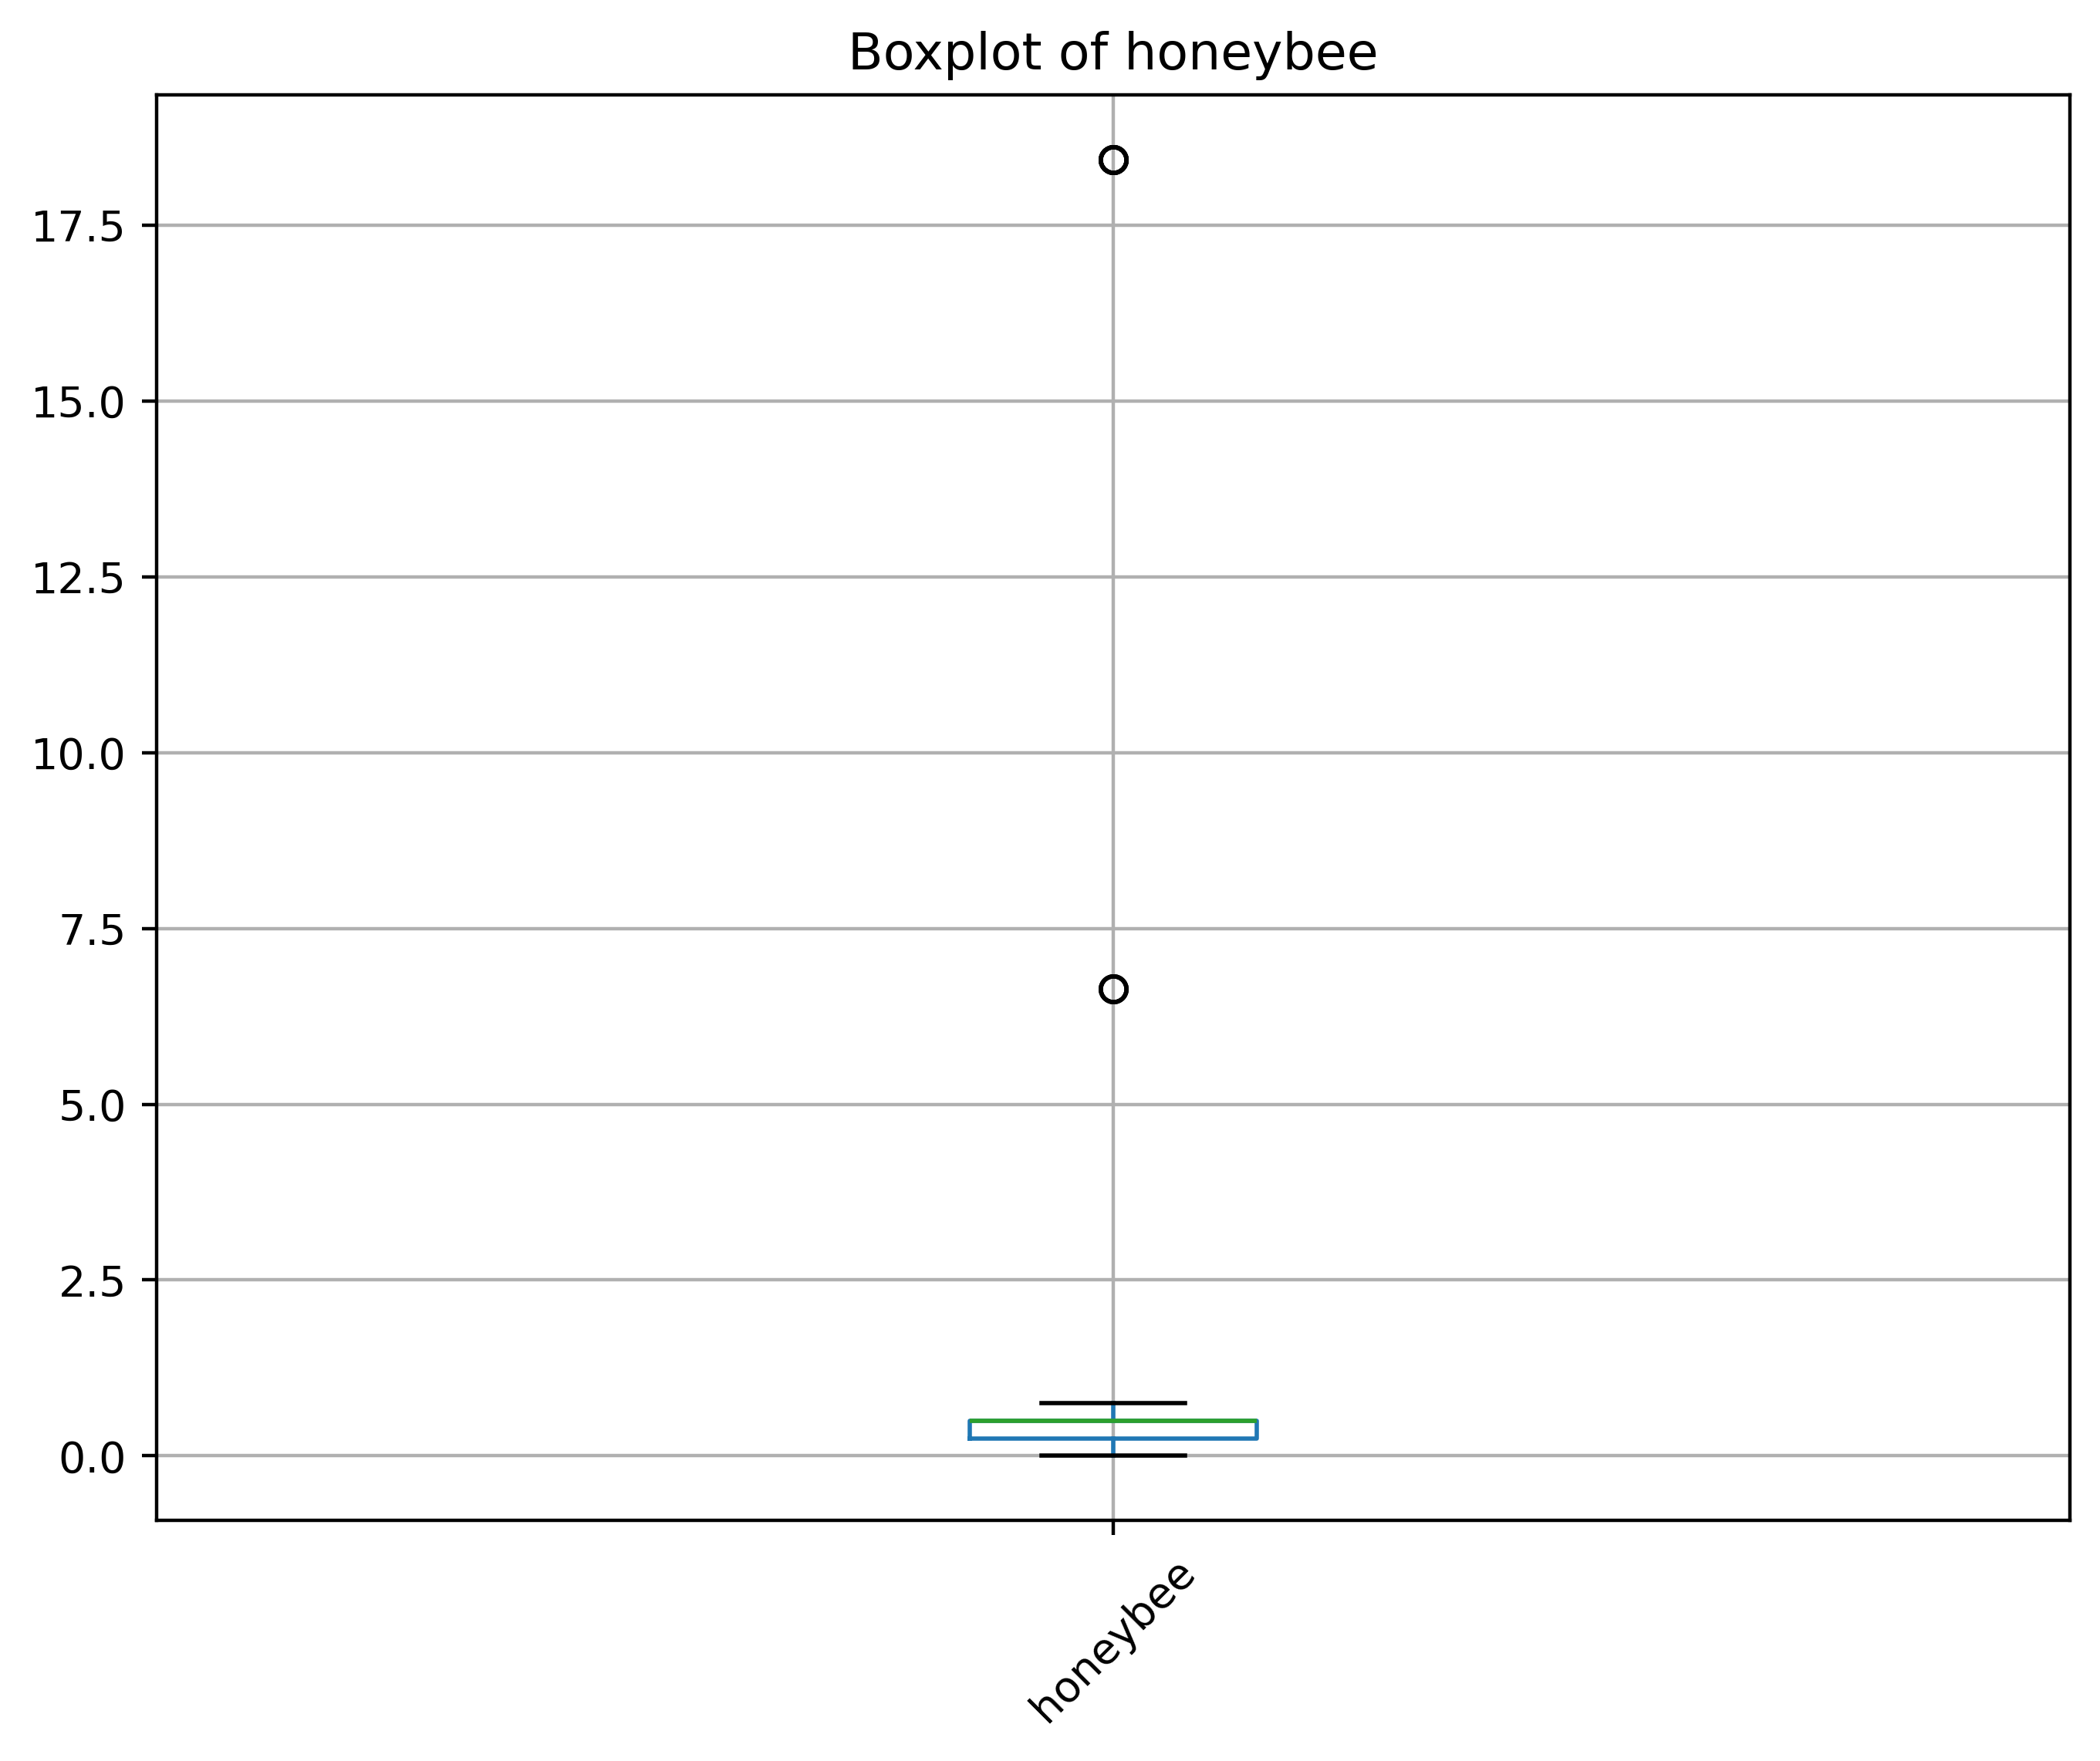

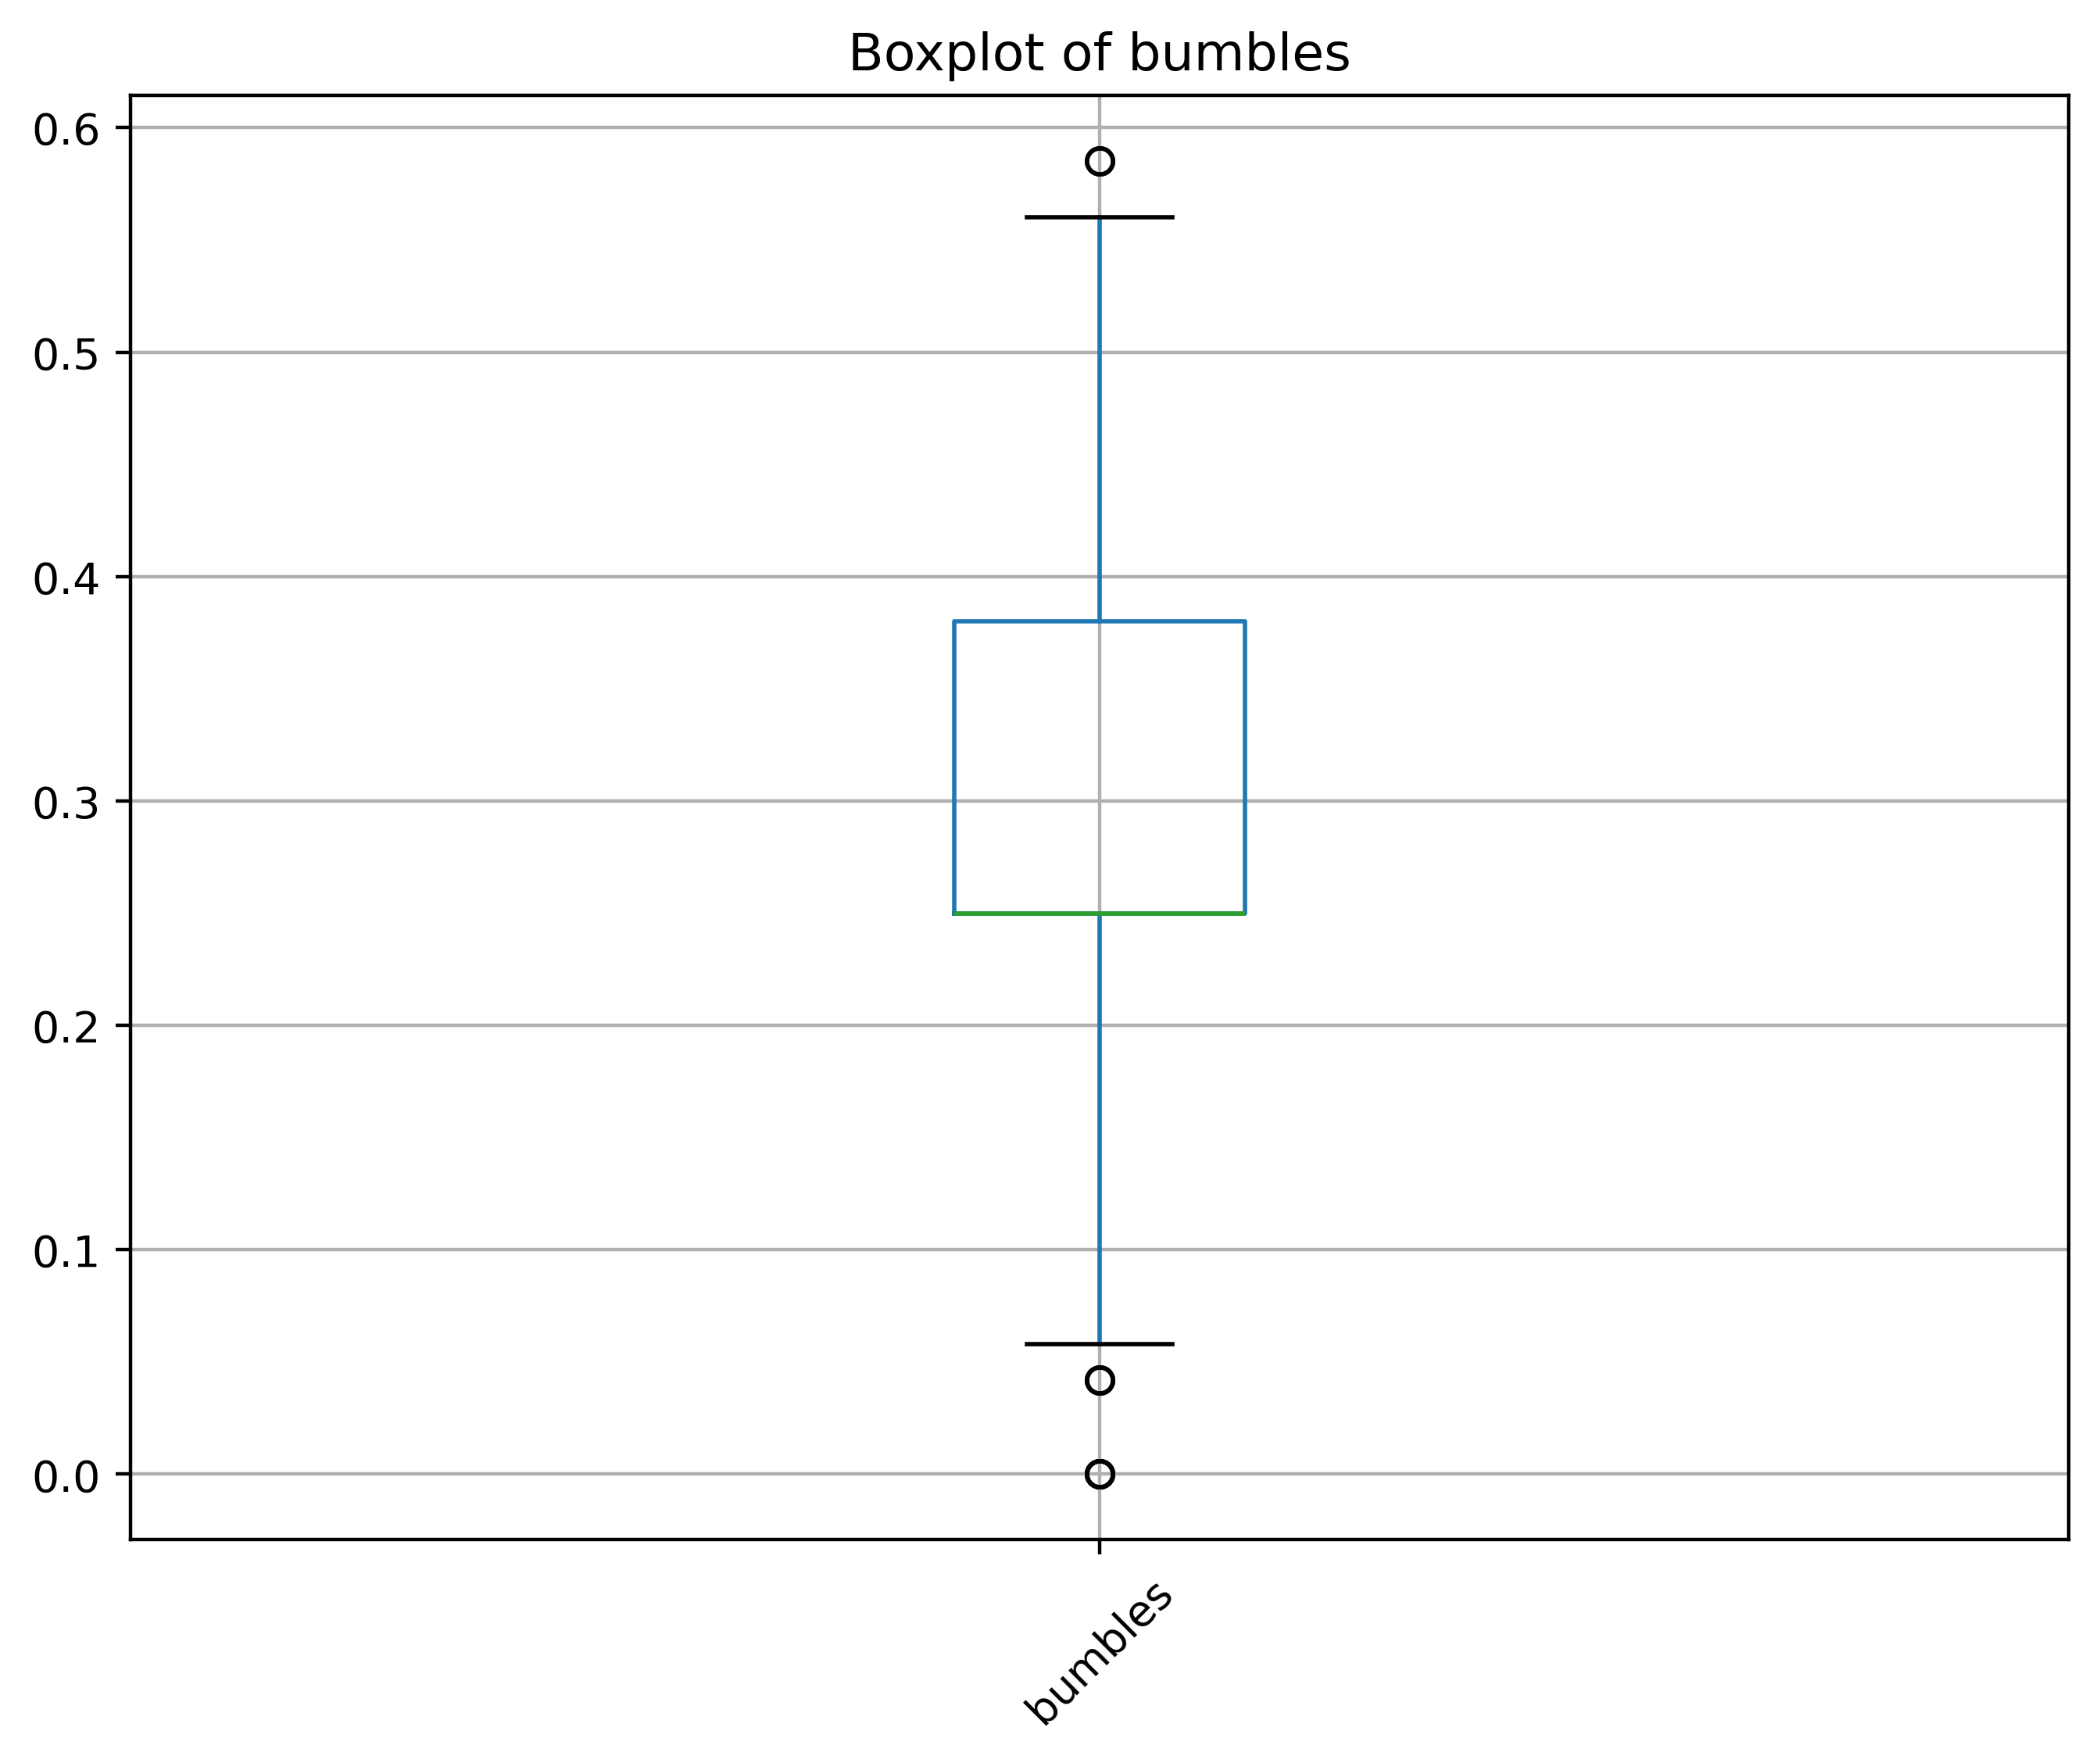

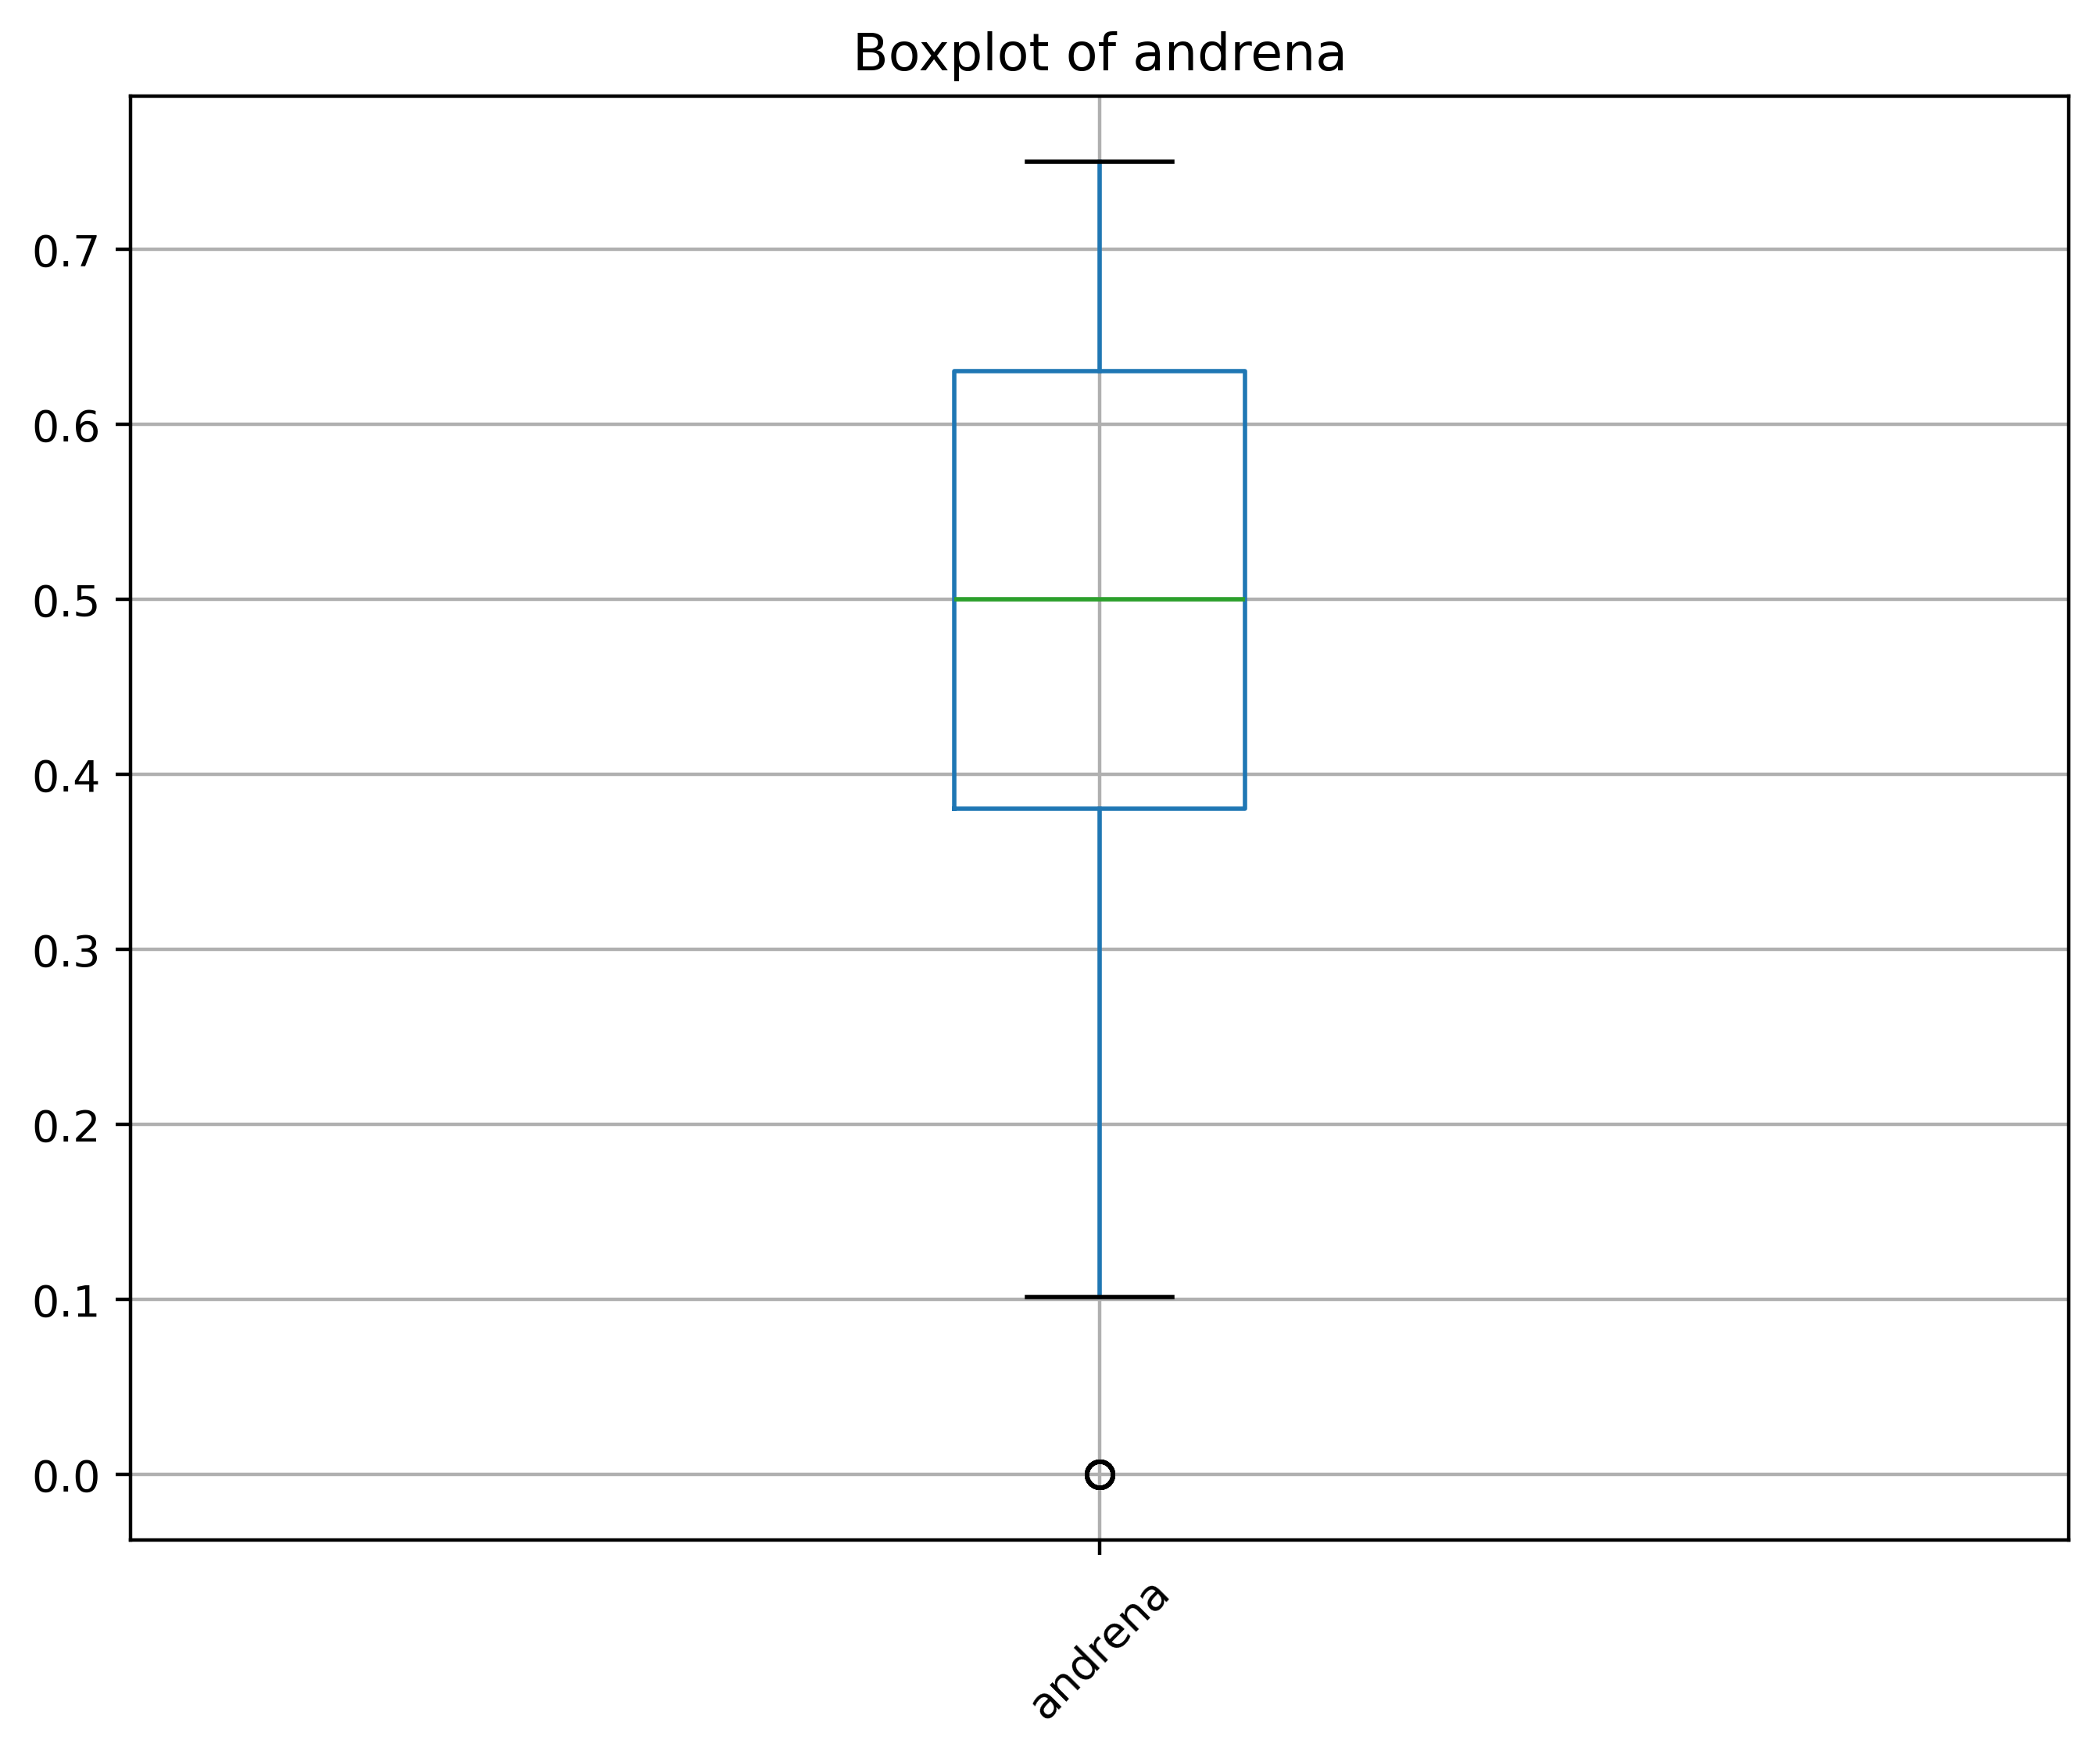

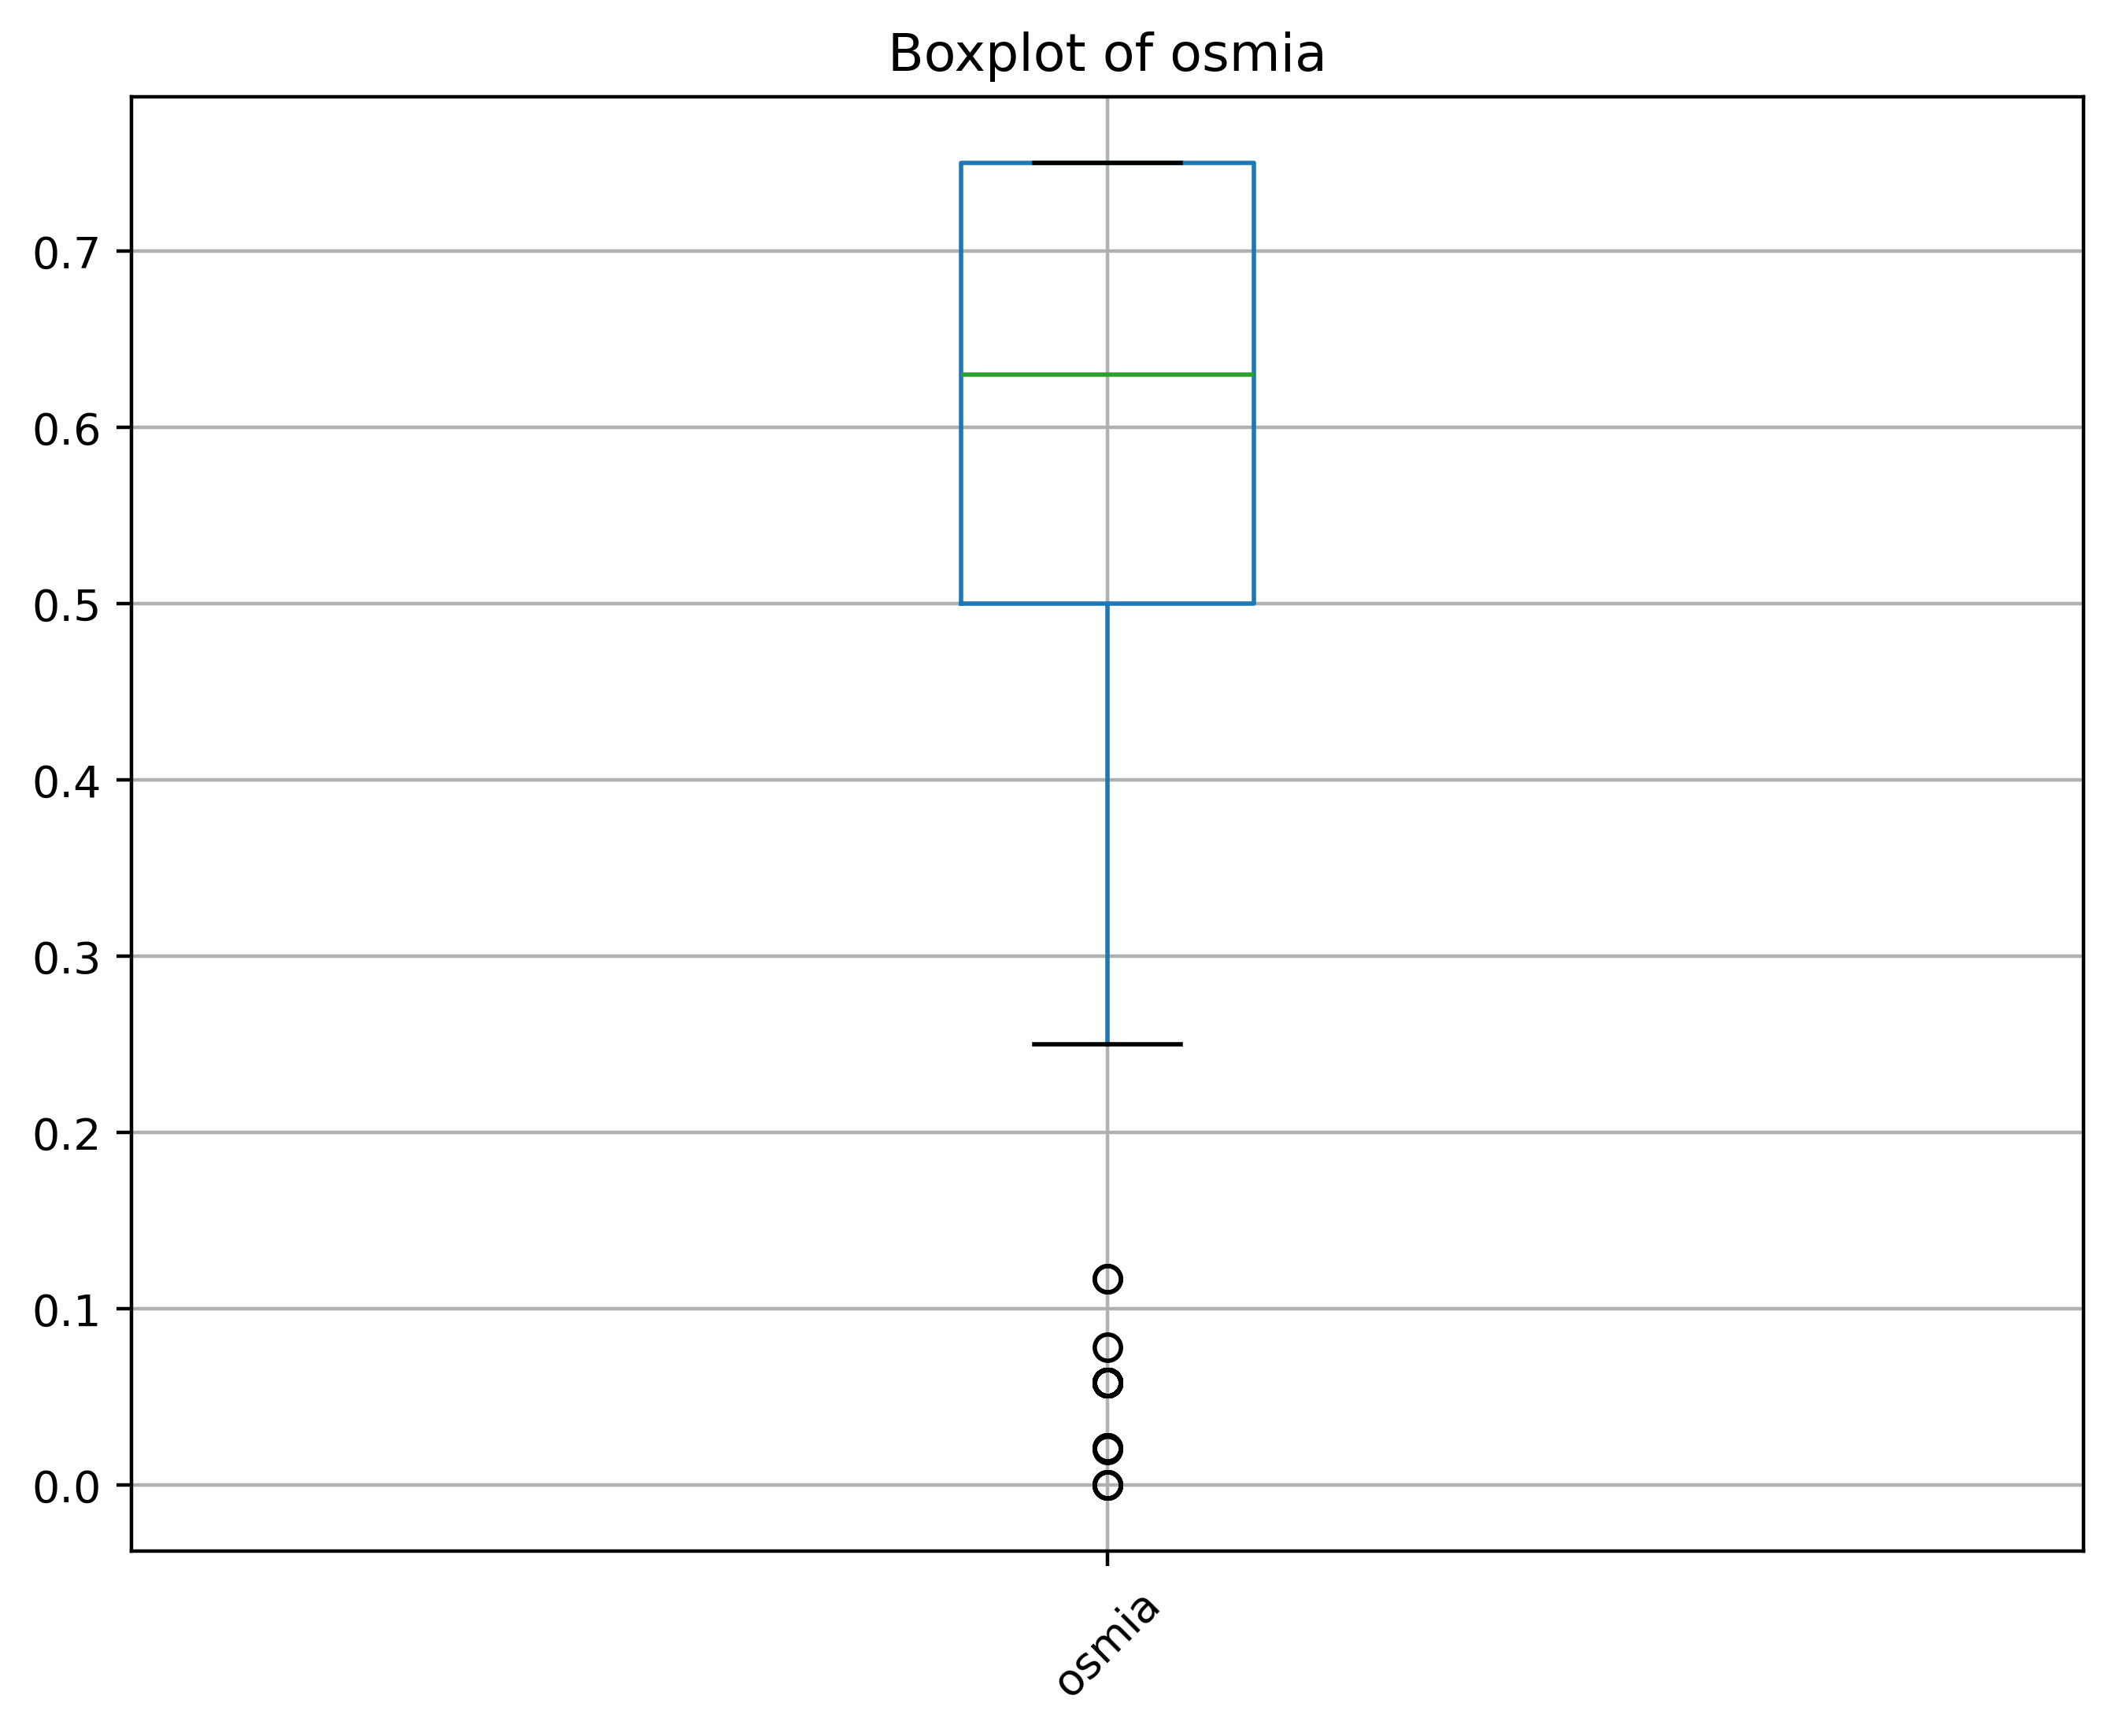

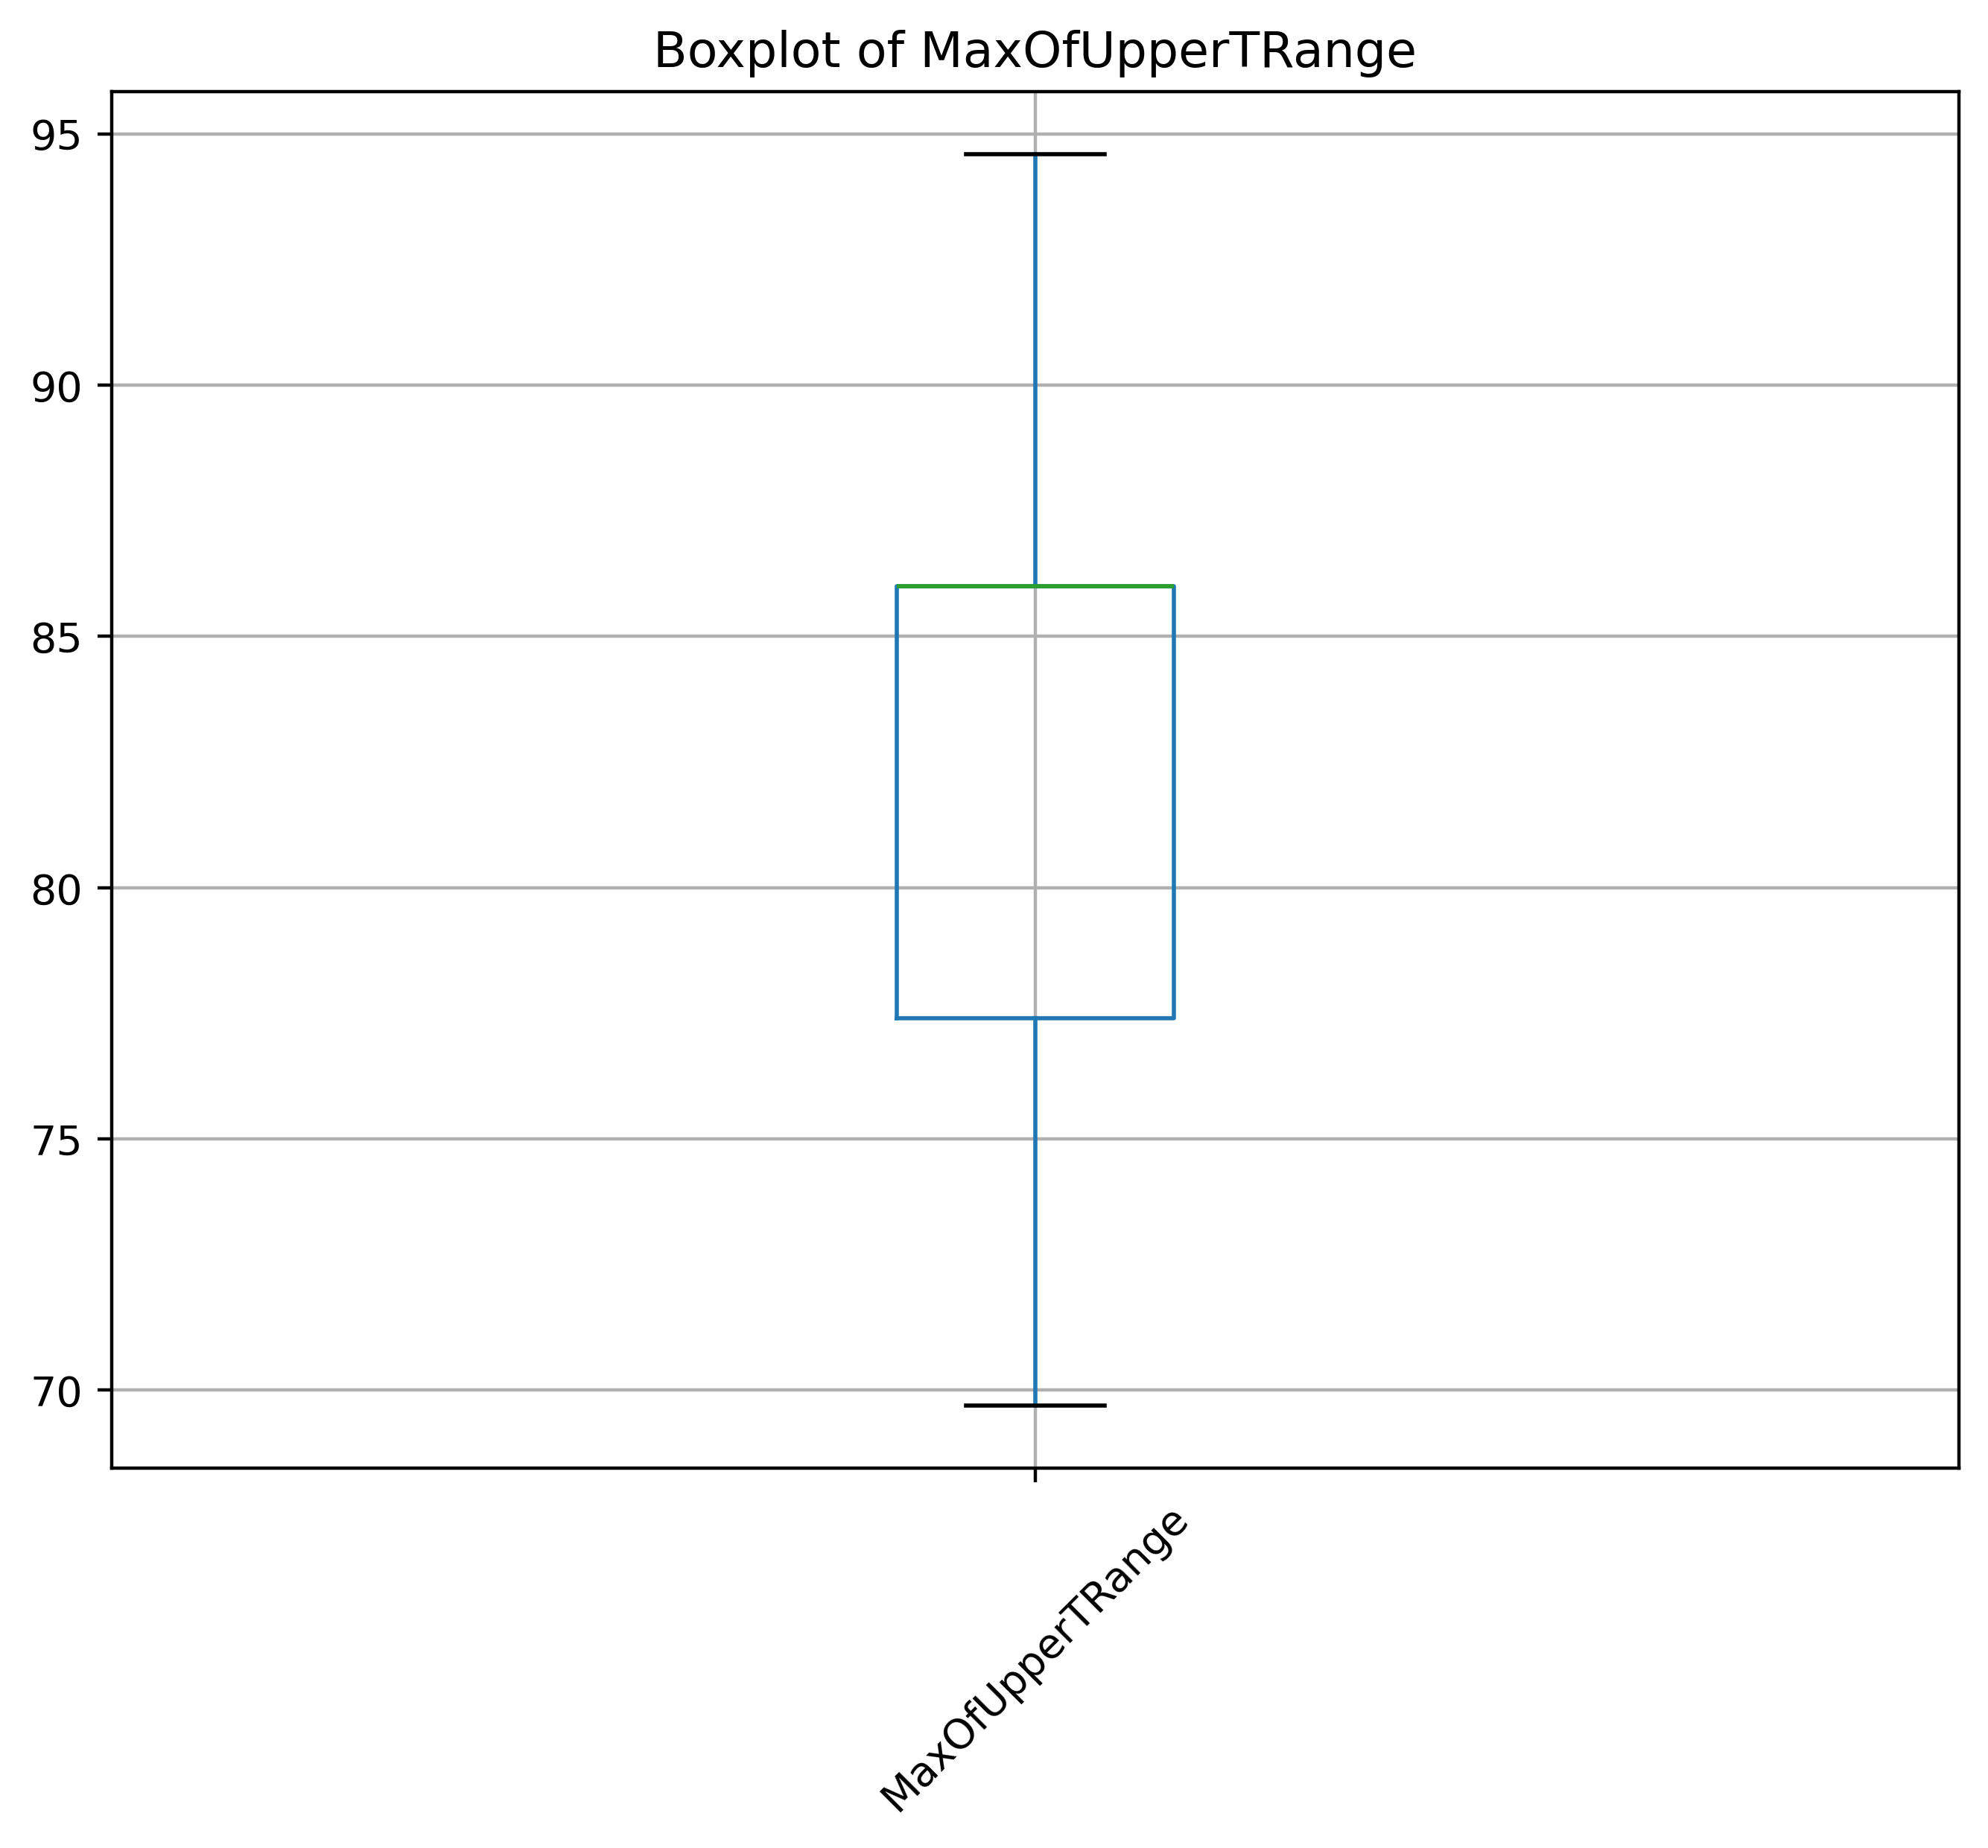

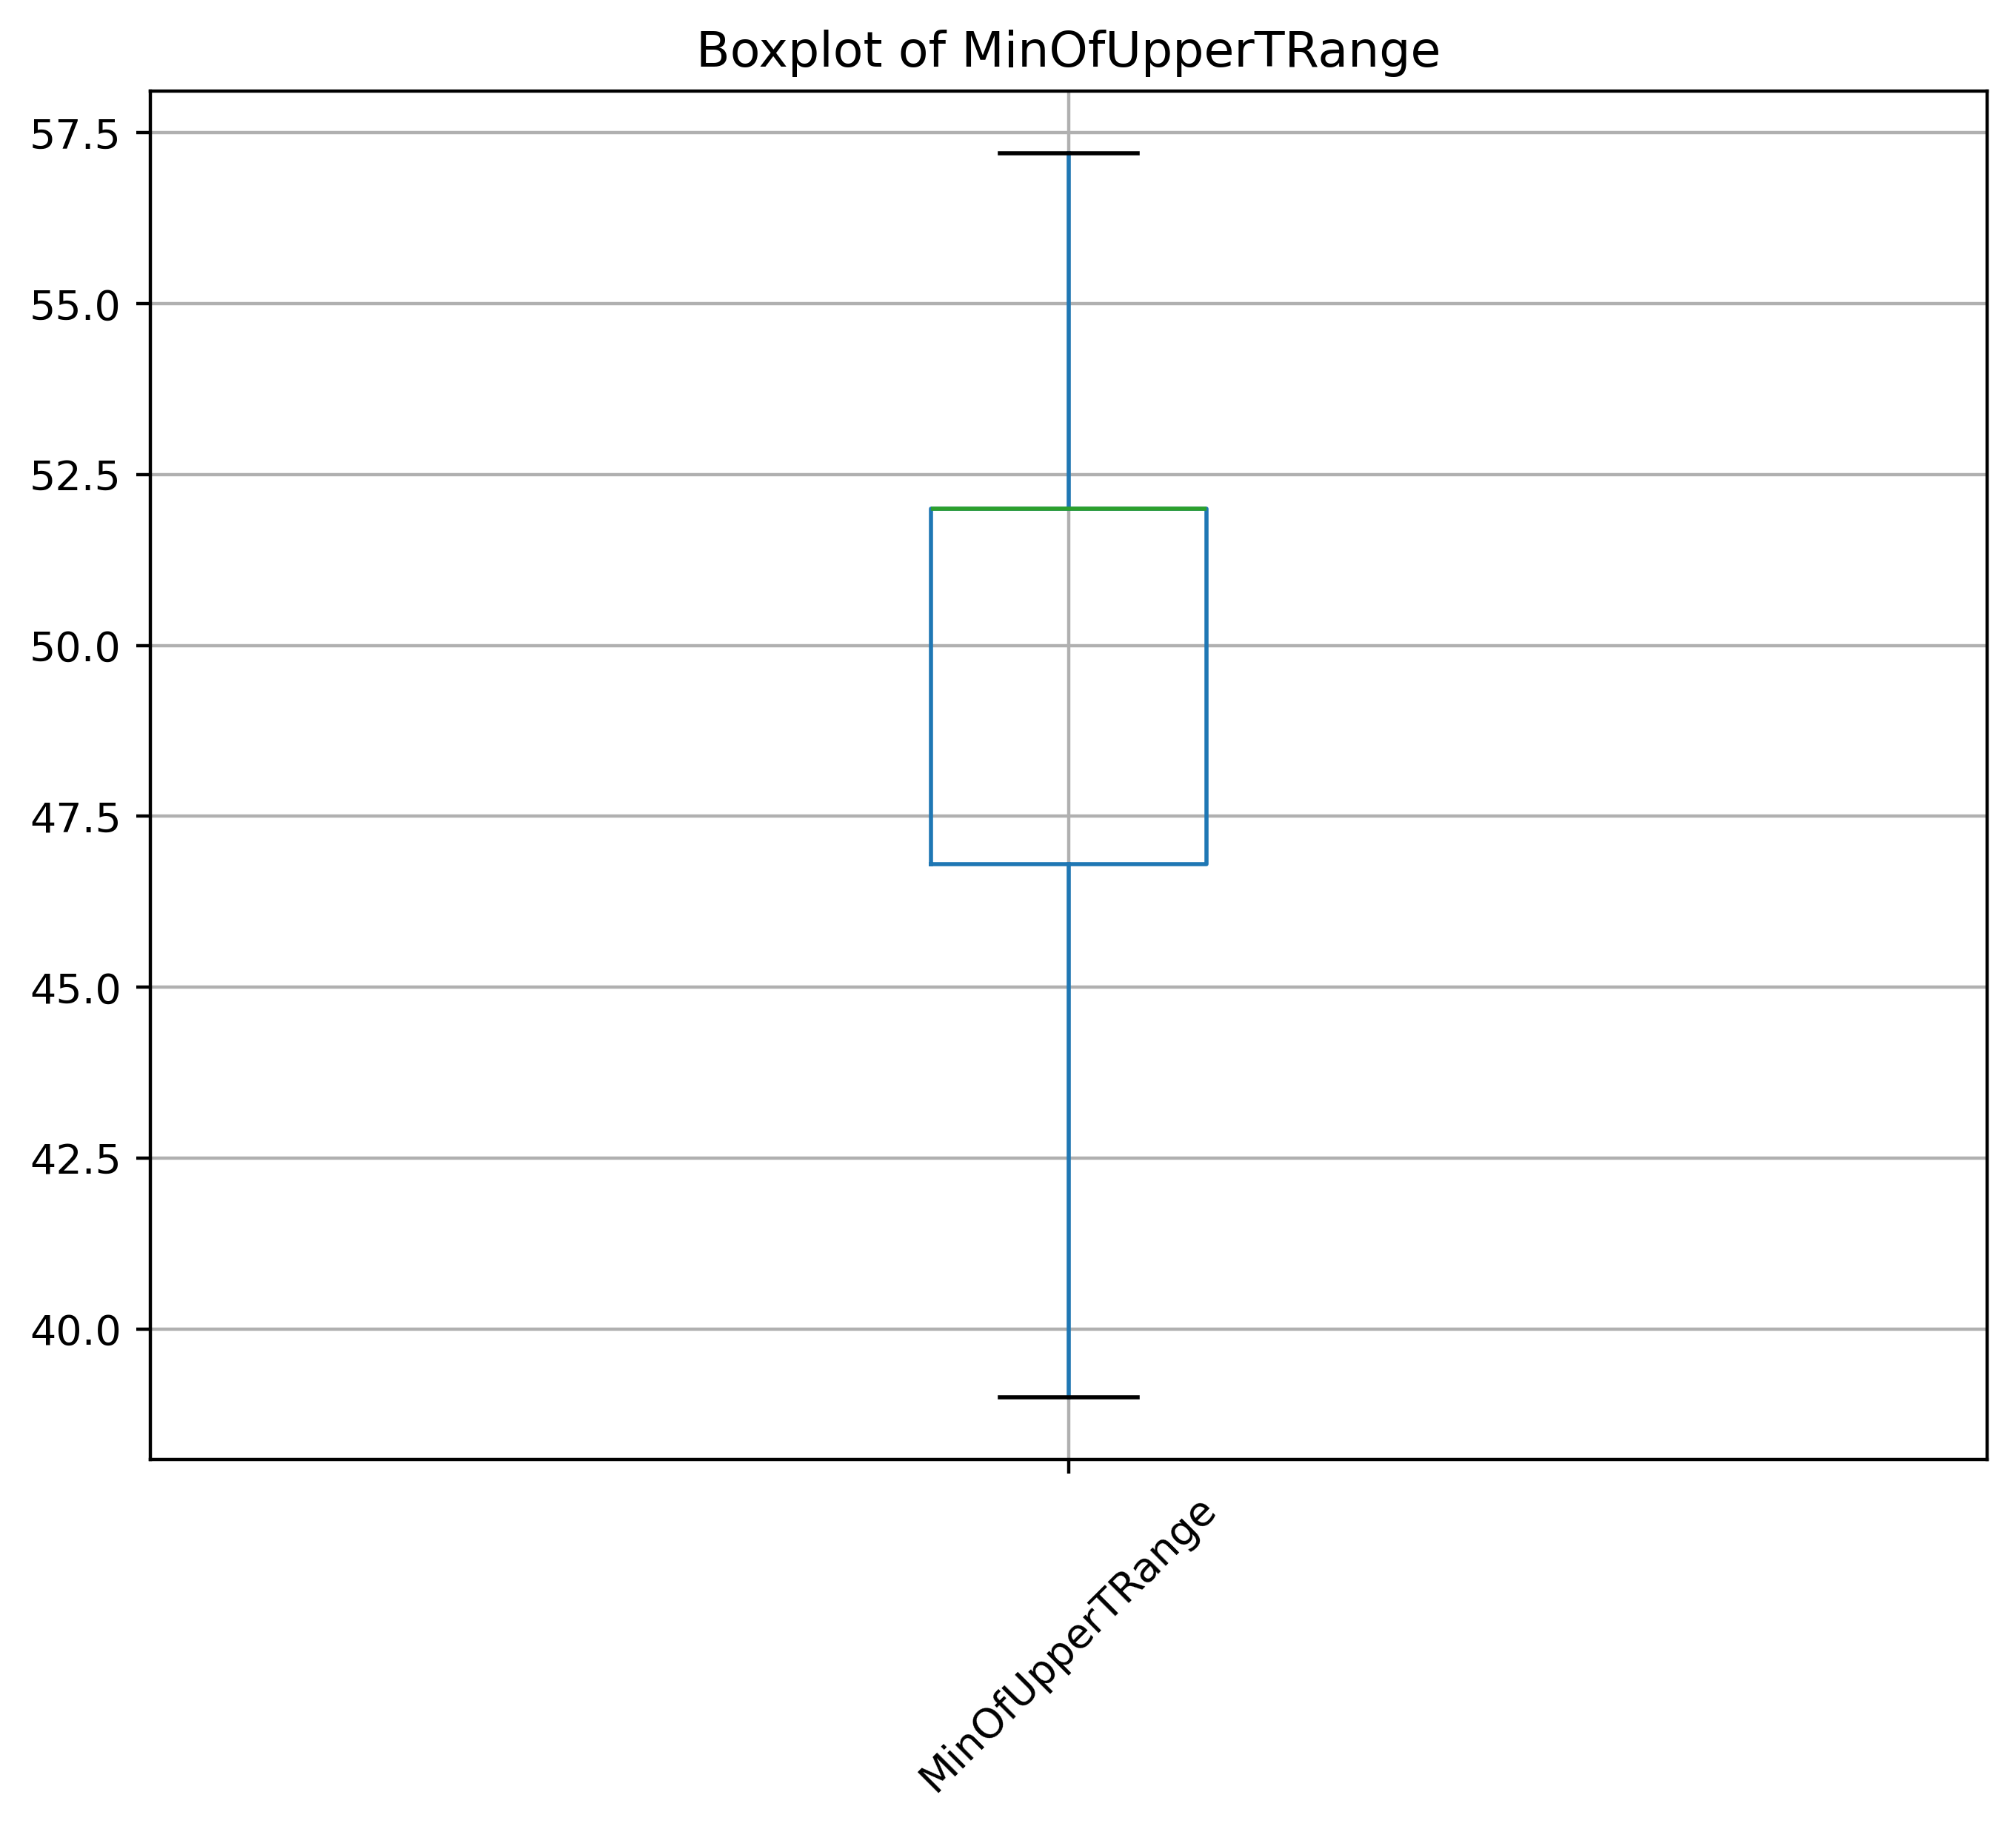

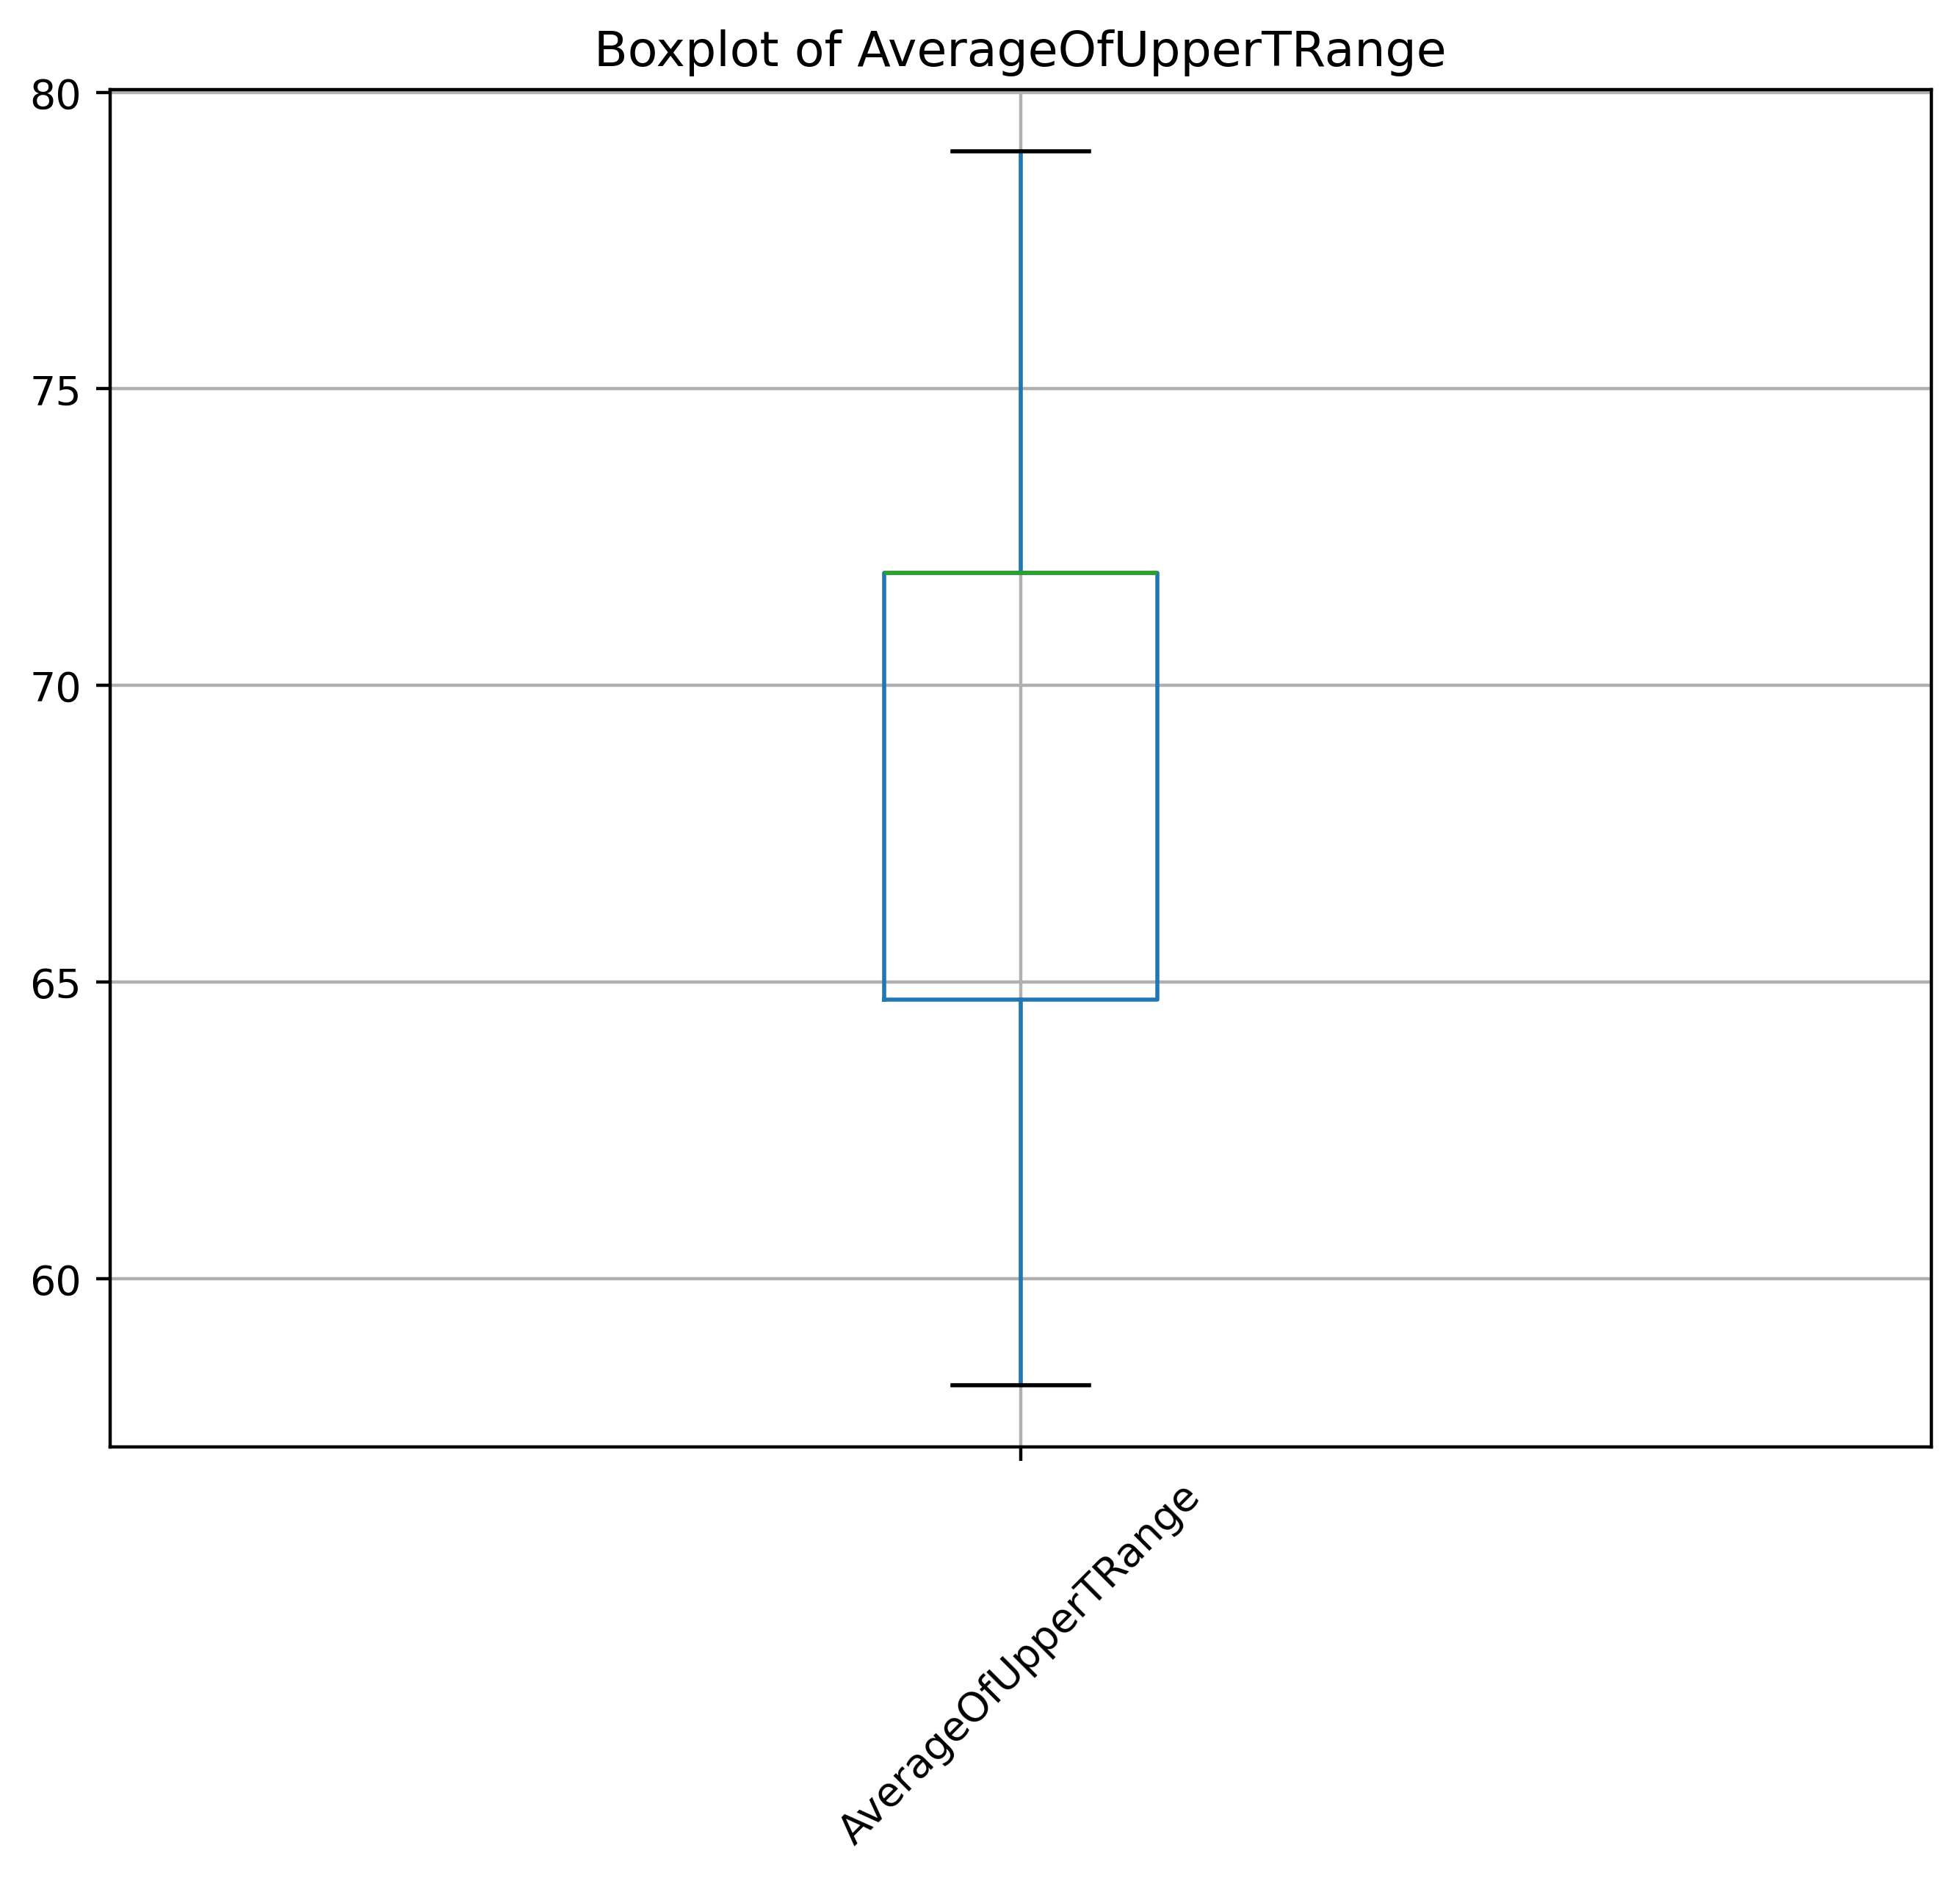

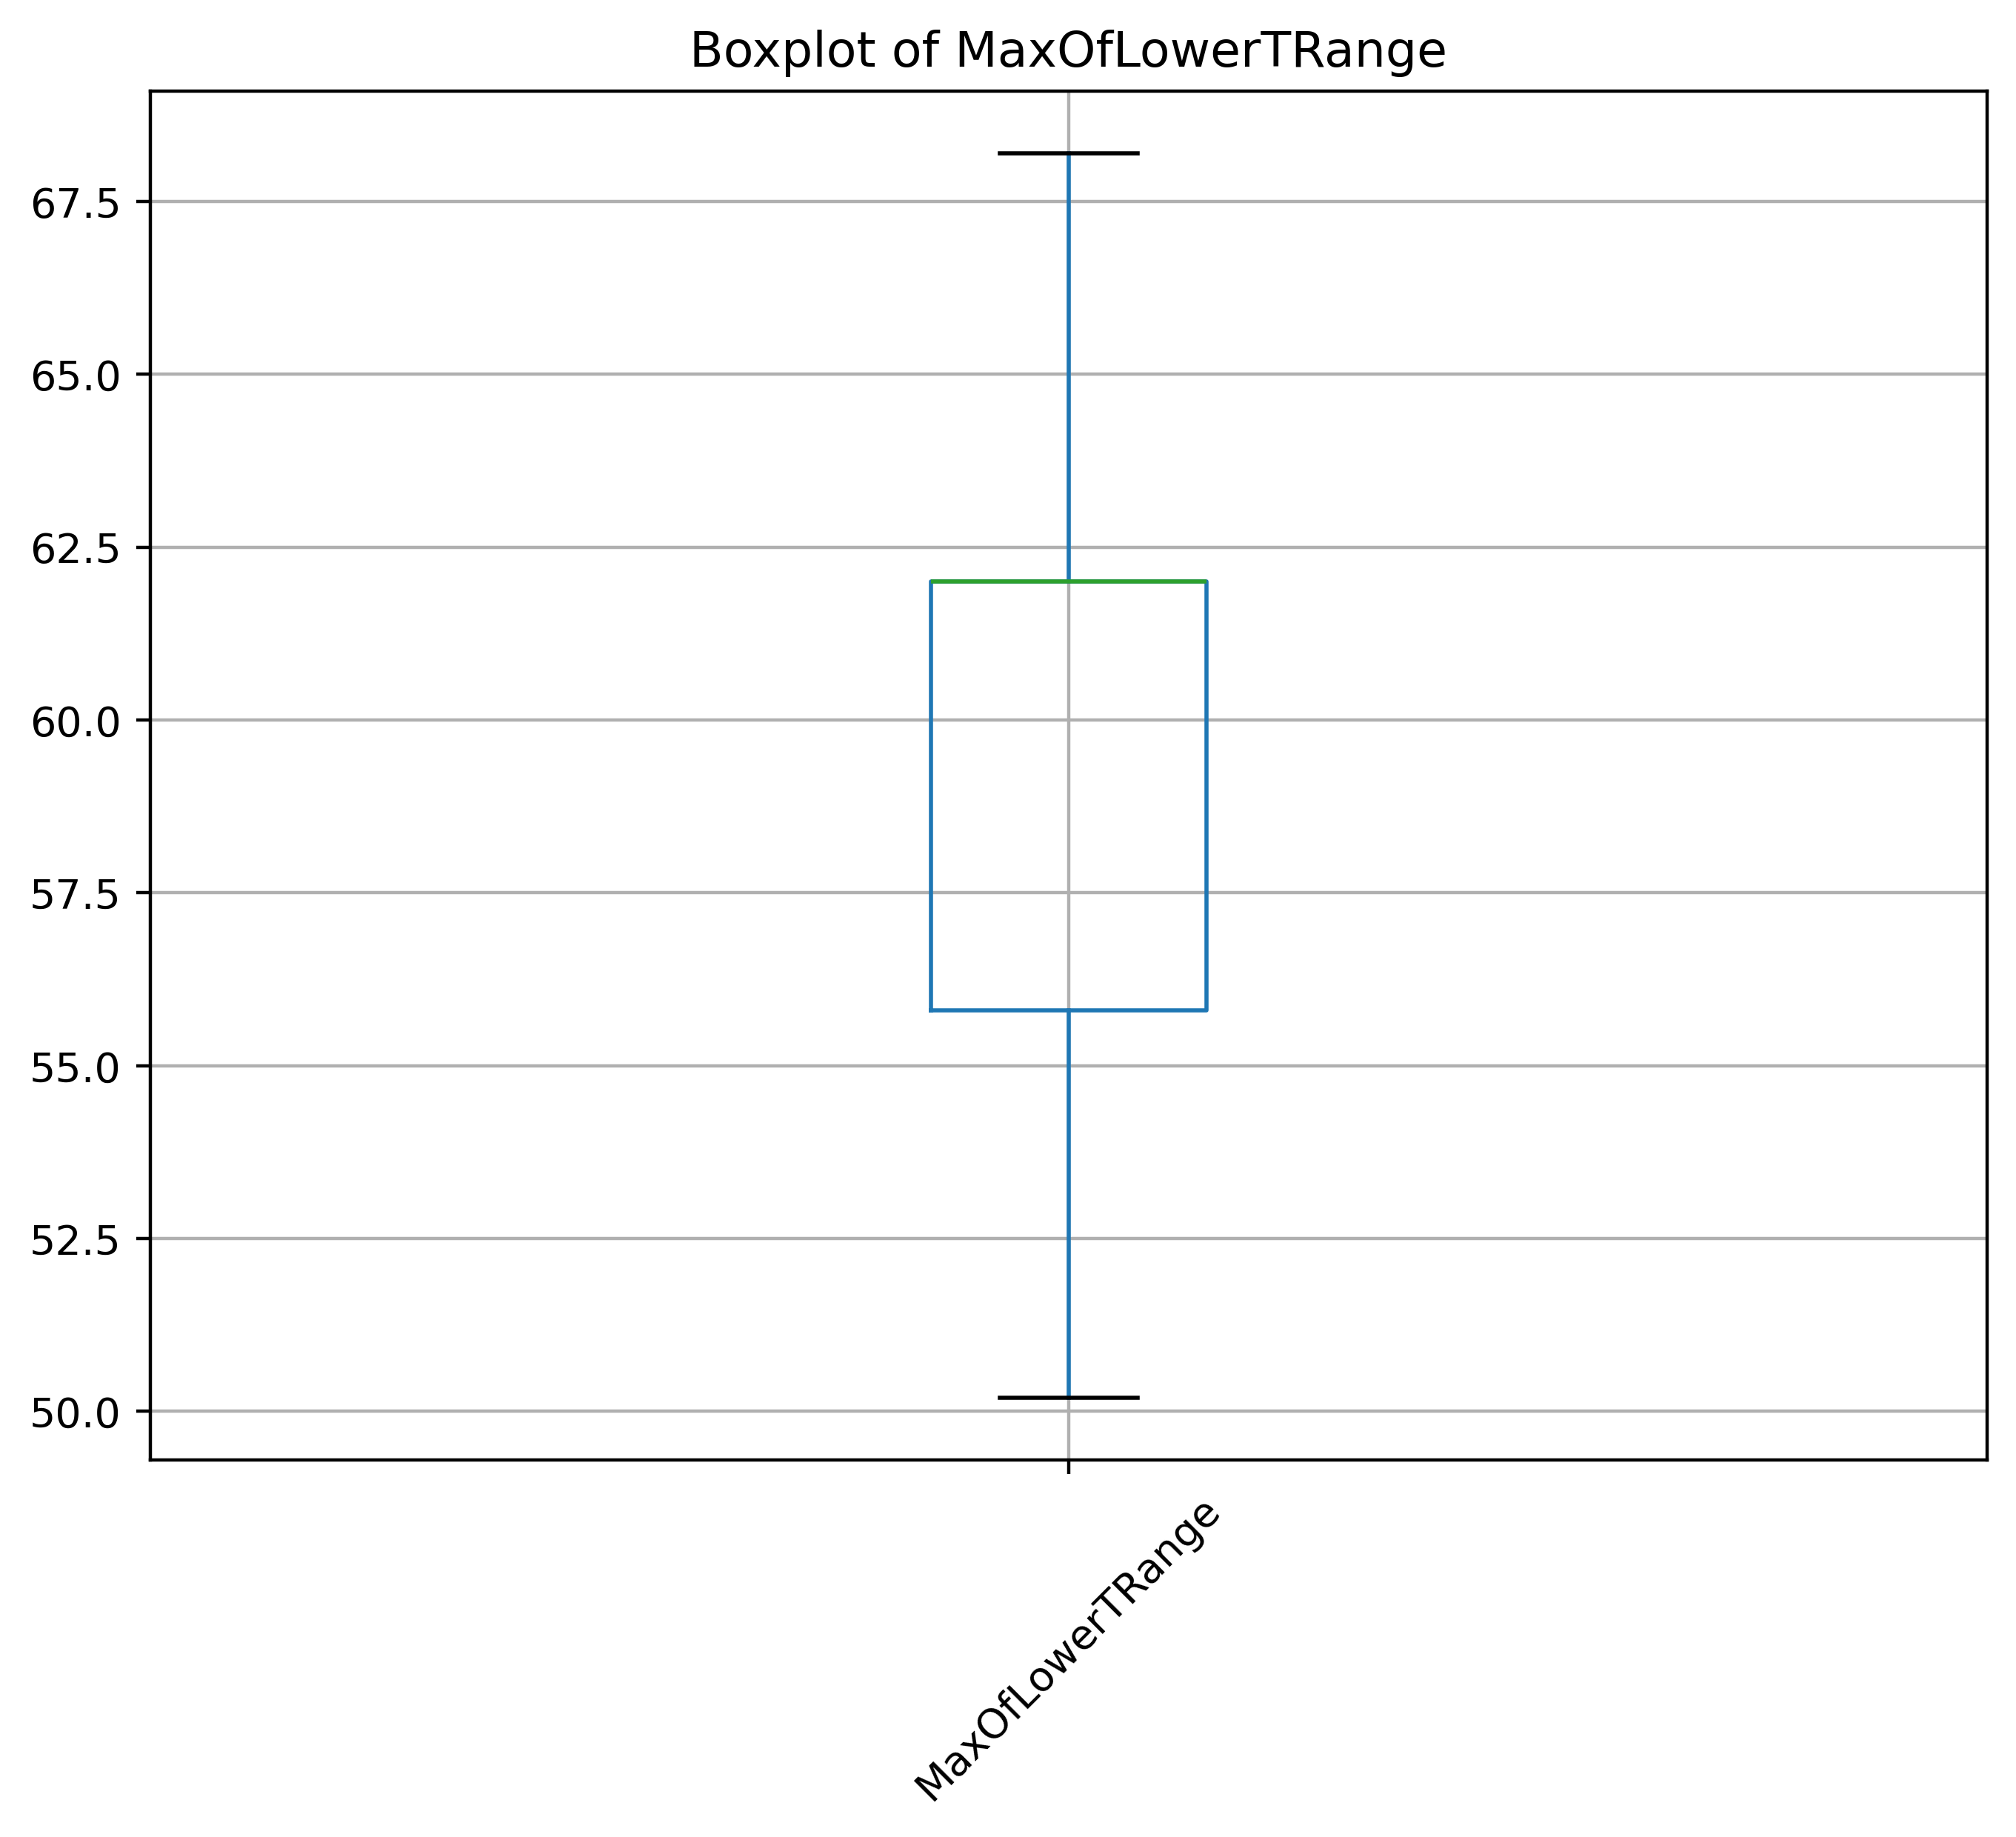

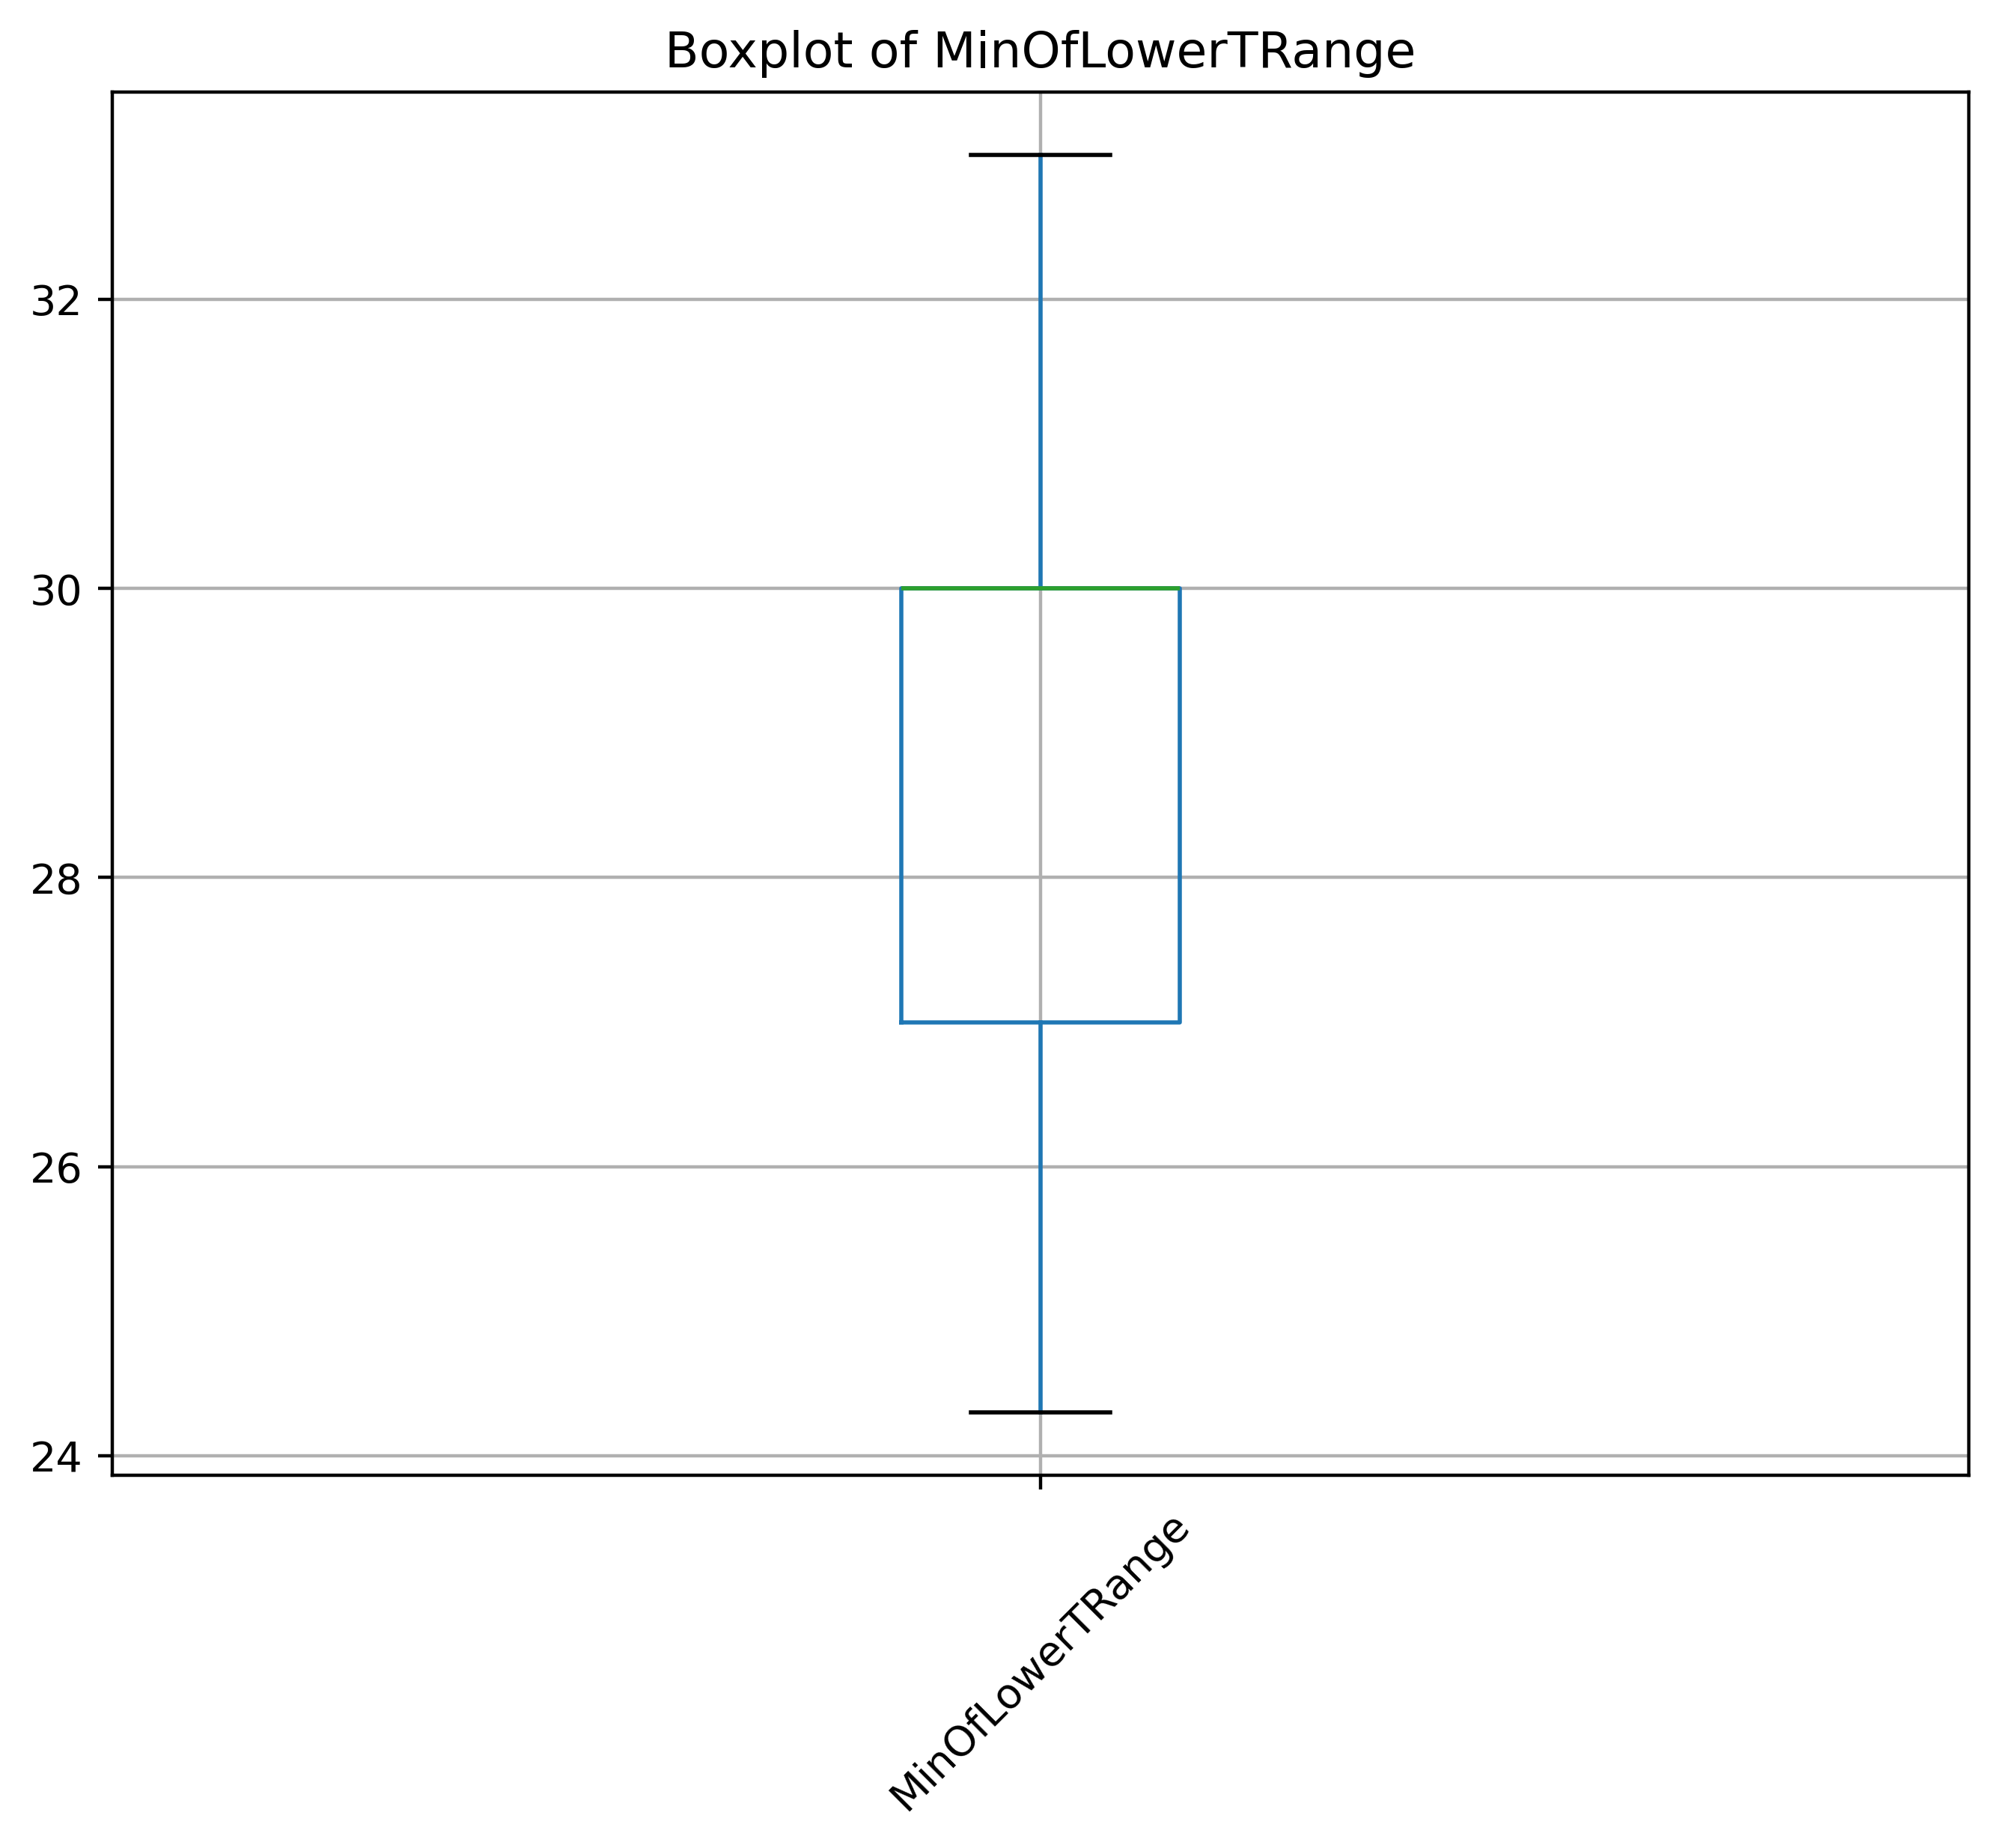

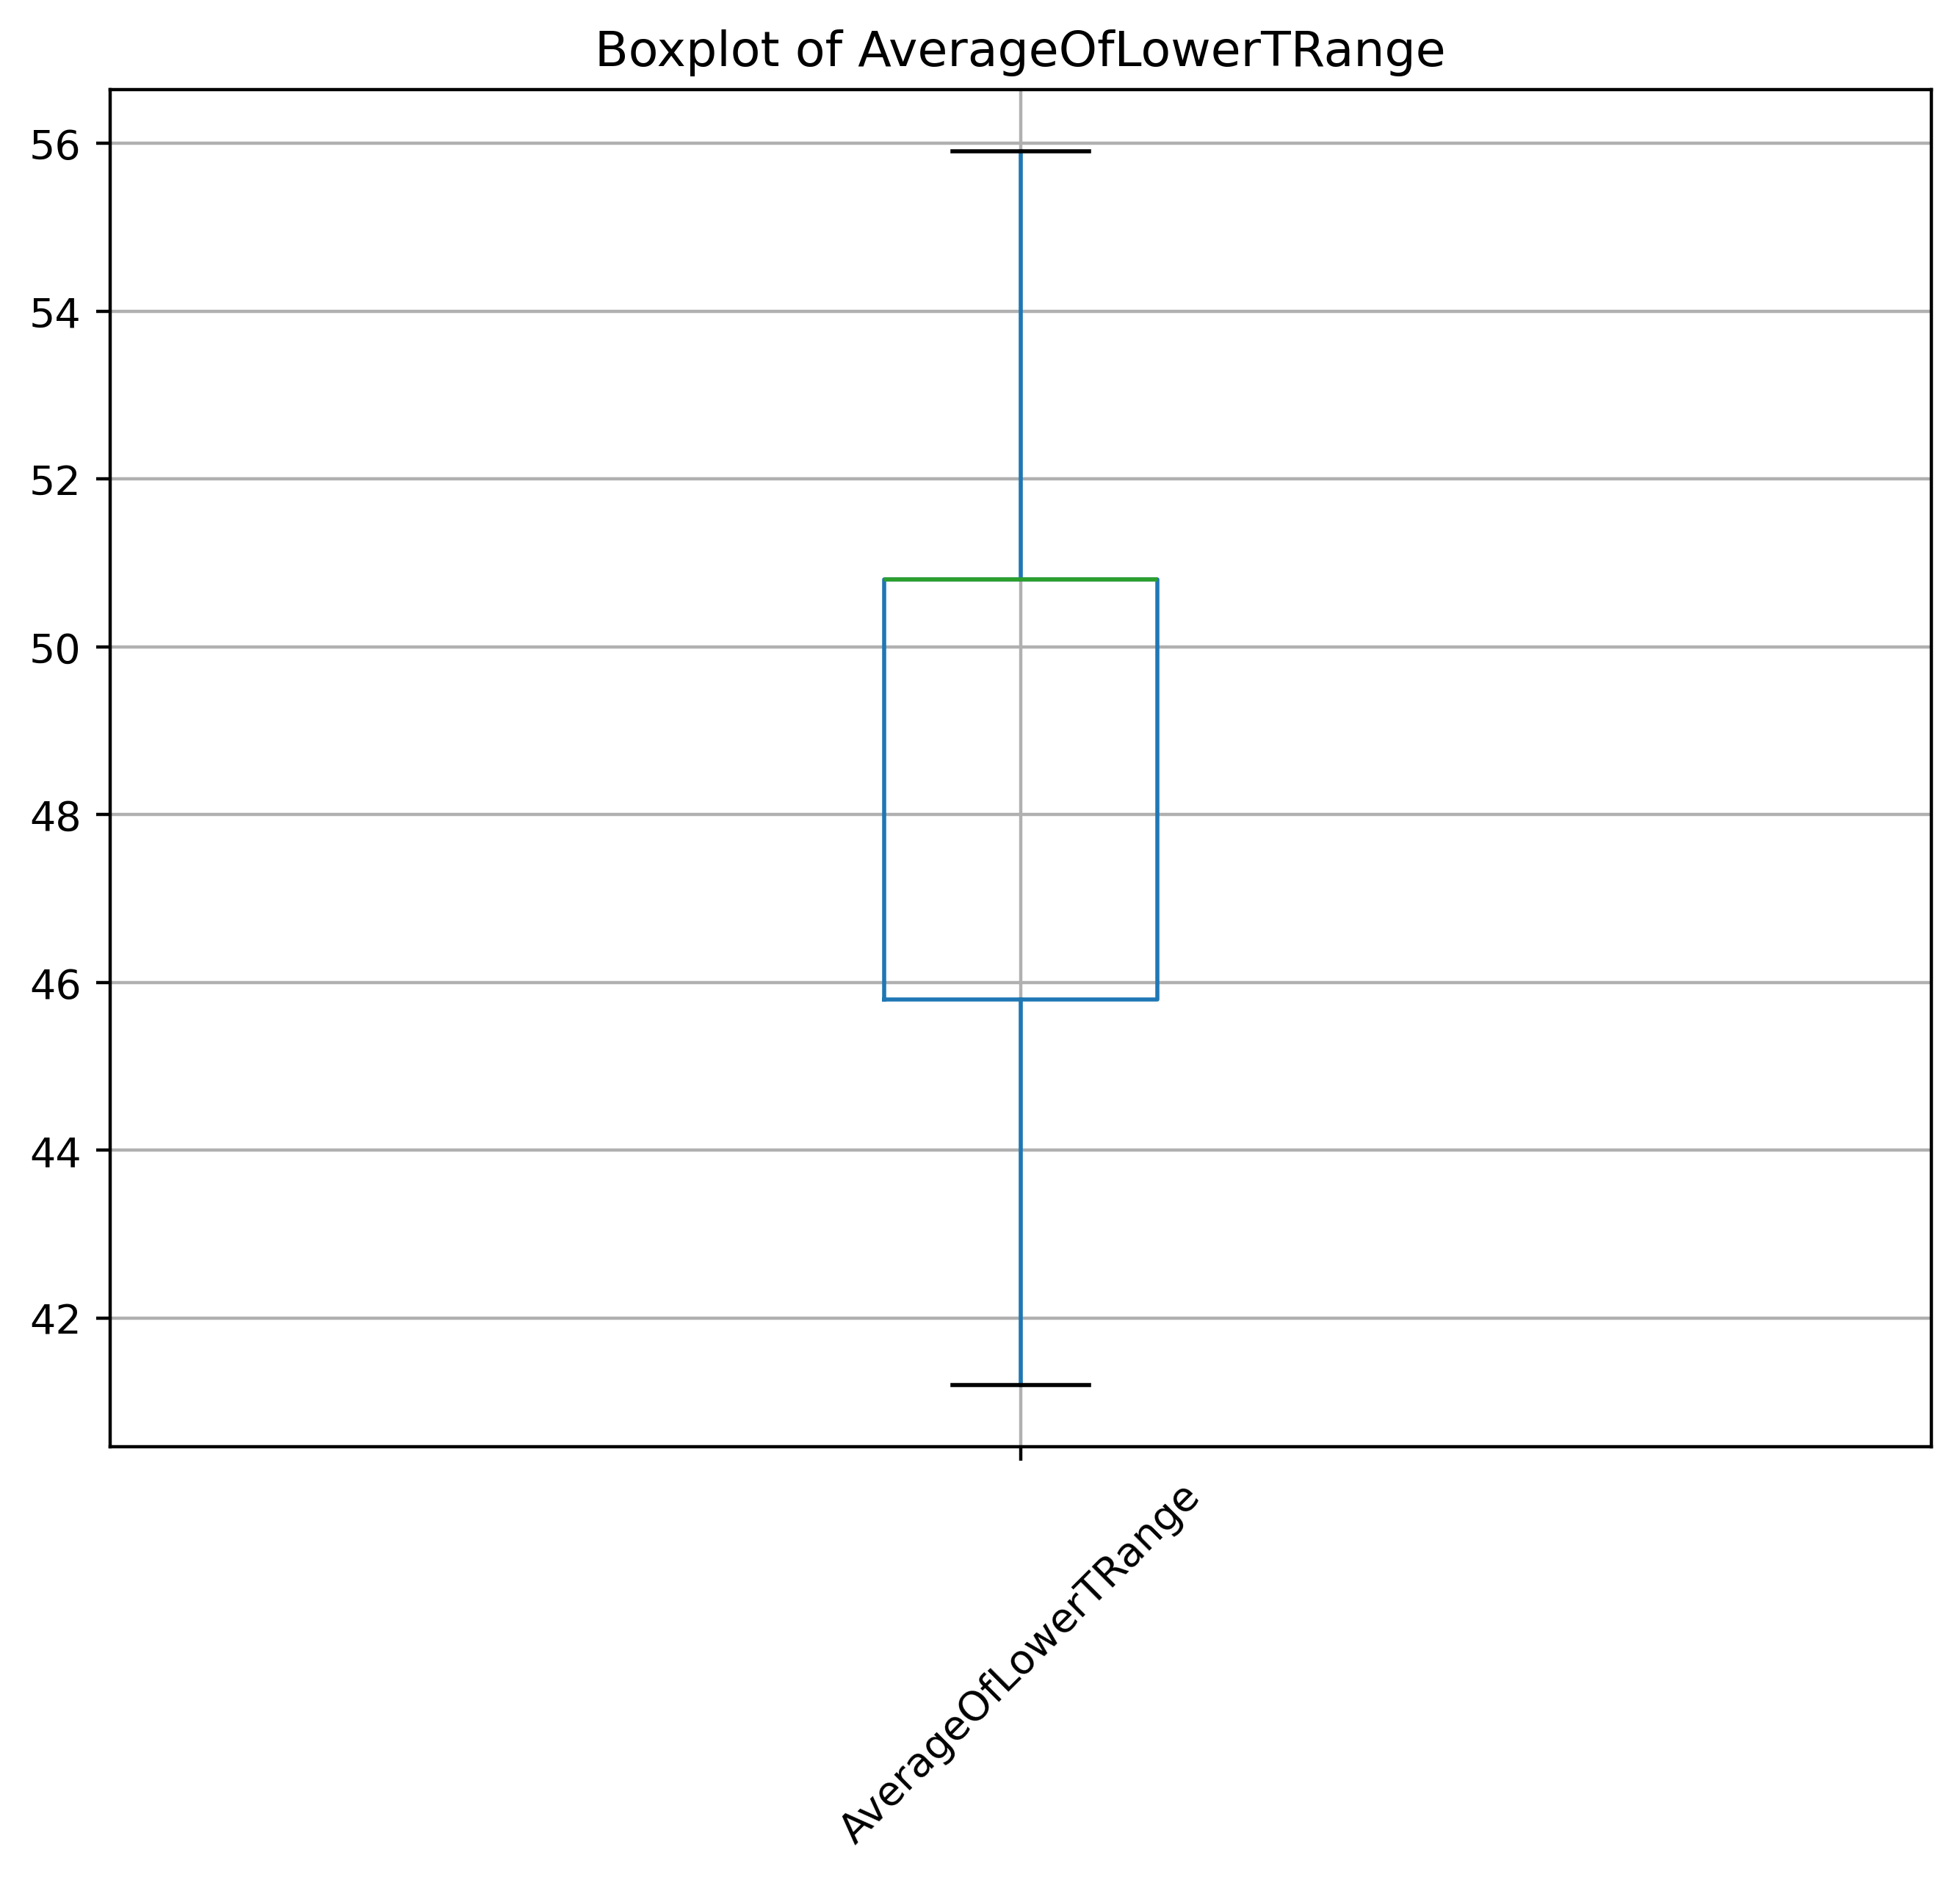

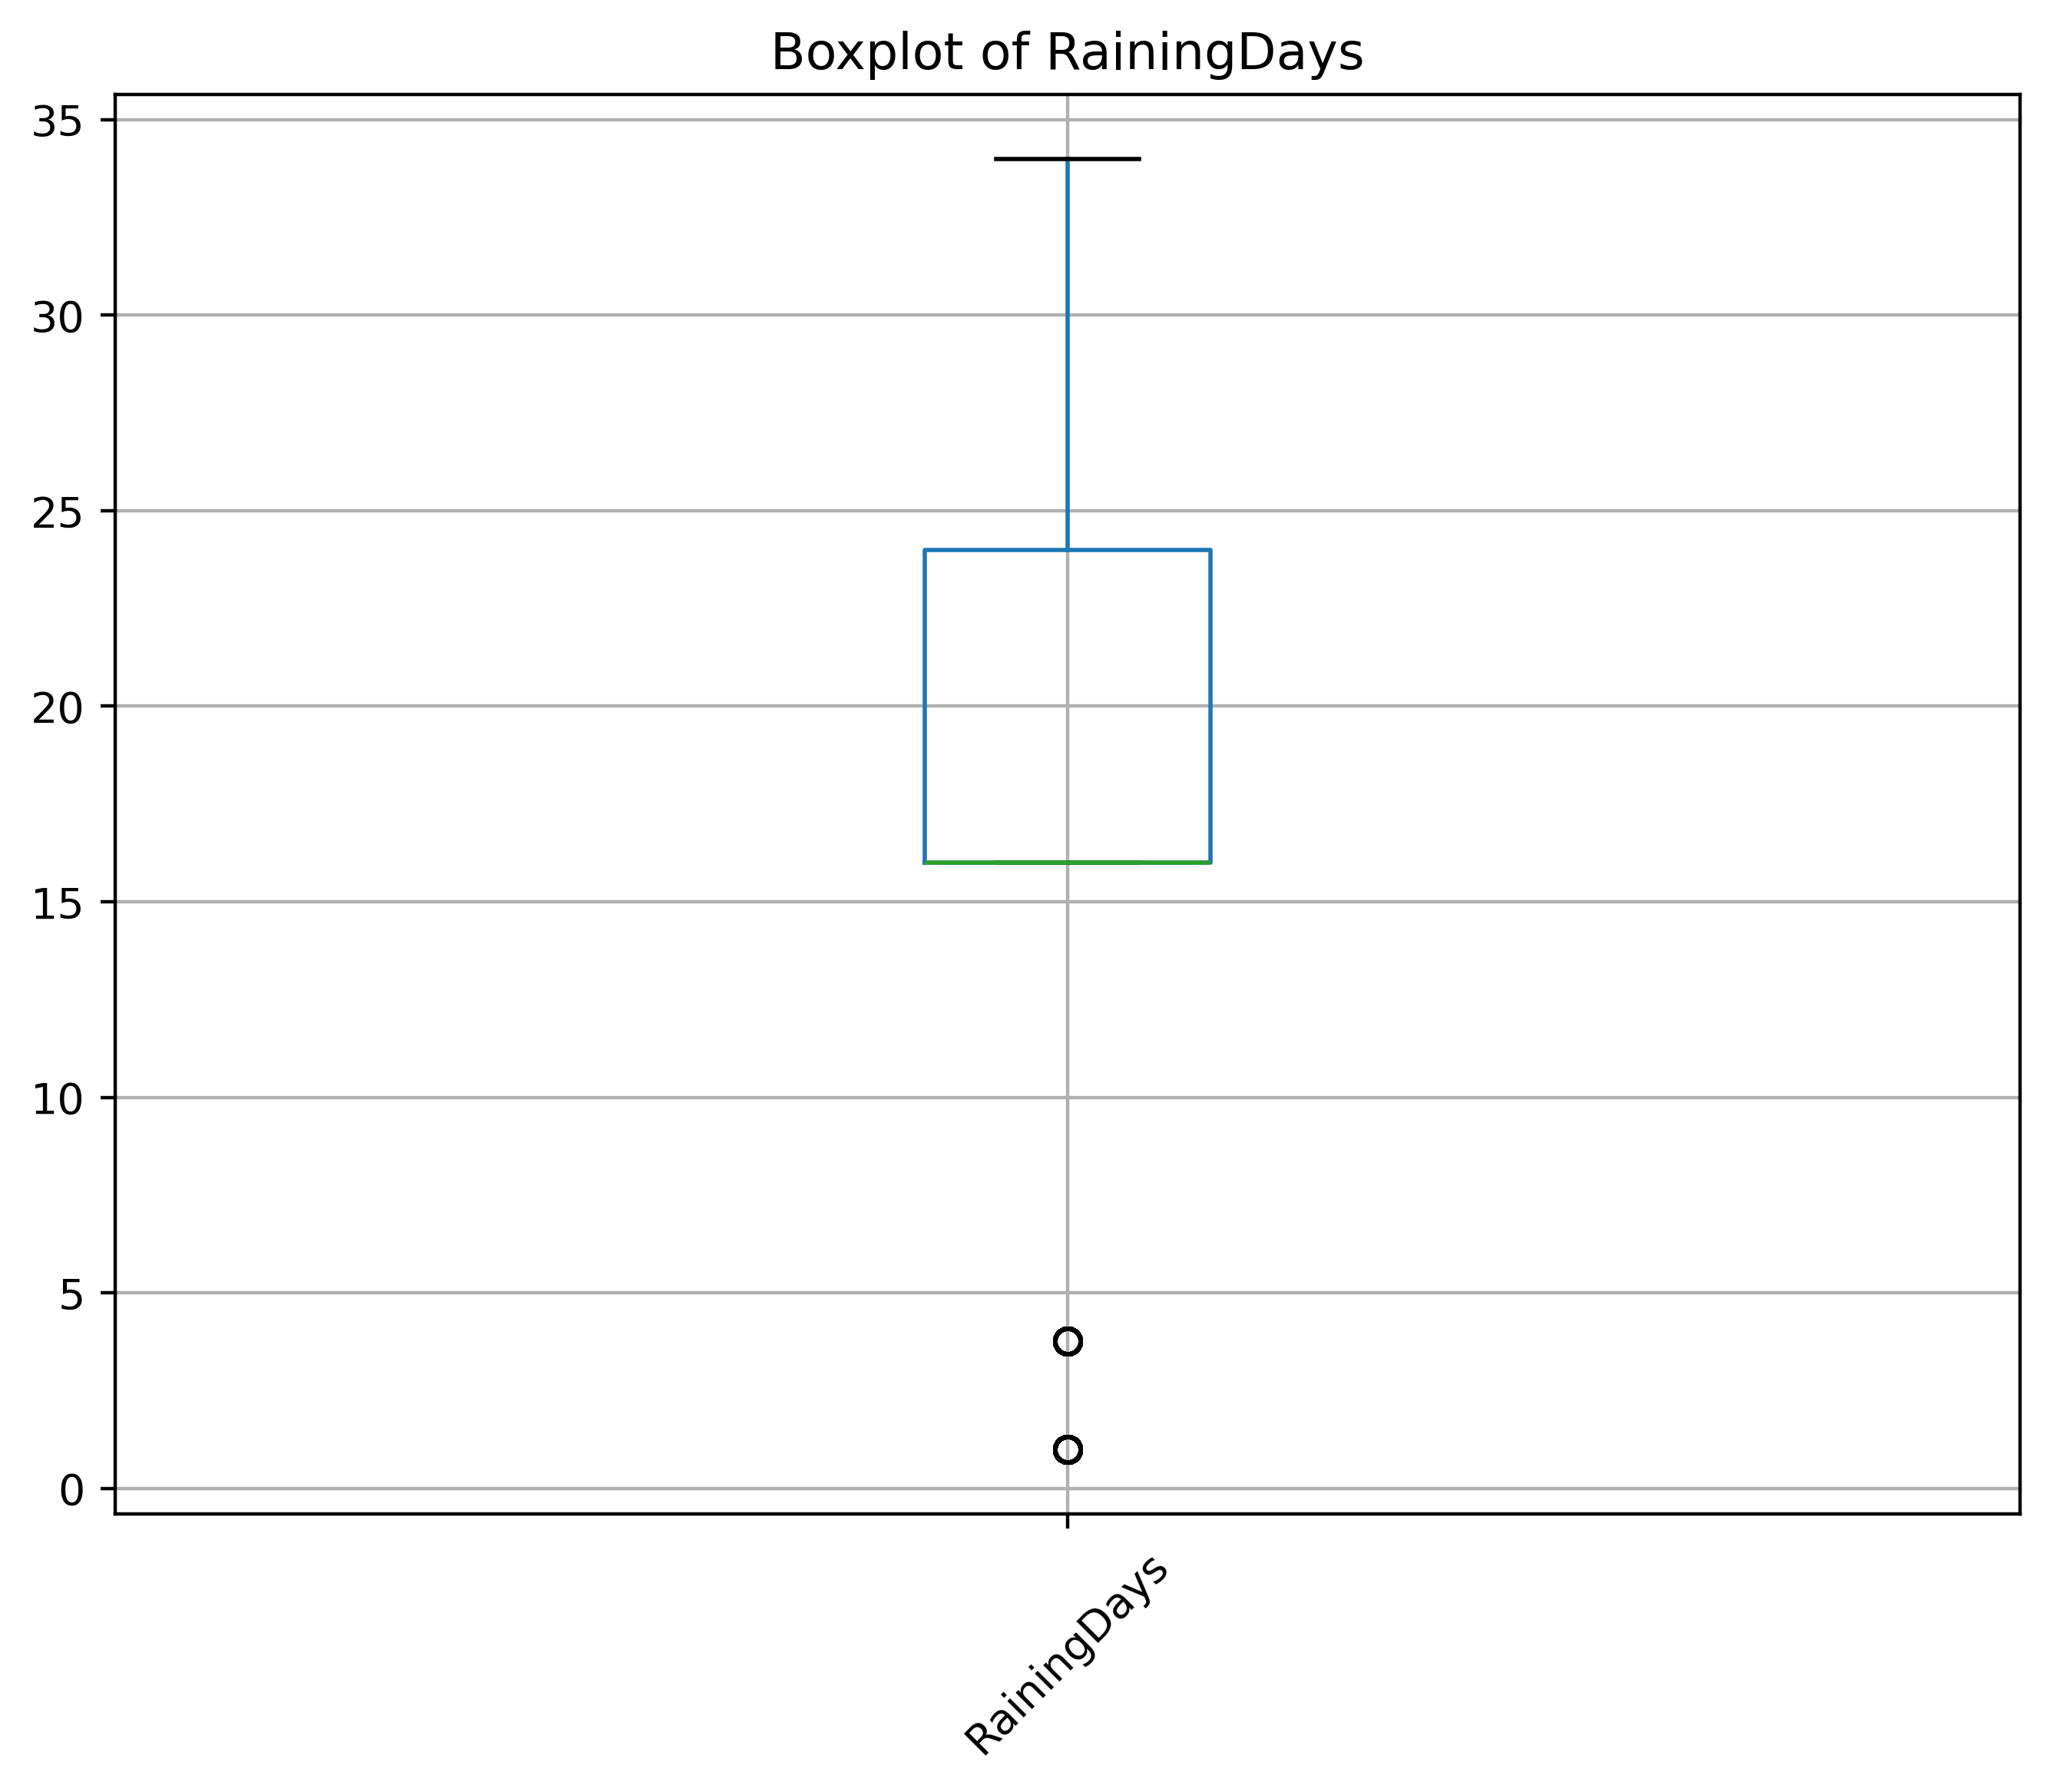

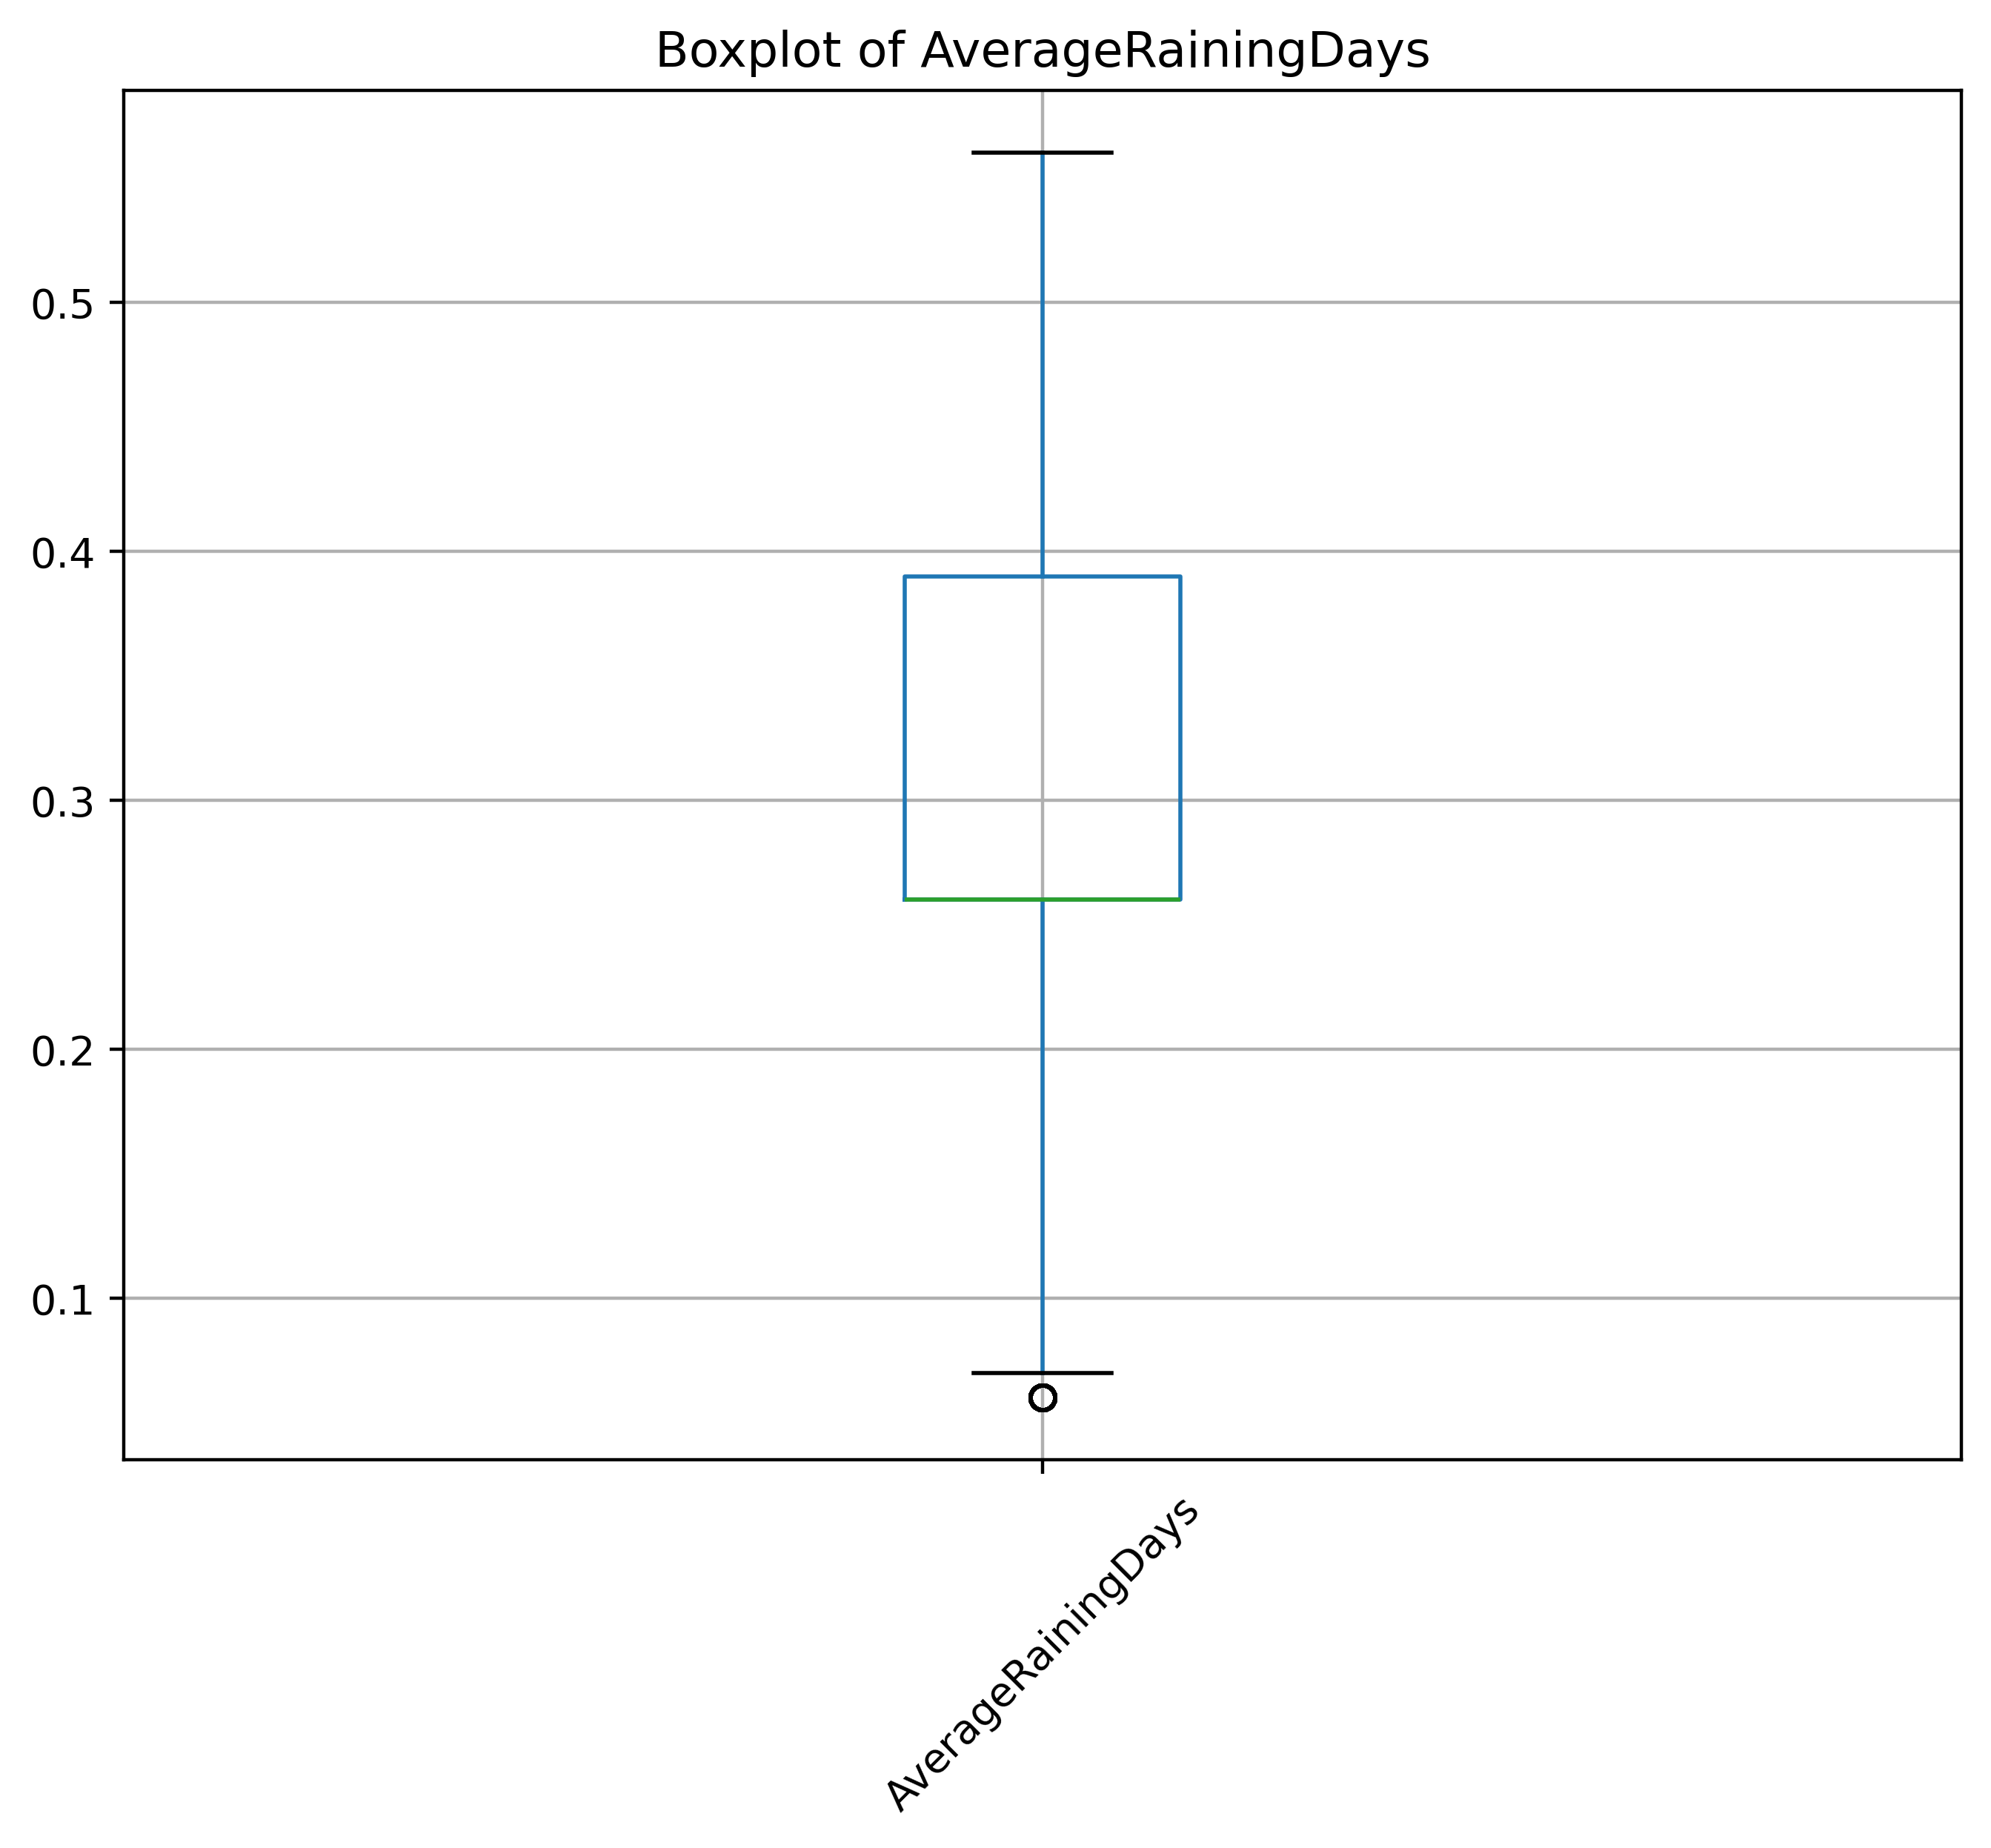

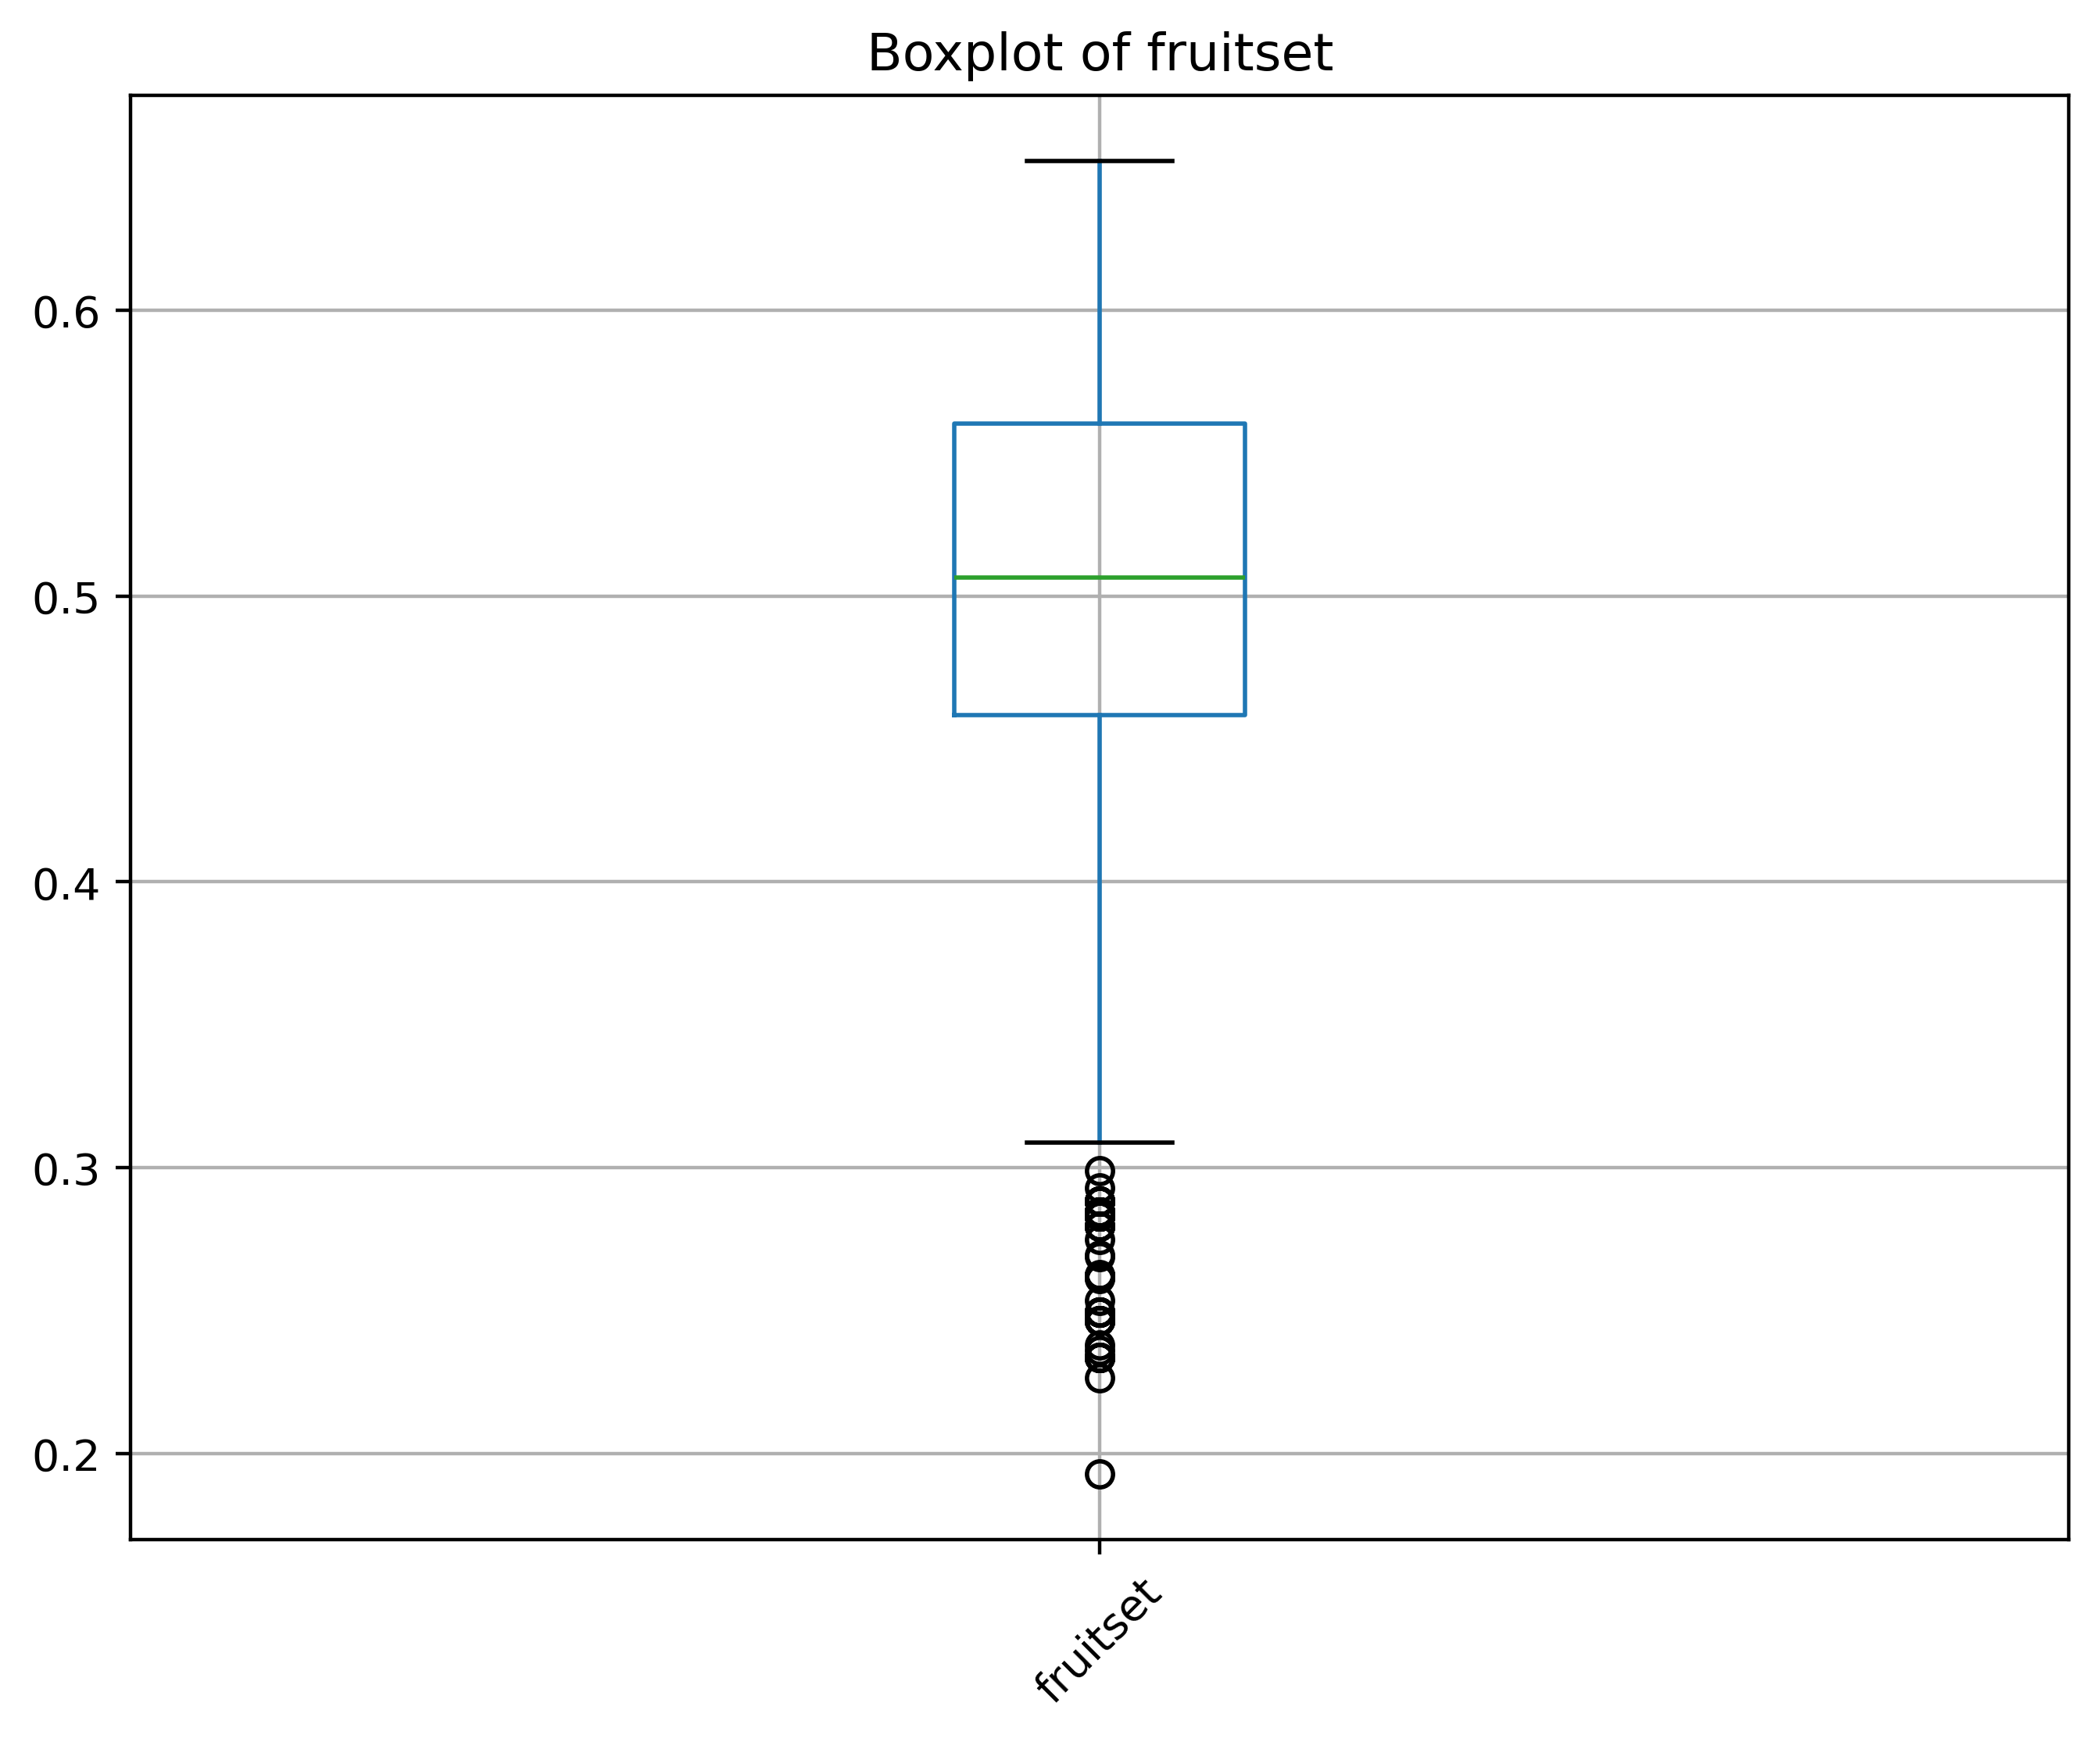

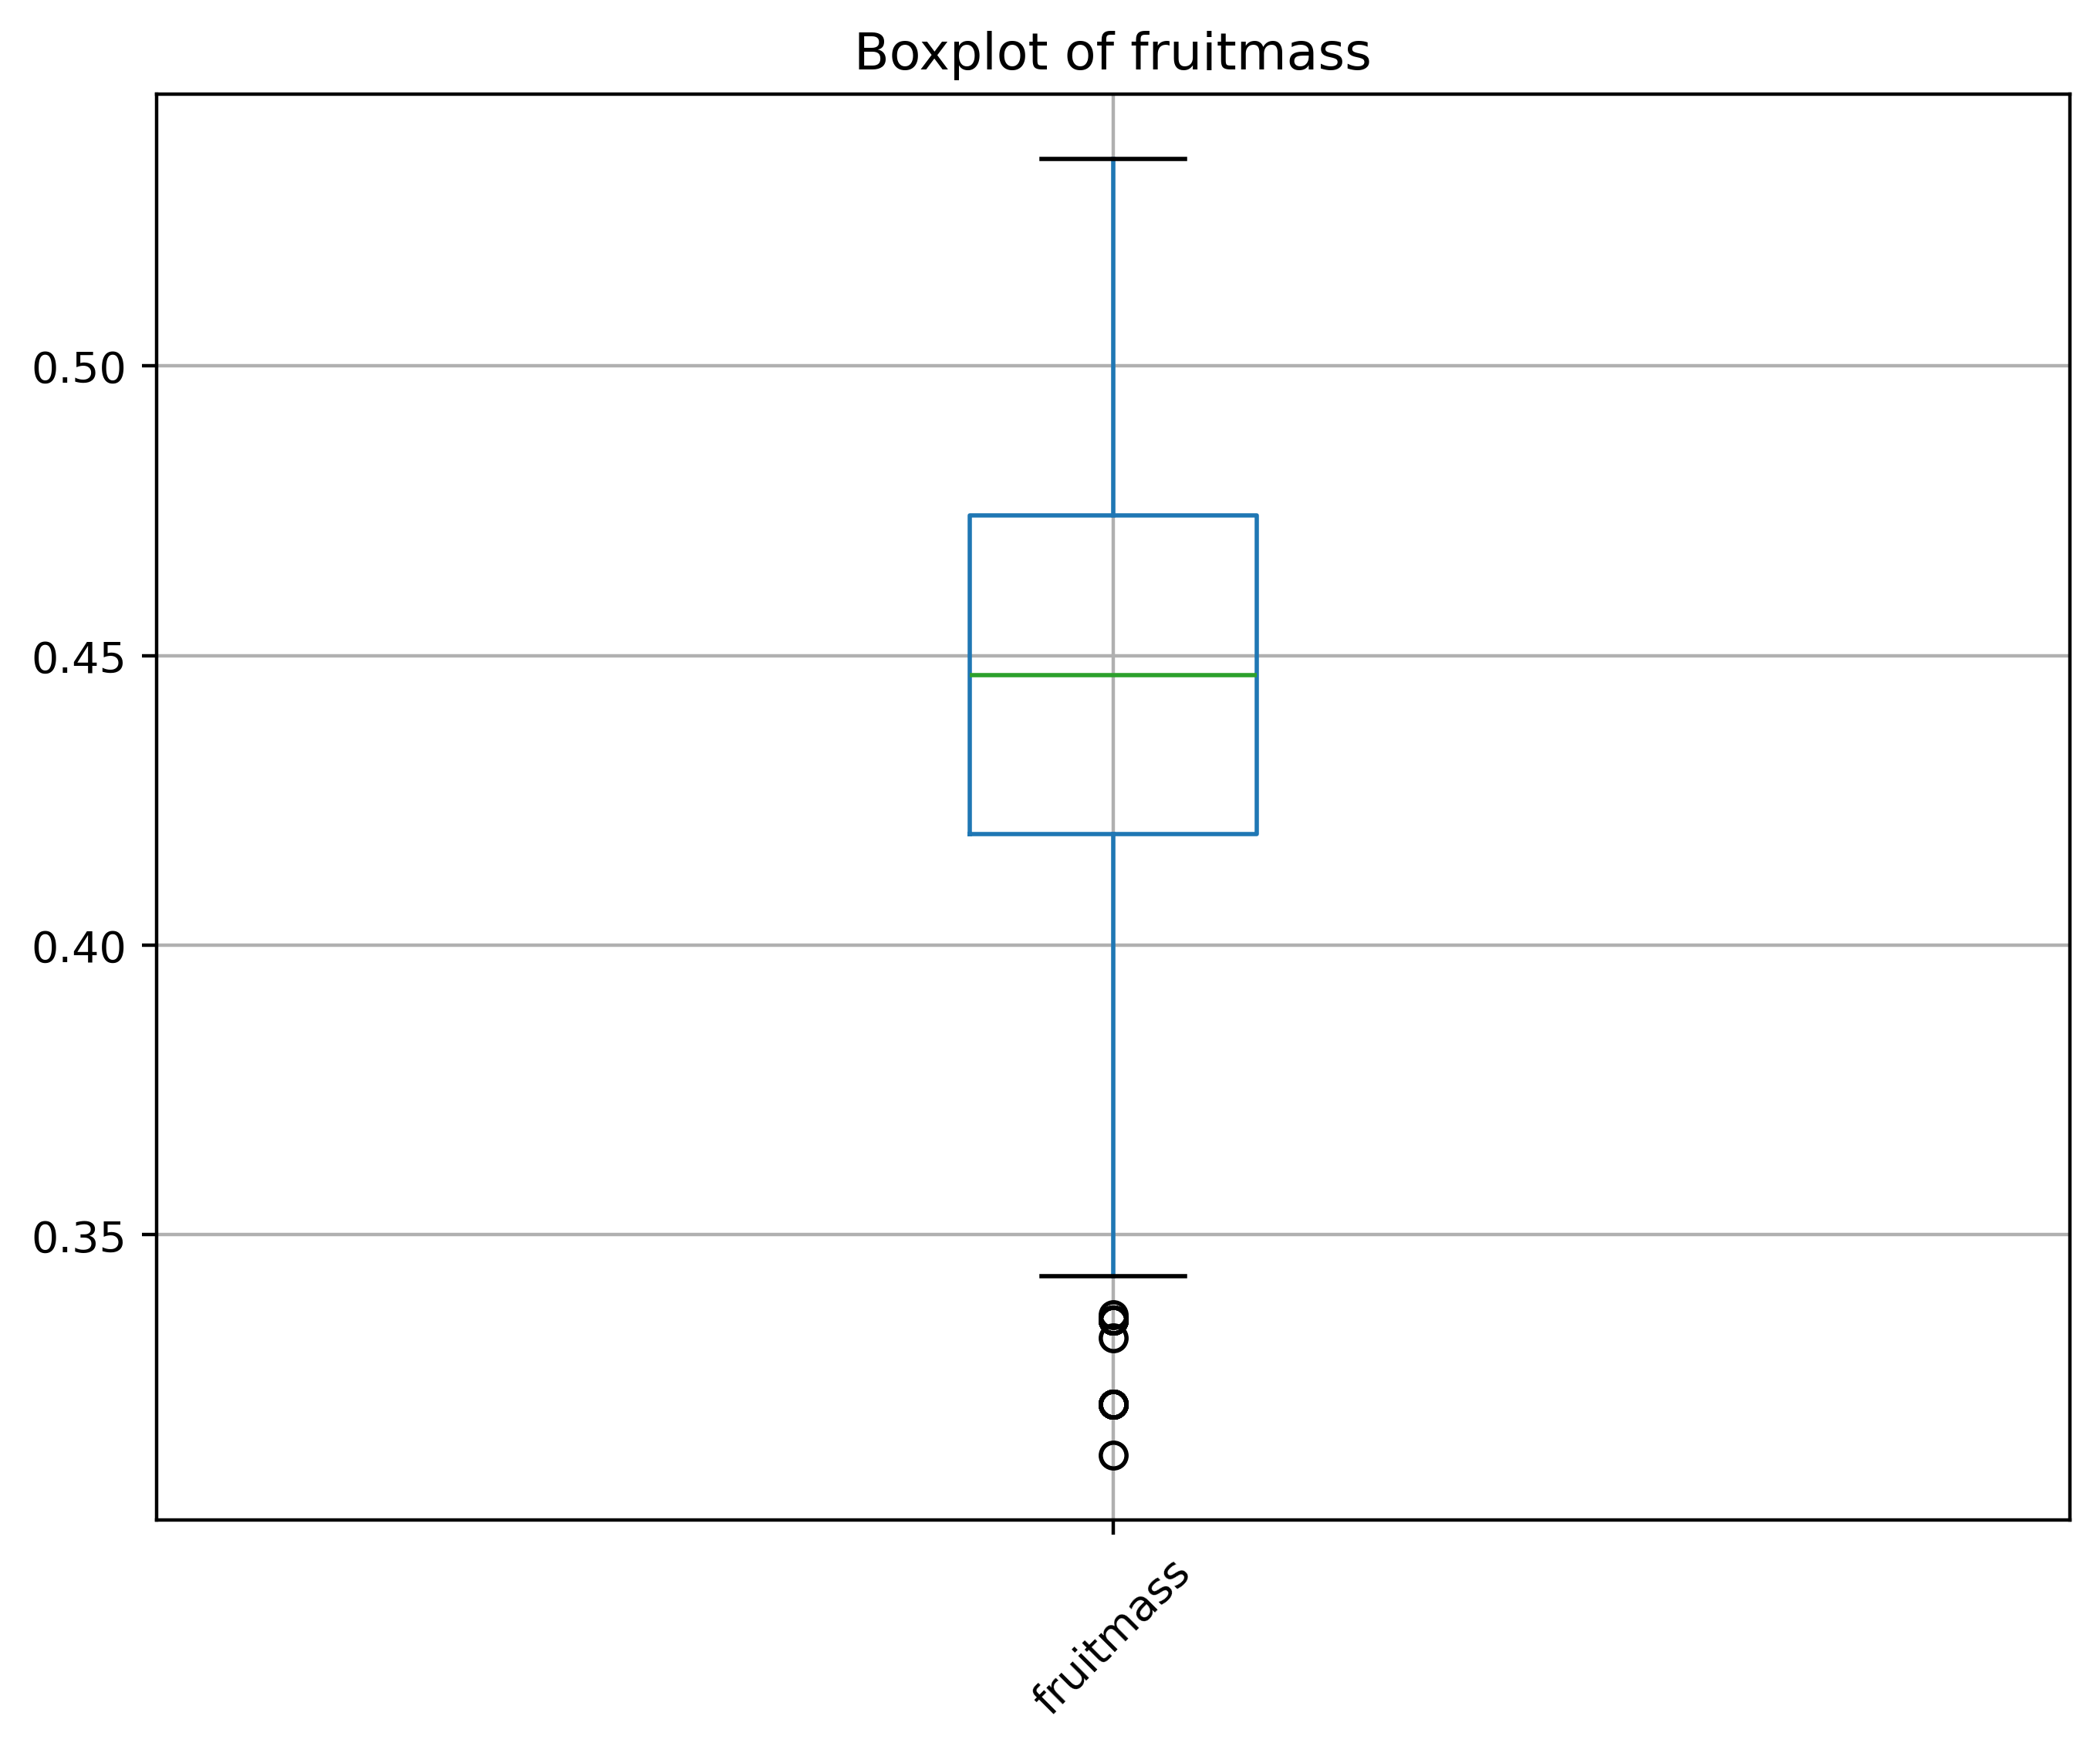

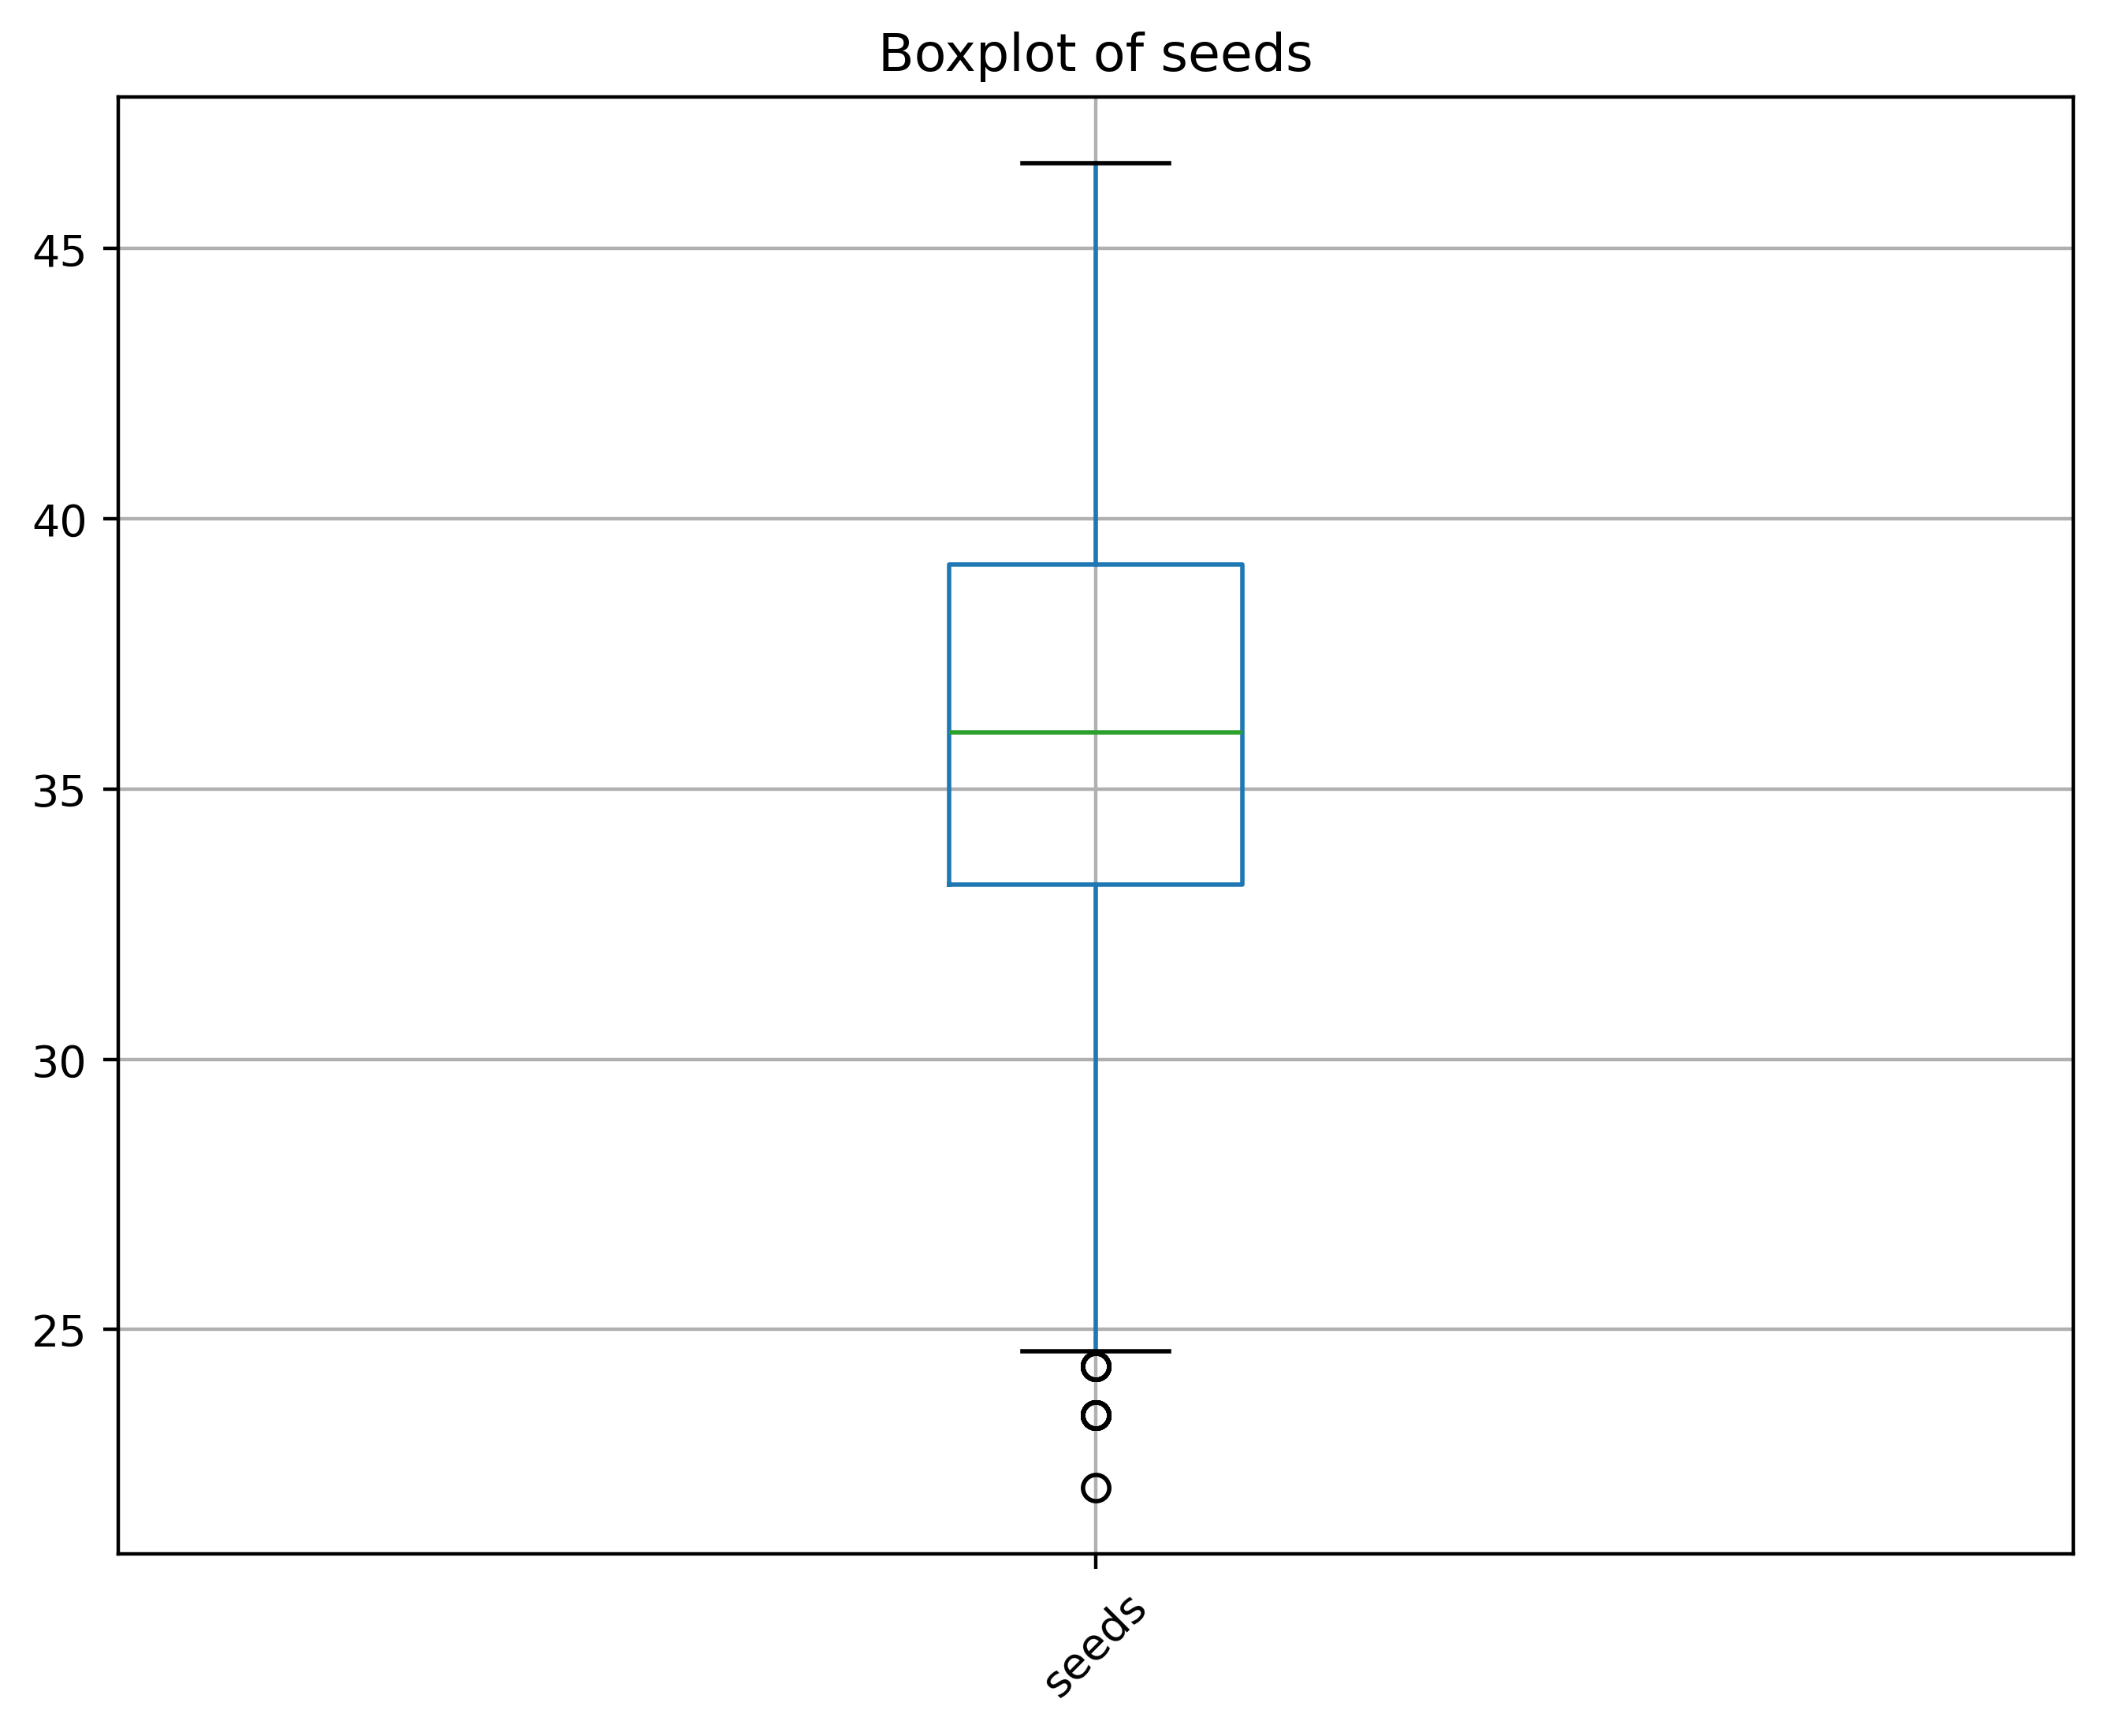

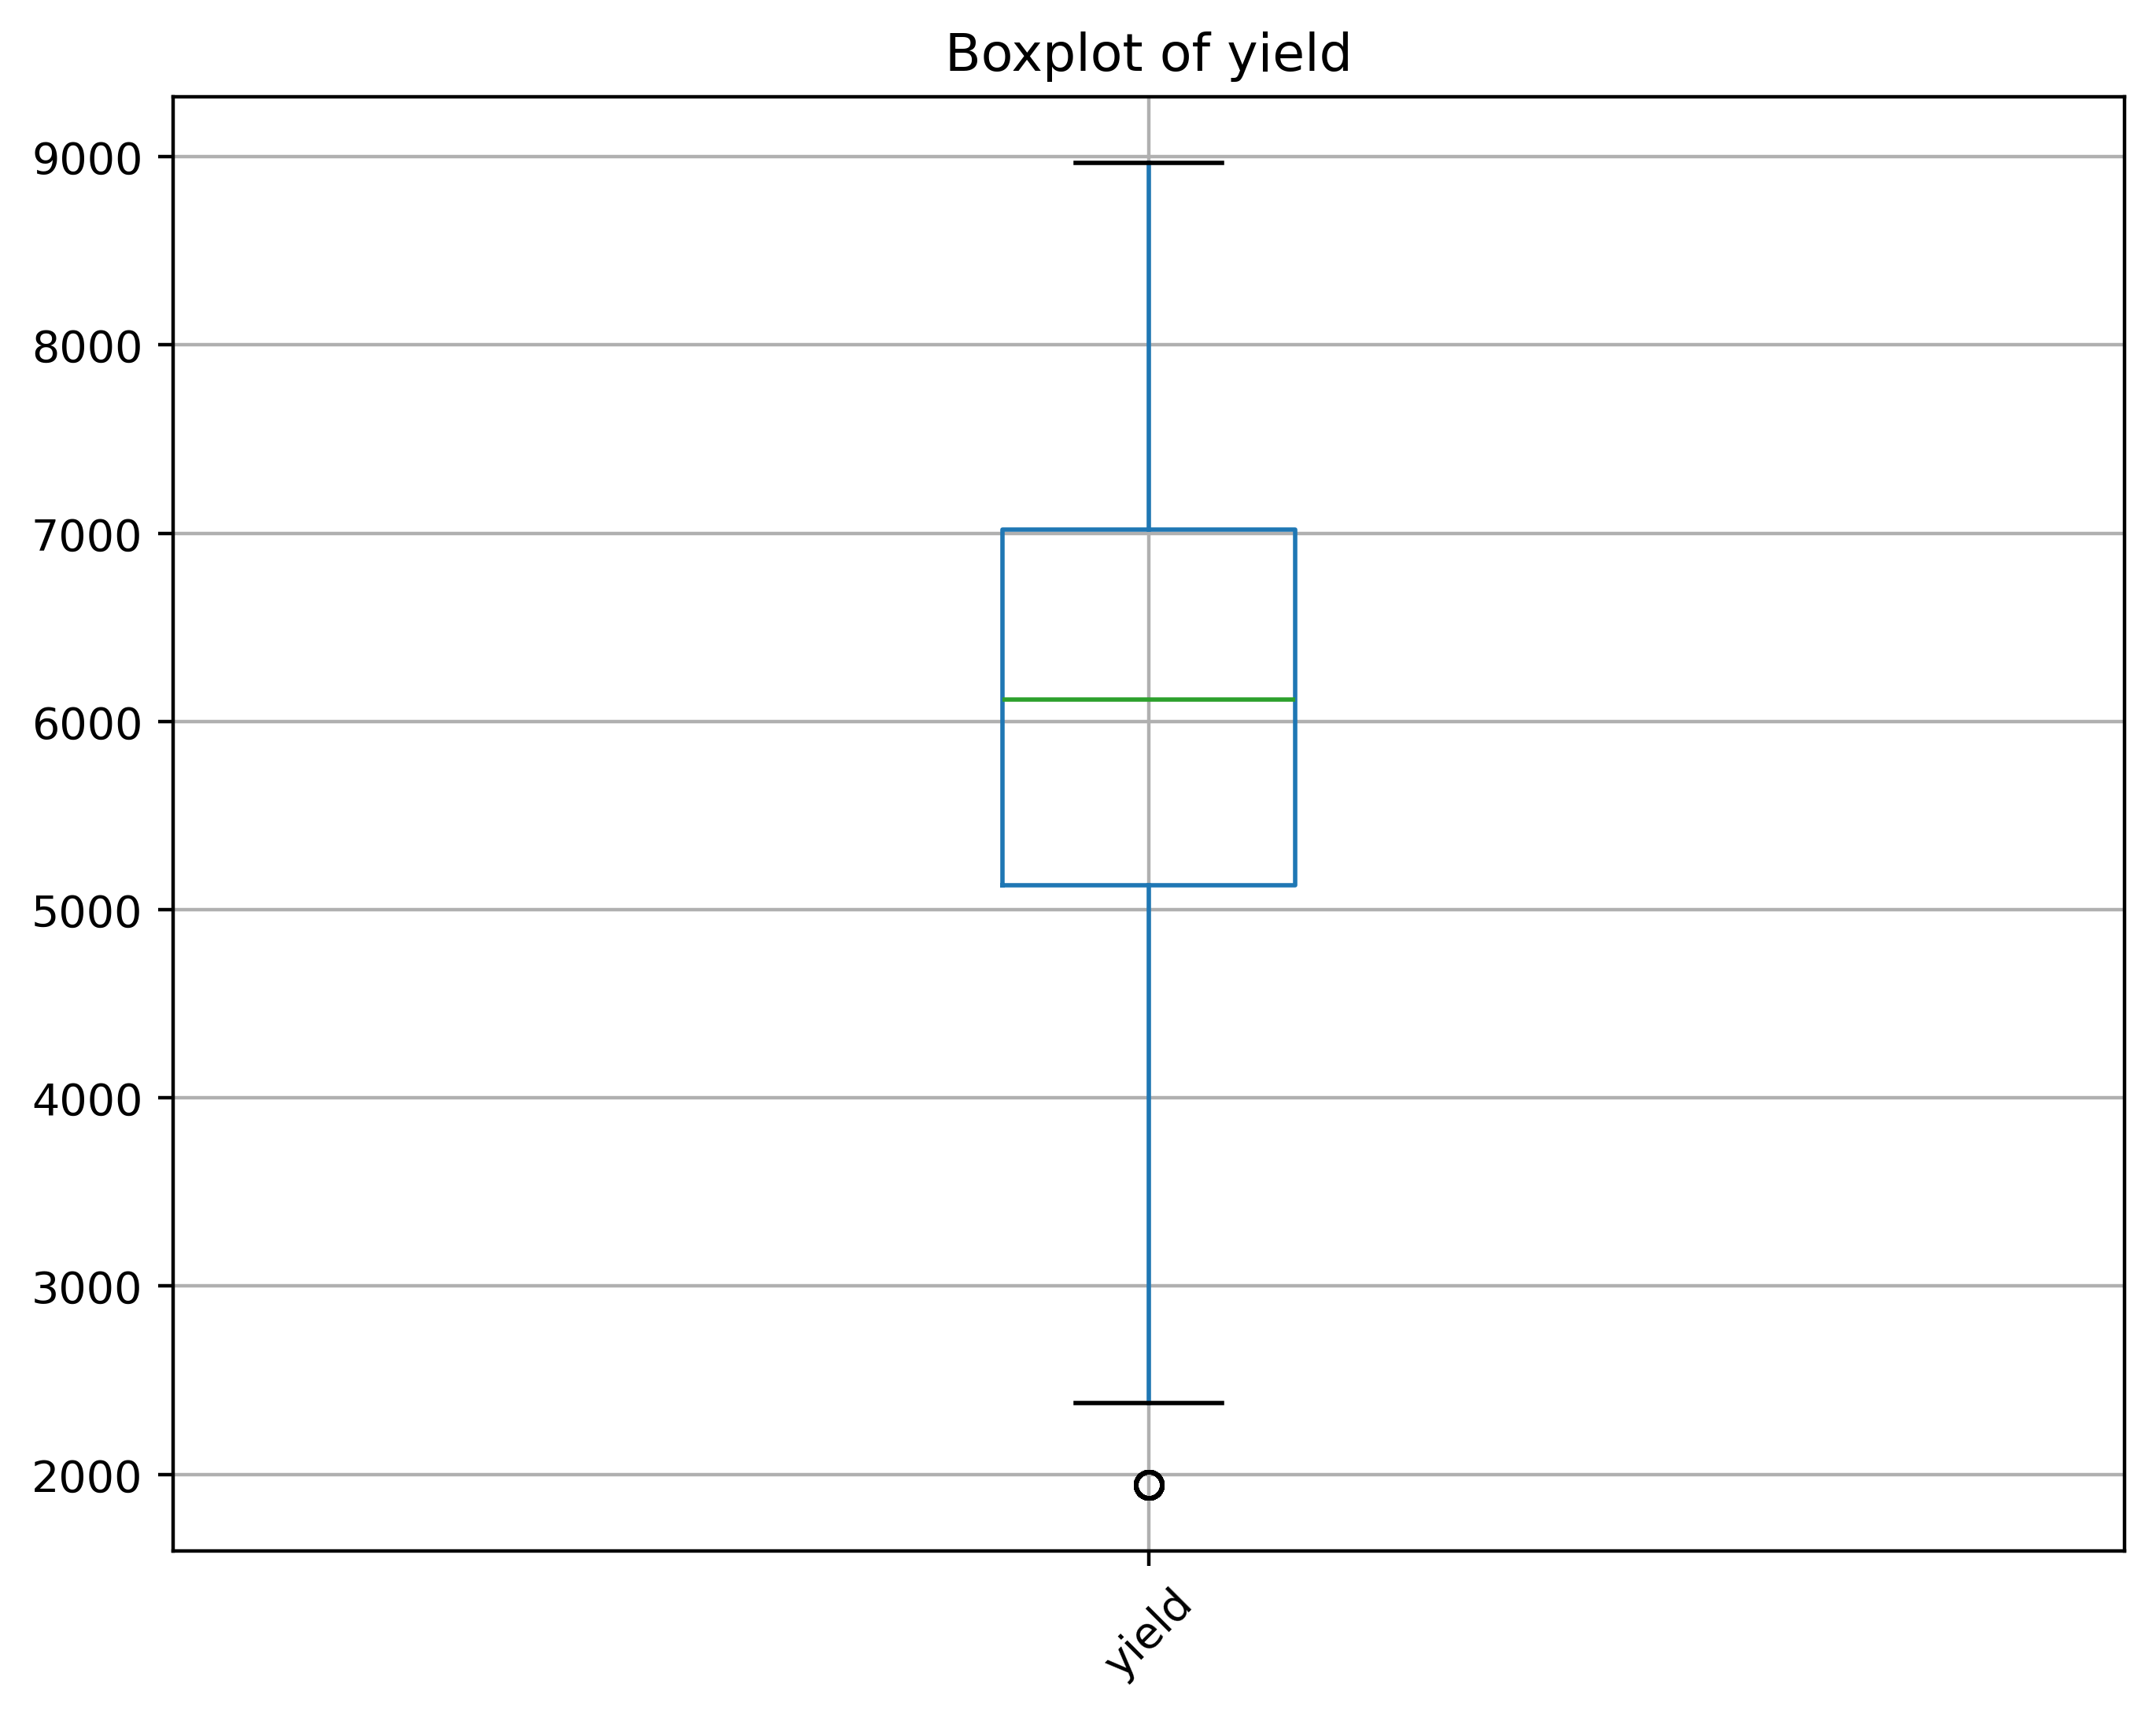


Outliers in id:
Number of outliers: 0
Percentage of outliers: 0.00%
Outlier boundaries: [-7644.00, 22932.00]

Outliers in clonesize:
Number of outliers: 0
Percentage of outliers: 0.00%
Outlier boundaries: [-6.25, 43.75]

Outliers in honeybee:
Number of outliers: 8
Percentage of outliers: 0.05%
Outlier boundaries: [-0.12, 0.88]

Outliers in bumbles:
Number of outliers: 10
Percentage of outliers: 0.07%
Outlier boundaries: [0.05, 0.57]

Outliers in andrena:
Number of outliers: 8
Percentage of outliers: 0.05%
Outlier boundaries: [0.01, 1.00]

Outliers in osmia:
Number of outliers: 56
Percentage of outliers: 0.37%
Outlier boundaries: [0.12, 1.12]

Outliers in MaxOfUpperTRange:
Number of outliers: 0
Percentage of outliers: 0.00%
Outlier boundaries: [64.50, 98.90]

Outliers in MinOfUpperTRange:
Number of outliers: 0
Percentage of outliers: 0.00%
Outlier boundaries: [39.00, 59.80]

Outliers in AverageOfUpperTRange:
Number of outliers: 0
Percentage of outliers: 0.00%
Outlier boundaries: [53.90

In [6]:
for column in data.columns:
    plt.figure(figsize=(8, 6), dpi=400)
    data.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(data[column])*100):.2f}%")
    print(f"Outlier boundaries: [{lower_bound:.2f}, {upper_bound:.2f}]")

## "RainingDays" has 23.34% of outliers. Lets investigate it

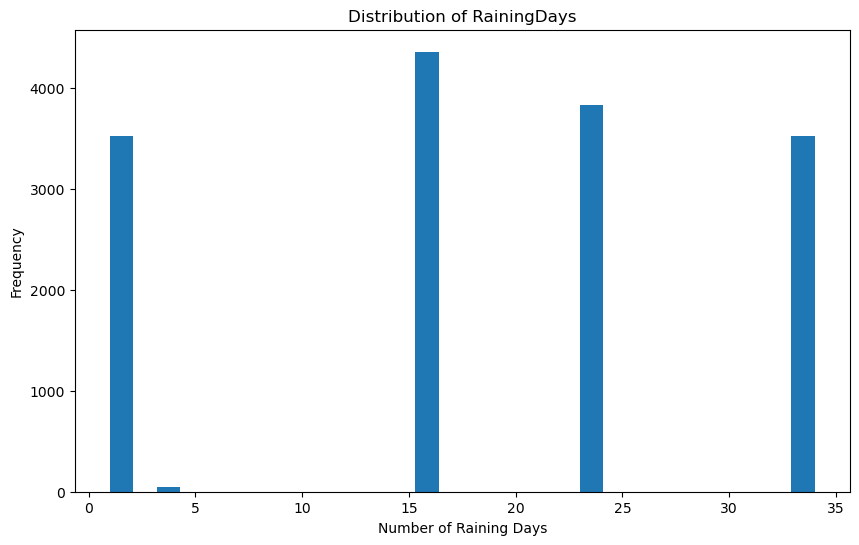

RainingDays Statistics:
count    15289.000000
mean        18.660865
std         11.657582
min          1.000000
25%         16.000000
50%         16.000000
75%         24.000000
max         34.000000
Name: RainingDays, dtype: float64


In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data['RainingDays'], bins=30)
plt.title('Distribution of RainingDays')
plt.xlabel('Number of Raining Days')
plt.ylabel('Frequency')
plt.show()

print("RainingDays Statistics:")
print(data['RainingDays'].describe())

There are not outliers for "RainingDays" feature. But we still need to drop it, due to its correlation=1 with Average raining days

In [8]:
import seaborn as sns

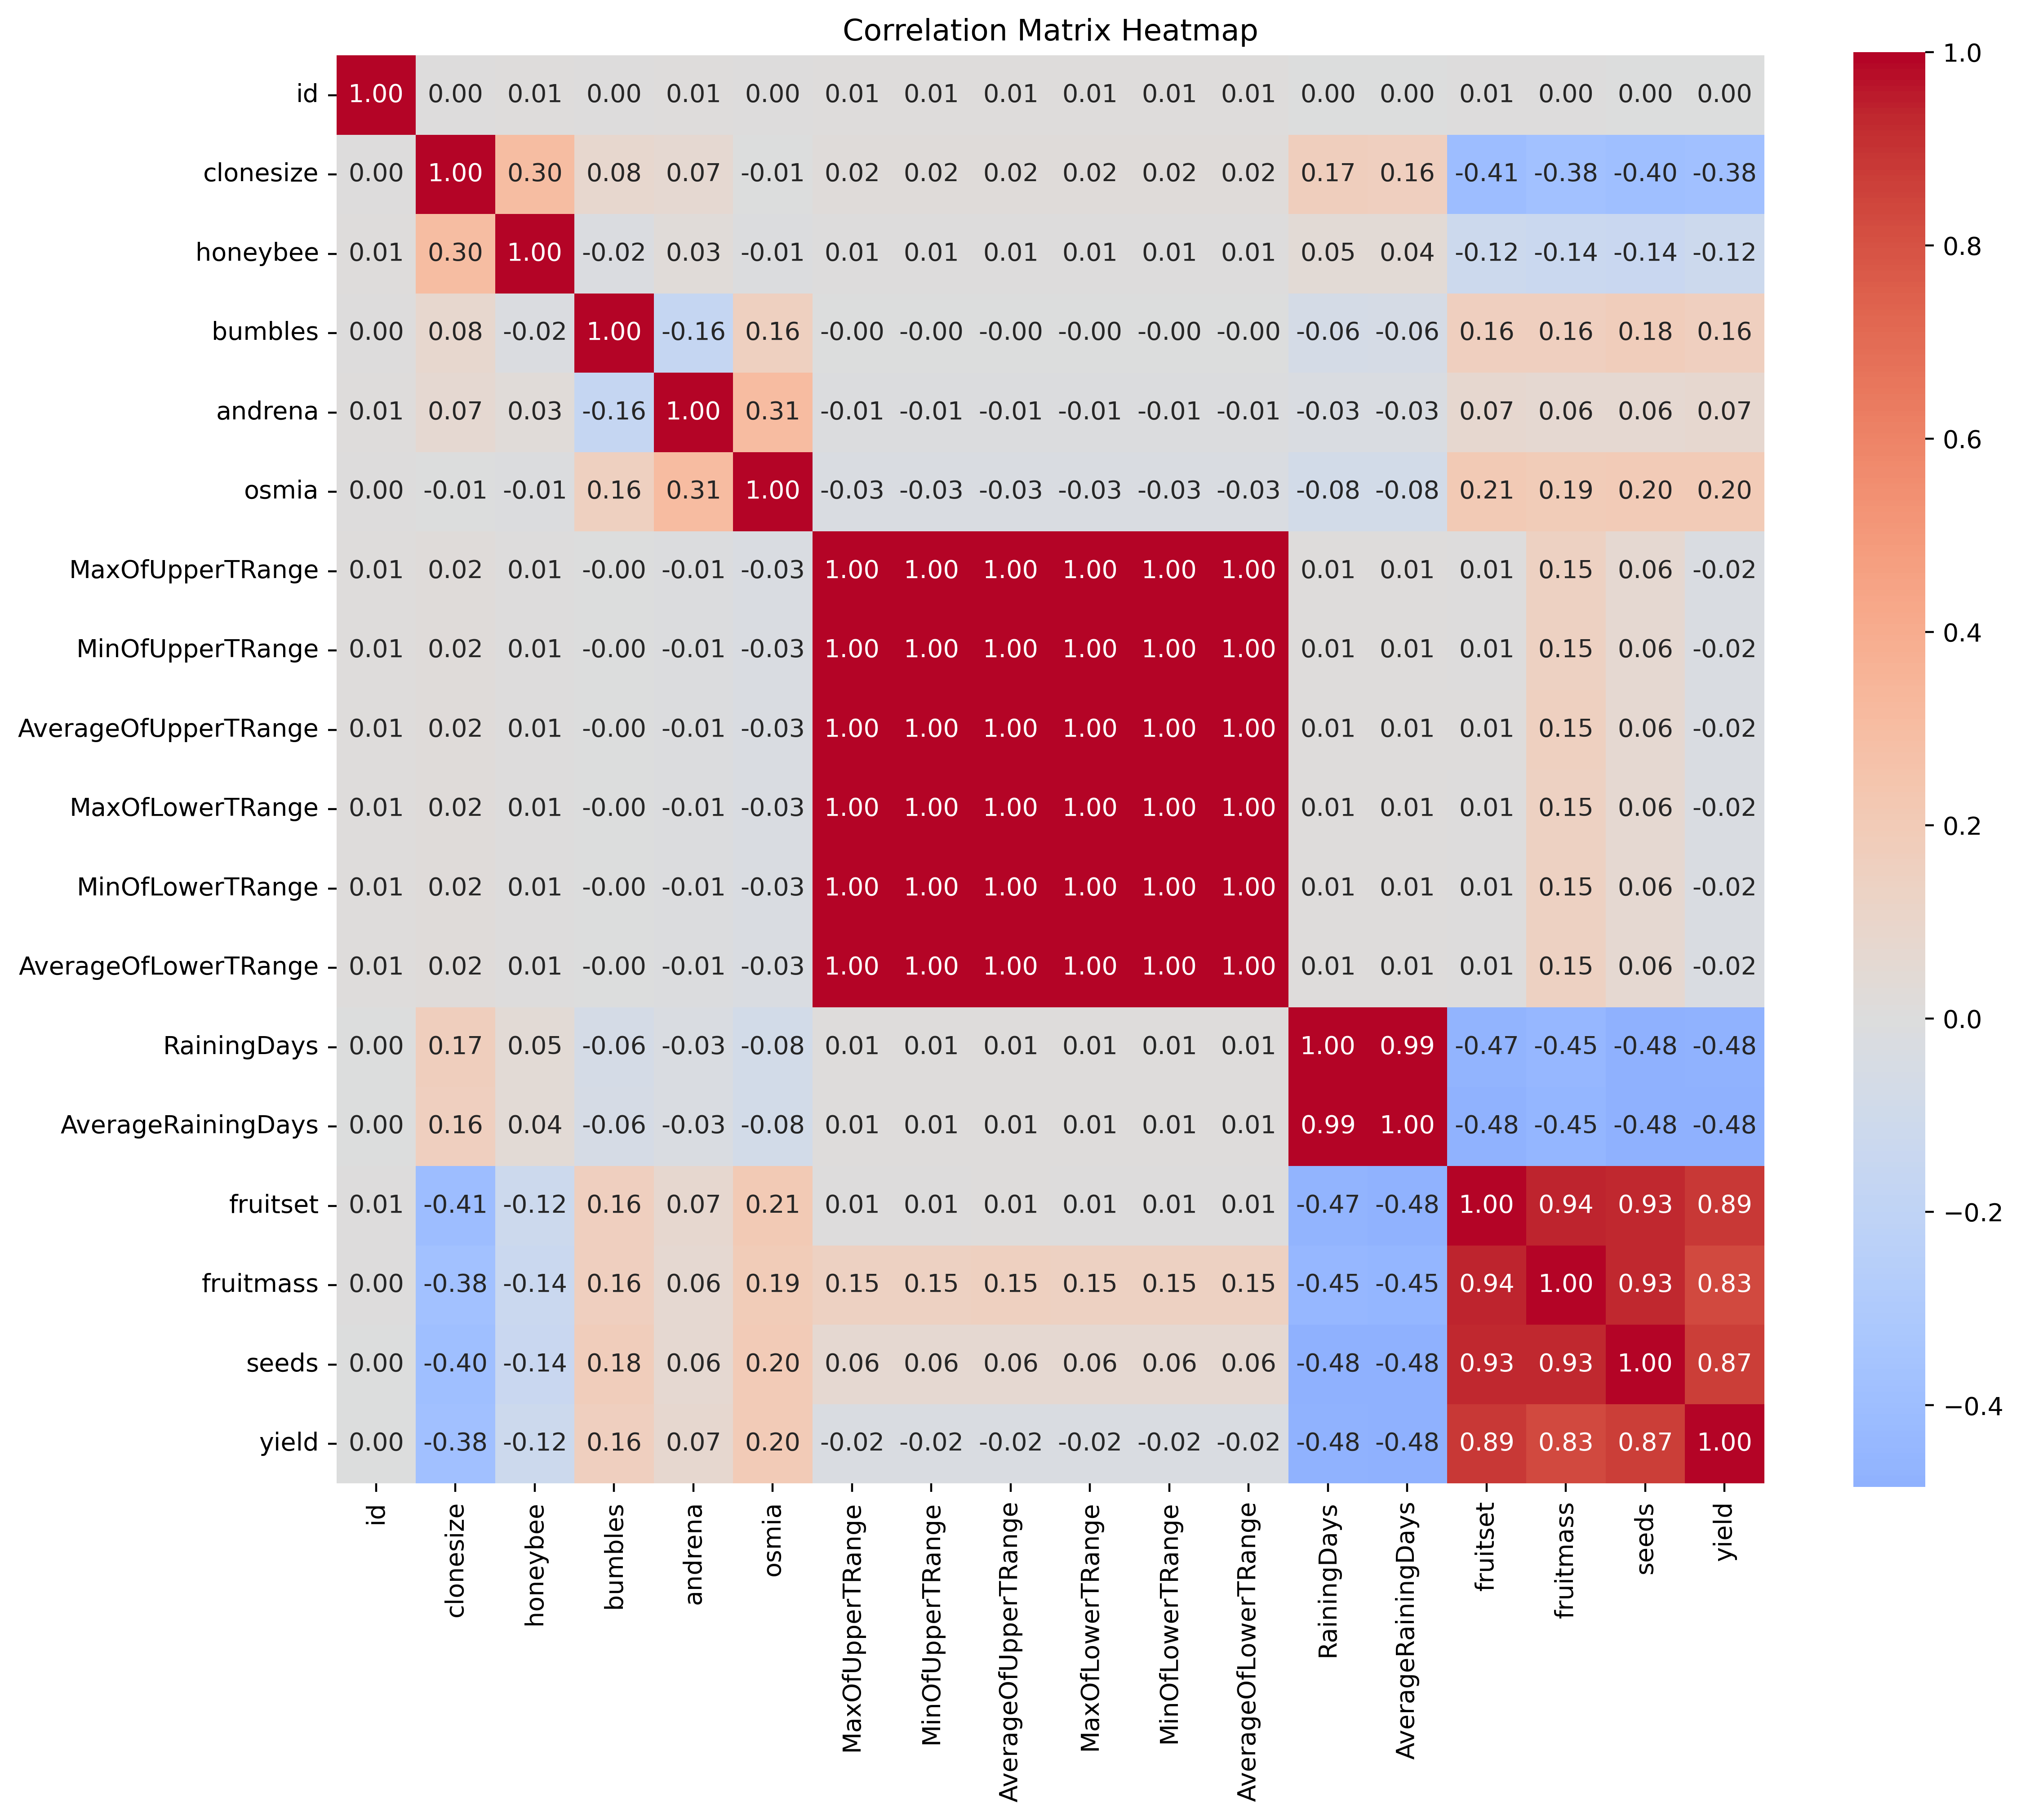

In [9]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10), dpi=400)


sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)


plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [10]:
print("Strongest correlations with RainingDays:")
rainingdays_corr = corr_matrix['RainingDays'].sort_values(ascending=False)
print(rainingdays_corr)

Strongest correlations with RainingDays:
RainingDays             1.000000
AverageRainingDays      0.990864
clonesize               0.165770
honeybee                0.046494
MinOfUpperTRange        0.011727
MinOfLowerTRange        0.011466
AverageOfLowerTRange    0.011334
MaxOfUpperTRange        0.011322
MaxOfLowerTRange        0.011302
AverageOfUpperTRange    0.011245
id                      0.002340
andrena                -0.026572
bumbles                -0.063294
osmia                  -0.079874
fruitmass              -0.447033
fruitset               -0.468066
yield                  -0.477191
seeds                  -0.478818
Name: RainingDays, dtype: float64


# Feature engineering

## Config for feature engineering

In [11]:
from typing import Dict, Any, List, Tuple

In [13]:
class DataFrameProcessor:

    def __init__(self, df: pd.DataFrame, config: Dict[str, Any] = None):
        """
        Initialize the FeatureProcessor with a pandas DataFrame and processing config
        
        Args:
            df (pd.DataFrame): Input DataFrame to process
            config (Dict): Configuration dictionary with processing stages and their parameters
                Format:
                {
                    "stages": [
                        {
                            "name": "remove_features",
                            "params": {
                                "features_to_remove": ["RainingDays"]
                            }
                        },
                        {
                            "name": "another_stage",
                            "params": {
                                "param1": value1,
                                "param2": value2
                            }
                        }
                    ]
                }
        """
        self.df = df.copy()
        self.config = config or {
            "stages": [
                {
                    "name": "remove_features",
                    "params": {
                        "features_to_remove": ["RainingDays"]
                    }
                }
            ]
        }
        self._removed_features = []
        self._processing_history = []

    def generate_features(self, features_to_generate: List[Dict]) -> 'DataFrameProcessor':
        """
        Generate new features based on existing ones
        
        Args:
            features_to_generate (List[Dict]): List of feature generation configs
                Each dict should contain:
                - name: name of the new feature
                - source_features: list of features to use
                - operation: type of operation ('sum', 'diff', 'product', 'ratio', 'mean', 'power')
        
        Returns:
            DataFrameProcessor: self for method chaining
        """
        for feature_config in features_to_generate:
            name = feature_config["name"]
            sources = feature_config["source_features"]
            operation = feature_config["operation"]

            if not all(feat in self.df.columns for feat in sources):
                missing = [f for f in sources if f not in self.df.columns]
                raise ValueError(f"Source features not found: {missing}")

            if operation == 'sum':
                self.df[name] = self.df[sources].sum(axis=1)
            elif operation == 'diff':
                if len(sources) != 2:
                    raise ValueError("Difference operation requires exactly 2 source features")
                self.df[name] = self.df[sources[0]] - self.df[sources[1]]
            elif operation == 'product':
                self.df[name] = self.df[sources].prod(axis=1)
            elif operation == 'ratio':
                if len(sources) != 2:
                    raise ValueError("Ratio operation requires exactly 2 source features")
                self.df[name] = self.df[sources[0]] / self.df[sources[1]]
            elif operation == 'mean':
                self.df[name] = self.df[sources].mean(axis=1)
            elif operation == 'power':
                if len(sources) != 1:
                    raise ValueError("Power operation requires exactly 1 source feature")
                if 'power' not in feature_config:
                    raise ValueError("Power operation requires 'power' parameter")
                power = feature_config['power']
                self.df[name] = self.df[sources[0]] ** power
            else:
                raise ValueError(f"Unknown operation: {operation}")
            
        return self

    def remove_features(self, features_to_remove: List[str]) -> 'DataFrameProcessor':
        """Remove specified features from the DataFrame"""
        for feature in features_to_remove:
            if feature in self.df.columns:
                self.df.drop(columns=[feature], inplace=True)
                self._removed_features.append(feature)
                print(f"Removed feature: {feature}")
            else:
                print(f"Warning: Feature {feature} not found in dataset")
        return self
    
    def split_data(self, target: str, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        """
        Split the processed data into training and testing sets
        
        Args:
            target (str): Name of the target variable
            test_size (float): Proportion of the dataset to include in the test split
            random_state (int): Random state for reproducibility
        
        Returns:
            Tuple containing:
            - X_train (pd.DataFrame): Training features
            - X_test (pd.DataFrame): Testing features
            - y_train (pd.Series): Training target
            - y_test (pd.Series): Testing target
        """
        from sklearn.model_selection import train_test_split

        if target not in self.df.columns:
            raise ValueError(f"Target variable '{target}' not found in dataset")
        
        X_train, X_test, y_train, y_test = train_test_split(
            self.df.drop(columns=[target]),
            self.df[target],
            test_size=test_size,
            random_state=random_state
        )

        print(f"Data split into training and testing sets: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples")

        self.processing_history.append({
            "stage": "split_data",
            "params": {"target": target, "test_size": test_size, "random_state": random_state},
            "status": "success"
        })

        return X_train, X_test, y_train, y_test
    
    def process(self) -> pd.DataFrame:
        """
        Execute all processing stages defined in the config

        Returns:
            pd.DataFrame: Processed DataFrame
        """
        for stage in self.config["stages"]:
            stage_name = stage["name"]
            stage_params = stage["params"]

            if hasattr(self, stage_name):
                method = getattr(self, stage_name)
                try:
                    method(**stage_params)
                    self._processing_history.append({
                        "stage": stage_name,
                        "params": stage_params,
                        "status": "success"
                    })
                except Exception as e:
                    print(f"Error in stage {stage_name}: {str(e)}")
                    self._processing_history.append({
                        "stage": stage_name,
                        "params": stage_params,
                        "status": "failed",
                        "error": str(e)
                    })
            else:
                print(f"Warning: Stage {stage_name} not implemented")

        return self.df
    
    @property
    def processing_history(self) -> List[Dict]:
        """return the history of processing stages"""
        return self._processing_history
    
    @property
    def removed_features(self) -> List[str]:
        """Return list of removed features"""
        return self._removed_features

In [14]:
# Update the config to include target specification
config = {
    "stages": [
        {
            "name": "remove_features",
            "params": {
                "features_to_remove": ["id", "RainingDays"]
            }
        },
        {
            "name": "generate_features",
            "params": {
                "features_to_generate": [
                    {
                        "name": "temp_range",
                        "source_features": ["MaxOfUpperTRange", "MinOfLowerTRange"],
                        "operation": "diff"
                    },
                    {
                        "name": "avg_temp",
                        "source_features": ["MaxOfUpperTRange", "MinOfLowerTRange"],
                        "operation": "mean"
                    },
                    {
                        "name": "fruit_efficiency",
                        "source_features": ["fruitmass", "clonesize"],
                        "operation": "ratio"
                    },
                    {
                        "name": "clonesize_squared",
                        "source_features": ["clonesize"],
                        "operation": "power",
                        "power": 2
                    },
                ]
            }
        }
    ],
    "target": "yield",
    "test_size": 0.2,
    "random_state": 42
}

In [15]:
processor = DataFrameProcessor(data, config)
processed_df = processor.process()

# Split the data
X_train, X_test, y_train, y_test = processor.split_data(
    target=config["target"],
    test_size=config["test_size"],
    random_state=config["random_state"]
)

# Print information about the split
print("\nData split information:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"\nFeature columns: {list(X_train.columns)}")
print(f"\nSample of training data:")
print(X_train.head())
print(f"\nSample of training targets:")
print(y_train.head())

Removed feature: id
Removed feature: RainingDays
Data split into training and testing sets: 12231 training samples and 3058 testing samples

Data split information:
Training set shape: (12231, 19)
Testing set shape: (3058, 19)

Feature columns: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'temp_range', 'avg_temp', 'fruit_efficiency', 'clonesize_squared']

Sample of training data:
       clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
245         25.0      0.50     0.38     0.50   0.63              69.7   
3017        12.5      0.25     0.25     0.38   0.25              94.6   
8047        12.5      0.25     0.38     0.50   0.50              77.4   
14223       12.5      0.25     0.38     0.50   0.75              94.6   
13397       25.0      0.50     0.25     0.63   0.75     

# Baseline: Gradient Boosting

In [16]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [17]:
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [18]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [19]:
model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    num_boost_round=1000,
    valid_sets=[train_data, valid_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 526.455	valid_1's rmse: 554.113
Early stopping, best iteration is:
[88]	training's rmse: 530.629	valid_1's rmse: 553.881


In [20]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")


Model Performance:
Train RMSE: 530.63
Test RMSE: 553.88
Train R2: 0.8431
Test R2: 0.8255


In [21]:
importance = model.feature_importance(importance_type='gain')
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

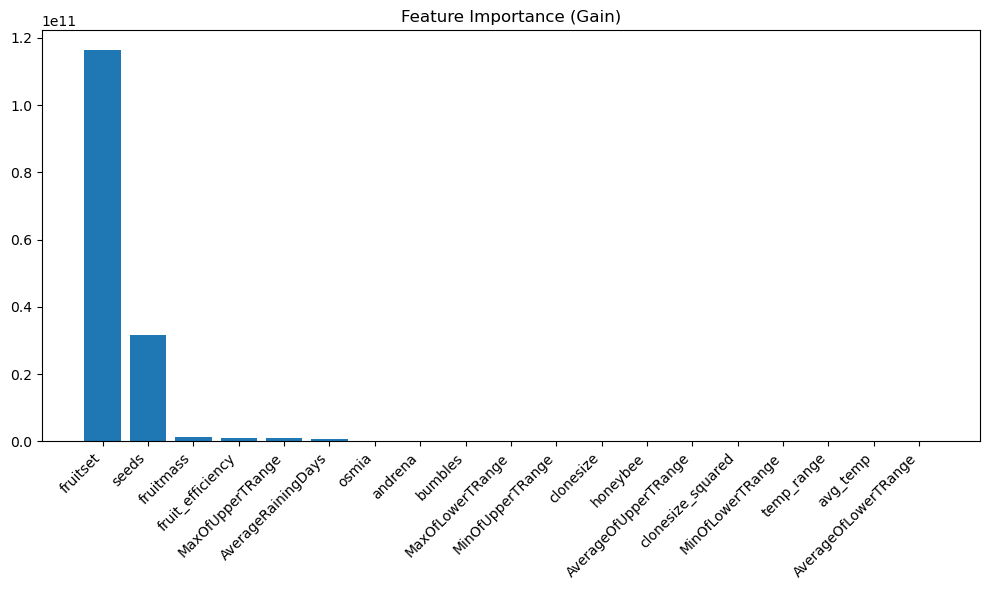

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), feature_importance['importance'])
plt.xticks(range(len(importance)), feature_importance['feature'], rotation=45, ha='right')
plt.title('Feature Importance (Gain)')
plt.tight_layout()
plt.show()

In [23]:
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
               feature    importance
12            fruitset  1.164392e+11
14               seeds  3.163108e+10
13           fruitmass  1.314635e+09
17    fruit_efficiency  9.502343e+08
5     MaxOfUpperTRange  9.211159e+08
11  AverageRainingDays  7.714371e+08
4                osmia  2.398543e+08
3              andrena  1.653952e+08
2              bumbles  1.472191e+08
8     MaxOfLowerTRange  1.268201e+08


In [24]:
model.save_model('best_lgb_model.txt')

# Make a prediction on private dataset

In [25]:
test_data = pd.read_csv("../data/test.csv")

test_data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  15289       25.0      0.25     0.25     0.25   0.25              86.0   
1  15290       12.5      0.25     0.25     0.75   0.63              94.6   
2  15291       12.5      0.25     0.25     0.63   0.63              86.0   
3  15292       25.0      0.50     0.38     0.38   0.63              86.0   
4  15293       37.5      0.75     0.25     0.25   0.25              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              57.2                  79.0              68.2              33.0   
2              52.0                  71.9              62.0              30.0   
3              52.0                  71.9              62.0              30.0   
4              57.2                  79.0              68.2              33.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  50.8         24.0                0.39  0.399367   0.408088   
1                  55.9          1.0                0.10  0.488048   0.442866   
2                  50.8         16.0                0.26  0.583379   0.487057   
3                  50.8         16.0                0.26  0.433014   0.422847   
4                  55.9         24.0                0.39  0.360996   0.388860   

       seeds  
0  31.394569  
1  36.846956  
2  40.037644  
3  33.116091  
4  29.558019

In [27]:
test_processor = DataFrameProcessor(test_data, config)
processed_test = test_processor.process()

test_config = config.copy()
if "target" in test_config:
    del test_config["target"]


Removed feature: id
Removed feature: RainingDays


In [35]:
test_predictions = model.predict(processed_test)
submission = pd.DataFrame({
    'id': test_data['id'],
    'yield': test_predictions
})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("\nSample of predictions:")
print(submission.head())

print("\nSubmission file info:")
print(f"Number of predictions: {len(submission)}")
print(f"Value range: {submission['yield'].min():.2f} to {submission['yield'].max():.2f}")
print(f"Mean prediction: {submission['yield'].mean():.2f}")
print(f"Submission file saved as 'submission.csv'")


Sample of predictions:
      id        yield
0  15289  4326.889786
1  15290  6104.012983
2  15291  7172.096700
3  15292  4735.634334
4  15293  3654.641795

Submission file info:
Number of predictions: 10194
Value range: 2598.98 to 8537.07
Mean prediction: 6009.89
Submission file saved as 'submission.csv'


## Prediction distribution

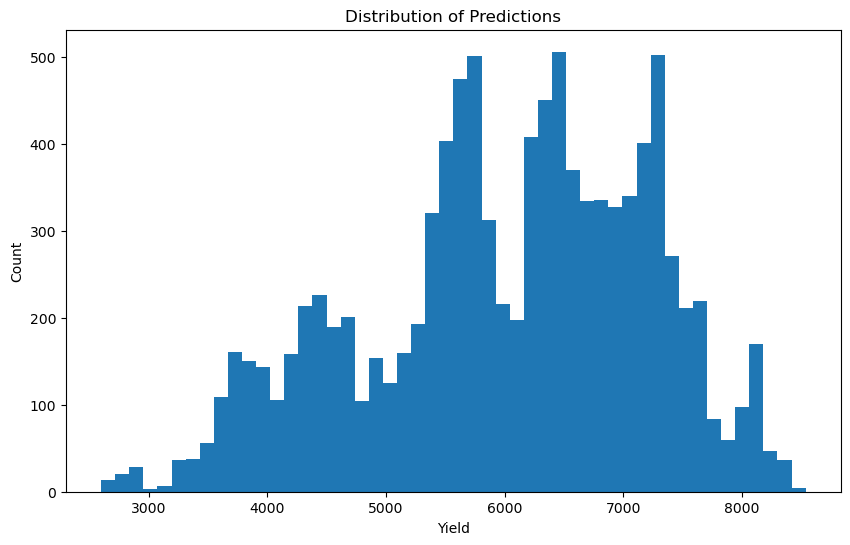

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(submission['yield'], bins=50)
plt.title('Distribution of Predictions')
plt.xlabel('Yield')
plt.ylabel('Count')
plt.show()